### DEPENDENCY

In [5]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from collections import Counter

## 1. Convert JSON to CSV for games.json => steam 1

In [6]:
json_path = "data/games.json"

In [7]:
df = pd.read_json(json_path)
df = df.T
df.head()

,name,release_date,required_age,price,dlc_count,detailed_description,about_the_game,short_description,reviews,header_image,...,positive,negative,estimated_owners,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,peak_ccu,tags,discount
20200,Galactic Bowling,"Oct 21, 2008",0,19.99,0,Galactic Bowling is an exaggerated and stylize...,Galactic Bowling is an exaggerated and stylize...,Galactic Bowling is an exaggerated and stylize...,,https://cdn.akamai.steamstatic.com/steam/apps/...,...,6,11,0 - 20000,0,0,0,0,0,"{'Indie': 22, 'Casual': 21, 'Sports': 21, 'Bow...",NaN
655370,Train Bandit,"Oct 12, 2017",0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,THE LAW!! Looks to be a showdown atop a train....,THE LAW!! Looks to be a showdown atop a train....,,https://cdn.akamai.steamstatic.com/steam/apps/...,...,53,5,0 - 20000,0,0,0,0,0,"{'Indie': 109, 'Action': 103, 'Pixel Graphics'...",NaN
1732930,Jolt Project,"Nov 17, 2021",0,4.99,0,Jolt Project: The army now has a new robotics ...,Jolt Project: The army now has a new robotics ...,"Shoot vehicles, blow enemies with a special at...",,https://cdn.akamai.steamstatic.com/steam/apps/...,...,0,0,0 - 20000,0,0,0,0,0,[],NaN
1355720,Henosis™,"Jul 23, 2020",0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,HENOSIS™ is a mysterious 2D Platform Puzzler w...,HENOSIS™ is a mysterious 2D Platform Puzzler w...,,https://cdn.akamai.steamstatic.com/steam/apps/...,...,3,0,0 - 20000,0,0,0,0,0,"{'2D Platformer': 161, 'Atmospheric': 154, 'Su...",NaN
1139950,Two Weeks in Painland,"Feb 3, 2020",0,0.0,0,ABOUT THE GAME Play as a hacker who has arrang...,ABOUT THE GAME Play as a hacker who has arrang...,Two Weeks in Painland is a story-driven game a...,,https://cdn.akamai.steamstatic.com/steam/apps/...,...,50,8,0 - 20000,0,0,0,0,0,"{'Indie': 42, 'Adventure': 41, 'Nudity': 22, '...",NaN


app_id read as index, let's fix the column name

In [8]:
column_name_dict = {
"name": "Name",
"release_date": "Release date",
"required_age": "Required age",
"price": "Price",
"dlc_count": "DLC count",
"detailed_description": "Detailed description",
"about_the_game": "About the game",
"short_description": "Short description",
"reviews": "Reviews",
"header_image": "Header image",
"website": "Website",
"support_url": "Support url",
"support_email": "Support email",
"windows": "Windows",
"mac": "Mac",
"linux": "Linux",
"metacritic_score": "Metacritic score",
"metacritic_url": "Metacritic url",
"achievements": "Achievements",
"recommendations": "Recommendations",
"notes": "Notes",
"supported_languages": "Supported languages",
"full_audio_languages": "Full audio languages",
"packages": "Packages",
"developers": "Developers",
"publishers": "Publishers",
"categories": "Categories",
"genres": "Genres",
"screenshots": "Screenshots",
"movies": "Movies",
"user_score": "User score",
"score_rank": "Score rank",
"positive": "Positive",
"negative": "Negative",
"estimated_owners": "Estimated owners",
"average_playtime_forever": "Average playtime forever",
"average_playtime_2weeks": "Average playtime two weeks",
"median_playtime_forever": "Median playtime forever",
"median_playtime_2weeks": "Median playtime two weeks",
"peak_ccu": "Peak CCU",
"tags": "Tags"
}

In [9]:
def convert_dict_to_string(dict_object):
    if len(dict_object) == 0:
        return np.NaN
    key_list = list(dict_object.keys())
    keys_string = ",".join(key_list)
    return keys_string

def read_convert_json_dataset():
    _df = pd.read_json(json_path)
    _df = _df.T
    _df['app_id'] = _df.index
    _df.rename(columns=column_name_dict, inplace=True)

    for col in _df.columns.values:
        if isinstance(_df.loc[546560][col], dict):
            _df[col] = _df[col].apply(lambda entries: convert_dict_to_string(entries))
        if isinstance(_df.loc[546560][col], list):
            if isinstance(_df.loc[546560][col][0], str):
                _df[col] = _df[col].apply(lambda entries: ",".join(entries))
    _df = _df.reset_index().set_index("app_id")
    return _df

df = read_convert_json_dataset()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111452 entries, 20200 to 3183790
Data columns (total 43 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   index                       111452 non-null  int64 
 1   Name                        111452 non-null  object
 2   Release date                111452 non-null  object
 3   Required age                111452 non-null  object
 4   Price                       111452 non-null  object
 5   DLC count                   111452 non-null  object
 6   Detailed description        111452 non-null  object
 7   About the game              111452 non-null  object
 8   Short description           111452 non-null  object
 9   Reviews                     111452 non-null  object
 10  Header image                111452 non-null  object
 11  Website                     111452 non-null  object
 12  Support url                 111452 non-null  object
 13  Support email               1

In [11]:
df.head()

,index,Name,Release date,Required age,Price,DLC count,Detailed description,About the game,Short description,Reviews,...,Positive,Negative,Estimated owners,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Peak CCU,Tags,discount
app_id,,,,,,,,,,,,,,,,,,,,,
20200,20200,Galactic Bowling,"Oct 21, 2008",0,19.99,0,Galactic Bowling is an exaggerated and stylize...,Galactic Bowling is an exaggerated and stylize...,Galactic Bowling is an exaggerated and stylize...,,...,6,11,0 - 20000,0,0,0,0,0,"Indie,Casual,Sports,Bowling",NaN
655370,655370,Train Bandit,"Oct 12, 2017",0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,THE LAW!! Looks to be a showdown atop a train....,THE LAW!! Looks to be a showdown atop a train....,,...,53,5,0 - 20000,0,0,0,0,0,"Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",NaN
1732930,1732930,Jolt Project,"Nov 17, 2021",0,4.99,0,Jolt Project: The army now has a new robotics ...,Jolt Project: The army now has a new robotics ...,"Shoot vehicles, blow enemies with a special at...",,...,0,0,0 - 20000,0,0,0,0,0,NaN,NaN
1355720,1355720,Henosis™,"Jul 23, 2020",0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,HENOSIS™ is a mysterious 2D Platform Puzzler w...,HENOSIS™ is a mysterious 2D Platform Puzzler w...,,...,3,0,0 - 20000,0,0,0,0,0,"2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",NaN
1139950,1139950,Two Weeks in Painland,"Feb 3, 2020",0,0.0,0,ABOUT THE GAME Play as a hacker who has arrang...,ABOUT THE GAME Play as a hacker who has arrang...,Two Weeks in Painland is a story-driven game a...,,...,50,8,0 - 20000,0,0,0,0,0,"Indie,Adventure,Nudity,Violent,Sexual Content,...",NaN


In [12]:
df.drop(columns=['index'], inplace=True)

In [13]:
df.to_csv("data/converted_big.csv") # Saving the converted dataframe
converted = pd.read_csv("data/converted_big.csv") # Reading it back
converted.head()

,app_id,Name,Release date,Required age,Price,DLC count,Detailed description,About the game,Short description,Reviews,...,Positive,Negative,Estimated owners,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Peak CCU,Tags,discount
0,20200,Galactic Bowling,"Oct 21, 2008",0,19.99,0,Galactic Bowling is an exaggerated and stylize...,Galactic Bowling is an exaggerated and stylize...,Galactic Bowling is an exaggerated and stylize...,NaN,...,6,11,0 - 20000,0,0,0,0,0,"Indie,Casual,Sports,Bowling",NaN
1,655370,Train Bandit,"Oct 12, 2017",0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,THE LAW!! Looks to be a showdown atop a train....,THE LAW!! Looks to be a showdown atop a train....,NaN,...,53,5,0 - 20000,0,0,0,0,0,"Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",NaN
2,1732930,Jolt Project,"Nov 17, 2021",0,4.99,0,Jolt Project: The army now has a new robotics ...,Jolt Project: The army now has a new robotics ...,"Shoot vehicles, blow enemies with a special at...",NaN,...,0,0,0 - 20000,0,0,0,0,0,NaN,NaN
3,1355720,Henosis™,"Jul 23, 2020",0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,HENOSIS™ is a mysterious 2D Platform Puzzler w...,HENOSIS™ is a mysterious 2D Platform Puzzler w...,NaN,...,3,0,0 - 20000,0,0,0,0,0,"2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",NaN
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,ABOUT THE GAME Play as a hacker who has arrang...,Two Weeks in Painland is a story-driven game a...,NaN,...,50,8,0 - 20000,0,0,0,0,0,"Indie,Adventure,Nudity,Violent,Sexual Content,...",NaN


## 2a. EDA Steam1

### READ DATA

In [14]:
# read converted big
df = pd.read_csv("data/converted_big.csv")
df.head(2)

,app_id,Name,Release date,Required age,Price,DLC count,Detailed description,About the game,Short description,Reviews,...,Positive,Negative,Estimated owners,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Peak CCU,Tags,discount
0,20200,Galactic Bowling,"Oct 21, 2008",0,19.99,0,Galactic Bowling is an exaggerated and stylize...,Galactic Bowling is an exaggerated and stylize...,Galactic Bowling is an exaggerated and stylize...,NaN,...,6,11,0 - 20000,0,0,0,0,0,"Indie,Casual,Sports,Bowling",NaN
1,655370,Train Bandit,"Oct 12, 2017",0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,THE LAW!! Looks to be a showdown atop a train....,THE LAW!! Looks to be a showdown atop a train....,NaN,...,53,5,0 - 20000,0,0,0,0,0,"Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",NaN


### BASIC INFO

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111452 entries, 0 to 111451
Data columns (total 43 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   app_id                      111452 non-null  int64  
 1   Name                        111446 non-null  object 
 2   Release date                111452 non-null  object 
 3   Required age                111452 non-null  int64  
 4   Price                       111452 non-null  float64
 5   DLC count                   111452 non-null  int64  
 6   Detailed description        104995 non-null  object 
 7   About the game              104969 non-null  object 
 8   Short description           105076 non-null  object 
 9   Reviews                     10624 non-null   object 
 10  Header image                111452 non-null  object 
 11  Website                     46458 non-null   object 
 12  Support url                 50759 non-null   object 
 13  Support email 

In [16]:
df.columns

Index(['app_id', 'Name', 'Release date', 'Required age', 'Price', 'DLC count',
       'Detailed description', 'About the game', 'Short description',
       'Reviews', 'Header image', 'Website', 'Support url', 'Support email',
       'Windows', 'Mac', 'Linux', 'Metacritic score', 'Metacritic url',
       'Achievements', 'Recommendations', 'Notes', 'Supported languages',
       'Full audio languages', 'Packages', 'Developers', 'Publishers',
       'Categories', 'Genres', 'Screenshots', 'Movies', 'User score',
       'Score rank', 'Positive', 'Negative', 'Estimated owners',
       'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Peak CCU',
       'Tags', 'discount'],
      dtype='object')

In [17]:
df.shape

(111452, 43)

### MISSING VALUE IDENTIFICATION

In [18]:
# Get missing value amount and percentage for each column and sort Descending
missing_values = df.isna().sum()
missing_values = missing_values[missing_values > 0]
missing_values = pd.DataFrame(missing_values)
missing_values.columns = ['Missing Values']
missing_values['Percentage'] = (missing_values['Missing Values'] / df.shape[0]) * 100
missing_values = missing_values.sort_values(by='Missing Values', ascending=False)
missing_values

,Missing Values,Percentage
Score rank,111408,99.960521
Metacritic url,107447,96.406525
Reviews,100828,90.467645
discount,97410,87.400854
Notes,93003,83.446686
Full audio languages,65823,59.059505
Website,64994,58.315687
Support url,60693,54.456627
Tags,37423,33.577684
Support email,19025,17.070129


- Beberapa game di steam ada yang dibuat untuk testing jadi bisa aja gapunya score rank
- No metacritic url bisa jadi karena emang ga diprovide linknya, tapi metacritic scorenya ada semua kok dan ini yang lebih penting
- No review bisa jadi karena gamenya untuk testing atau datanya rusak ketika diambil dari source
- discount: game dijual tanpa diskon, make sense aja apalagi kalo gamenya juga yang gratisan, ini diliar dlu lagi aja, drop belakangan soalnya bisa dipake buat cari insight diskon-price-estimated owners
- Notes: gaada notes tambahan terkait gamenya, normal aja
- Full audio langauges: game tanpa dialog, normal aja
- Website: gamenya dirilis lgsg ke steam tanpa link webnya, normal aja
- Support url: gaada url utk help/customer support dari gamenya
- Tags: tag dikasih sama user ke game, kalo gamenya baru rilis atau sepi/gaada pemain ya gaada tagnya
- Movies: game dirilis tanpa ada film, bisa aja berguna karena kadang ada yang download/tau game dari filmnya gitu
- Support email: yaudah gaada, jarang pengaruh jg rasanya
- Kategori: game tanpa kategori, ini bikin susah sih mungkin akan didrop row yg kategorinya kosong
- Publishers: ini dapat berpengaruh
- About the game: gaada deskripsi, gpp sih
- Developers: ini juga bisa pengaruh ke gamenya
- Detail desc: ya gt
- Genres: penting sih, bakalan di drop row yang null genrenya
- Supported languages: bisa berpengaruh
- Short desc: ya gt
- Screenshots: berupa link url ss nya
- Name: game tanpa nama, gamungkin gasi?

In [19]:
# Explore some columns
df['Website']

0              http://www.galacticbowling.net
1                      http://trainbandit.com
2                                         NaN
3                    https://henosisgame.com/
4         https://www.unusual-games.com/home/
                         ...                 
111447                                    NaN
111448         https://www.hentaipanda.games/
111449                                    NaN
111450                   https://accubow.com/
111451               https://www.ledxfun.com/
Name: Website, Length: 111452, dtype: object

In [20]:
df['Header image']

0         https://cdn.akamai.steamstatic.com/steam/apps/...
1         https://cdn.akamai.steamstatic.com/steam/apps/...
2         https://cdn.akamai.steamstatic.com/steam/apps/...
3         https://cdn.akamai.steamstatic.com/steam/apps/...
4         https://cdn.akamai.steamstatic.com/steam/apps/...
                                ...                        
111447    https://shared.akamai.steamstatic.com/store_it...
111448    https://shared.akamai.steamstatic.com/store_it...
111449    https://shared.akamai.steamstatic.com/store_it...
111450    https://shared.akamai.steamstatic.com/store_it...
111451    https://shared.akamai.steamstatic.com/store_it...
Name: Header image, Length: 111452, dtype: object

In [21]:
# Drop column that is an image or url
df.drop(columns=['Header image', 'Website', 'Support url', 'Support email', 'Metacritic url'], inplace=True)

In [22]:
df.columns

Index(['app_id', 'Name', 'Release date', 'Required age', 'Price', 'DLC count',
       'Detailed description', 'About the game', 'Short description',
       'Reviews', 'Windows', 'Mac', 'Linux', 'Metacritic score',
       'Achievements', 'Recommendations', 'Notes', 'Supported languages',
       'Full audio languages', 'Packages', 'Developers', 'Publishers',
       'Categories', 'Genres', 'Screenshots', 'Movies', 'User score',
       'Score rank', 'Positive', 'Negative', 'Estimated owners',
       'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Peak CCU',
       'Tags', 'discount'],
      dtype='object')

I think its enough since we have other dataset that needs exploration

In [23]:
# put new dataframe into steam1 variable
steam1 = df.copy()

## 2b. EDA Steam 2

In [24]:
steam2 = pd.read_csv('data/games_small.csv')
steam2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50872 non-null  int64  
 1   title           50872 non-null  object 
 2   date_release    50872 non-null  object 
 3   win             50872 non-null  bool   
 4   mac             50872 non-null  bool   
 5   linux           50872 non-null  bool   
 6   rating          50872 non-null  object 
 7   positive_ratio  50872 non-null  int64  
 8   user_reviews    50872 non-null  int64  
 9   price_final     50872 non-null  float64
 10  price_original  50872 non-null  float64
 11  discount        50872 non-null  float64
 12  steam_deck      50872 non-null  bool   
dtypes: bool(4), float64(3), int64(3), object(3)
memory usage: 3.7+ MB


Here we found other columns: rating, positive_ratio, user_reviews, price_original, price_final. Lets explore this new features

In [25]:
steam2.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True


app_id, title, date_release, win, mac, linux, and discount is similar as before, so we can drop these columns for further analysis

### Check whether the same app_id between steam1 and steam2 refer to the same game

In [26]:
steam1[steam1['app_id'] == 13500]

,app_id,Name,Release date,Required age,Price,DLC count,Detailed description,About the game,Short description,Reviews,...,Positive,Negative,Estimated owners,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Peak CCU,Tags,discount
31285,13500,Prince of Persia: Warrior Within™,"Nov 21, 2008",17,9.99,0,Enter the dark underworld of Prince of Persia ...,Enter the dark underworld of Prince of Persia ...,Enter the dark underworld of Prince of Persia ...,NaN,...,1807,307,200000 - 500000,61,10,77,10,18,"Action,Adventure,Parkour,Third Person,Great So...",NaN


In [27]:
steam2[steam2['app_id'] == 13500]

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True


- We can conclude that steam1 and steam1 are intersecting, we can combine them using the app_id.
- The date_release in steam2 already in proper date format, we will use this column rather than the Release date in steam1
- Its better to use discount from the steam2 since its seems connected to the price_final and price_original
- We will remove Price from steam1 since it is not clear stating the final price or original price

In [28]:
# Drop release date, Price, and discount from steam1
steam1.drop(columns=['Release date', 'Price', 'discount'], inplace=True)
steam1.columns

Index(['app_id', 'Name', 'Required age', 'DLC count', 'Detailed description',
       'About the game', 'Short description', 'Reviews', 'Windows', 'Mac',
       'Linux', 'Metacritic score', 'Achievements', 'Recommendations', 'Notes',
       'Supported languages', 'Full audio languages', 'Packages', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Screenshots', 'Movies',
       'User score', 'Score rank', 'Positive', 'Negative', 'Estimated owners',
       'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Peak CCU',
       'Tags'],
      dtype='object')

In [29]:
# Drop title, win, mac, linux from steam2
steam2.drop(columns=['title', 'win', 'mac', 'linux'], inplace=True)
steam2.columns

Index(['app_id', 'date_release', 'rating', 'positive_ratio', 'user_reviews',
       'price_final', 'price_original', 'discount', 'steam_deck'],
      dtype='object')

## 3. MERGE steam1 and steam2

In [30]:
steam1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111452 entries, 0 to 111451
Data columns (total 35 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   app_id                      111452 non-null  int64  
 1   Name                        111446 non-null  object 
 2   Required age                111452 non-null  int64  
 3   DLC count                   111452 non-null  int64  
 4   Detailed description        104995 non-null  object 
 5   About the game              104969 non-null  object 
 6   Short description           105076 non-null  object 
 7   Reviews                     10624 non-null   object 
 8   Windows                     111452 non-null  bool   
 9   Mac                         111452 non-null  bool   
 10  Linux                       111452 non-null  bool   
 11  Metacritic score            111452 non-null  int64  
 12  Achievements                111452 non-null  int64  
 13  Recommendation

In [31]:
steam2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50872 non-null  int64  
 1   date_release    50872 non-null  object 
 2   rating          50872 non-null  object 
 3   positive_ratio  50872 non-null  int64  
 4   user_reviews    50872 non-null  int64  
 5   price_final     50872 non-null  float64
 6   price_original  50872 non-null  float64
 7   discount        50872 non-null  float64
 8   steam_deck      50872 non-null  bool   
dtypes: bool(1), float64(3), int64(3), object(2)
memory usage: 3.2+ MB


In [32]:
# Merge on app_id
merged_df = pd.merge(steam1, steam2, on='app_id', how='inner')
merged_df

,app_id,Name,Required age,DLC count,Detailed description,About the game,Short description,Reviews,Windows,Mac,...,Peak CCU,Tags,date_release,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,20200,Galactic Bowling,0,0,Galactic Bowling is an exaggerated and stylize...,Galactic Bowling is an exaggerated and stylize...,Galactic Bowling is an exaggerated and stylize...,NaN,True,False,...,0,"Indie,Casual,Sports,Bowling",2008-10-21,Mostly Negative,33,12,19.99,19.99,0.0,True
1,655370,Train Bandit,0,0,THE LAW!! Looks to be a showdown atop a train....,THE LAW!! Looks to be a showdown atop a train....,THE LAW!! Looks to be a showdown atop a train....,NaN,True,True,...,0,"Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",2017-10-12,Very Positive,88,51,0.27,0.99,72.0,True
2,1139950,Two Weeks in Painland,0,0,ABOUT THE GAME Play as a hacker who has arrang...,ABOUT THE GAME Play as a hacker who has arrang...,Two Weeks in Painland is a story-driven game a...,NaN,True,True,...,0,"Indie,Adventure,Nudity,Violent,Sexual Content,...",2020-02-03,Very Positive,86,58,0.00,0.00,0.0,True
3,1469160,Wartune Reborn,0,0,Feel tired of auto-fight? Feel tired of boring...,Feel tired of auto-fight? Feel tired of boring...,'Wartune Reborn' epic magic TBS game was devel...,NaN,True,False,...,68,"Turn-Based Combat,Massively Multiplayer,Multip...",2021-02-26,Mixed,63,168,0.00,0.00,0.0,True
4,1659180,TD Worlds,0,1,"TD Worlds is a dynamic, highly strategical gam...","TD Worlds is a dynamic, highly strategical gam...","TD Worlds is a dynamic, highly strategical gam...",NaN,True,False,...,3,"Tower Defense,Rogue-lite,RTS,Replay Value,Perm...",2022-01-09,Mixed,65,23,10.99,10.99,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41165,1272080,PAYDAY 3,17,0,Step out of retirement back into the life of c...,Step out of retirement back into the life of c...,PAYDAY 3 is the much anticipated sequel to one...,NaN,True,False,...,3532,"Heist,Co-op,Action,Crime,FPS,Multiplayer,Shoot...",2023-09-21,Mostly Negative,38,29458,40.00,0.00,0.0,True
41166,2342950,God Of Weapons,0,0,⚔️CHECK THIS OUT!⚔️ / About the Game The world...,The world was once a bright and beautiful plac...,Embark on a thrilling journey in God of Weapon...,NaN,True,False,...,695,"Action Roguelike,RPG,Inventory Management,Rogu...",2023-09-12,Very Positive,84,1263,6.00,0.00,0.0,True
41167,1692240,Fortune's Run,0,1,"Discover the quiet dystopia of Fortune's Run, ...","Discover the quiet dystopia of Fortune's Run, ...",Explore a decaying industrial world left behin...,NaN,True,False,...,4,"Early Access,Cyberpunk,Immersive Sim,FPS,Steal...",2023-09-27,Very Positive,94,145,18.00,0.00,0.0,True
41168,1580180,Gunbrella,0,2,Gunbrella is a gritty noir-punk action-adventu...,Gunbrella is a gritty noir-punk action-adventu...,"Uncover the dark secrets of a gritty, tangled ...",“Gunbrella’s crunchy combat and excellent move...,True,False,...,19,"Side Scroller,Exploration,Platformer,Action Ro...",2023-09-13,Very Positive,88,248,15.00,0.00,0.0,True


In [33]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41170 entries, 0 to 41169
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   app_id                      41170 non-null  int64  
 1   Name                        41170 non-null  object 
 2   Required age                41170 non-null  int64  
 3   DLC count                   41170 non-null  int64  
 4   Detailed description        41123 non-null  object 
 5   About the game              41113 non-null  object 
 6   Short description           41156 non-null  object 
 7   Reviews                     7920 non-null   object 
 8   Windows                     41170 non-null  bool   
 9   Mac                         41170 non-null  bool   
 10  Linux                       41170 non-null  bool   
 11  Metacritic score            41170 non-null  int64  
 12  Achievements                41170 non-null  int64  
 13  Recommendations             411

In [34]:
# Rename columns so it in same name format
merged_df.rename(columns={
    'app_id': 'App ID',
    'date_release': 'Release date',
    'positive_ratio': 'Positive ratio',
    'price_final': 'Price final',
    'price_original': 'Price original',
    'discount': 'Discount',
    'steam_deck': 'Steam Deck',
}, inplace=True)

In [35]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41170 entries, 0 to 41169
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   App ID                      41170 non-null  int64  
 1   Name                        41170 non-null  object 
 2   Required age                41170 non-null  int64  
 3   DLC count                   41170 non-null  int64  
 4   Detailed description        41123 non-null  object 
 5   About the game              41113 non-null  object 
 6   Short description           41156 non-null  object 
 7   Reviews                     7920 non-null   object 
 8   Windows                     41170 non-null  bool   
 9   Mac                         41170 non-null  bool   
 10  Linux                       41170 non-null  bool   
 11  Metacritic score            41170 non-null  int64  
 12  Achievements                41170 non-null  int64  
 13  Recommendations             411

In [36]:
# show 10 first row of sorted id merged_df
merged_df = merged_df.sort_values(by='App ID', ascending=True)
merged_df.head(10)

,App ID,Name,Required age,DLC count,Detailed description,About the game,Short description,Reviews,Windows,Mac,...,Peak CCU,Tags,Release date,rating,Positive ratio,user_reviews,Price final,Price original,Discount,Steam Deck
22902,10,Counter-Strike,0,0,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,NaN,True,True,...,13230,"Action,FPS,Multiplayer,Shooter,Classic,Team-Ba...",2000-11-01,Overwhelmingly Positive,97,136118,9.99,9.99,0.0,True
11359,20,Team Fortress Classic,0,0,One of the most popular online action games of...,One of the most popular online action games of...,One of the most popular online action games of...,NaN,True,True,...,110,"Action,FPS,Multiplayer,Classic,Hero Shooter,Sh...",1999-04-01,Very Positive,85,5146,4.99,4.99,0.0,True
2120,30,Day of Defeat,0,0,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,NaN,True,True,...,106,"FPS,World War II,Multiplayer,Shooter,Action,Wa...",2003-05-01,Very Positive,87,3489,4.99,4.99,0.0,True
19935,40,Deathmatch Classic,0,0,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,NaN,True,True,...,2,"Action,FPS,Classic,Multiplayer,Shooter,First-P...",2001-06-01,Mostly Positive,79,1757,4.99,4.99,0.0,True
22696,50,Half-Life: Opposing Force,0,0,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...,NaN,True,True,...,120,"FPS,Action,Classic,Sci-fi,Singleplayer,Shooter...",1999-11-01,Overwhelmingly Positive,95,14057,4.99,4.99,0.0,True
20171,60,Ricochet,0,0,A futuristic action game that challenges your ...,A futuristic action game that challenges your ...,A futuristic action game that challenges your ...,NaN,True,True,...,10,"Action,FPS,Multiplayer,Classic,First-Person,Sc...",2000-11-01,Very Positive,80,3395,4.99,4.99,0.0,True
28761,70,Half-Life,0,1,Named Game of the Year by over 50 publications...,Named Game of the Year by over 50 publications...,Named Game of the Year by over 50 publications...,NaN,True,True,...,752,"FPS,Singleplayer,Sci-fi,Multiplayer,1990's,Act...",1998-11-08,Overwhelmingly Positive,96,72475,9.99,9.99,0.0,True
5803,80,Counter-Strike: Condition Zero,0,0,"With its extensive Tour of Duty campaign, a ne...","With its extensive Tour of Duty campaign, a ne...","With its extensive Tour of Duty campaign, a ne...",NaN,True,True,...,425,"Action,FPS,Shooter,Multiplayer,First-Person,Si...",2004-03-01,Very Positive,90,16187,9.99,9.99,0.0,True
29269,130,Half-Life: Blue Shift,0,0,Made by Gearbox Software and originally releas...,Made by Gearbox Software and originally releas...,Made by Gearbox Software and originally releas...,NaN,True,True,...,78,"FPS,Action,Sci-fi,Singleplayer,Shooter,Aliens,...",2001-06-01,Very Positive,91,10522,4.99,4.99,0.0,True
21380,220,Half-Life 2,0,1,1998. HALF-LIFE sends a shock through the game...,1998. HALF-LIFE sends a shock through the game...,1998. HALF-LIFE sends a shock through the game...,NaN,True,True,...,1015,"FPS,Action,Sci-fi,Classic,Singleplayer,Story R...",2007-10-10,Overwhelmingly Positive,97,122230,9.99,9.99,0.0,True


In [37]:
# Save result
merged_df.to_csv("data/merged_steam_data.csv", index=False)

In [38]:
# Read the saved merged dataframe
merged_df = pd.read_csv("data/merged_steam_data.csv")
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41170 entries, 0 to 41169
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   App ID                      41170 non-null  int64  
 1   Name                        41170 non-null  object 
 2   Required age                41170 non-null  int64  
 3   DLC count                   41170 non-null  int64  
 4   Detailed description        41123 non-null  object 
 5   About the game              41113 non-null  object 
 6   Short description           41156 non-null  object 
 7   Reviews                     7920 non-null   object 
 8   Windows                     41170 non-null  bool   
 9   Mac                         41170 non-null  bool   
 10  Linux                       41170 non-null  bool   
 11  Metacritic score            41170 non-null  int64  
 12  Achievements                41170 non-null  int64  
 13  Recommendations             411

## 4. EDA Merged steam data

### DEPENDENCY

In [40]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from collections import Counter

### READ MERGED DATA

In [41]:
df = pd.read_csv("data/merged_steam_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41170 entries, 0 to 41169
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   App ID                      41170 non-null  int64  
 1   Name                        41170 non-null  object 
 2   Required age                41170 non-null  int64  
 3   DLC count                   41170 non-null  int64  
 4   Detailed description        41123 non-null  object 
 5   About the game              41113 non-null  object 
 6   Short description           41156 non-null  object 
 7   Reviews                     7920 non-null   object 
 8   Windows                     41170 non-null  bool   
 9   Mac                         41170 non-null  bool   
 10  Linux                       41170 non-null  bool   
 11  Metacritic score            41170 non-null  int64  
 12  Achievements                41170 non-null  int64  
 13  Recommendations             411

### BASIC INFORMATION

In [42]:
# check if there any duplicate and print it
df.duplicated().sum()

0

### TIME SERIES EDA

In [43]:
# Convert 'Release date' to datetime
df['Release date'] = pd.to_datetime(df['Release date'], errors='coerce')

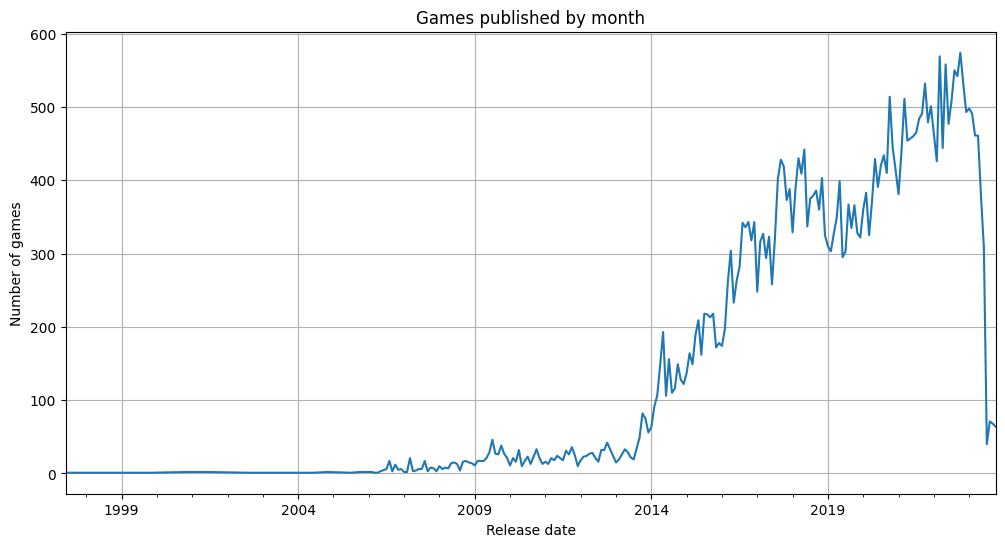

In [44]:
# Number of games published by month
plt.figure(figsize=(12, 6))
df.groupby(df['Release date'].dt.to_period('M')).size().plot(kind='line')
plt.title('Games published by month')
plt.ylabel('Number of games')
plt.grid(True)
plt.show()

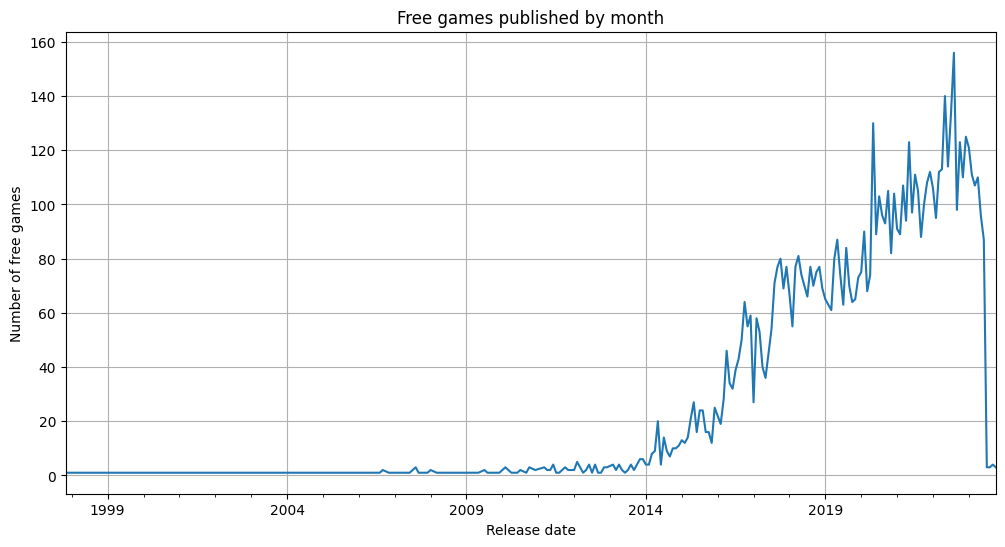

In [45]:
# Number of free games published by month
plt.figure(figsize=(12, 6))
df[df['Price final'] == 0].groupby(df['Release date'].dt.to_period('M')).size().plot(kind='line')
plt.title('Free games published by month')
plt.ylabel('Number of free games')
plt.grid(True)
plt.show()

### Price Final and Price Original EDA

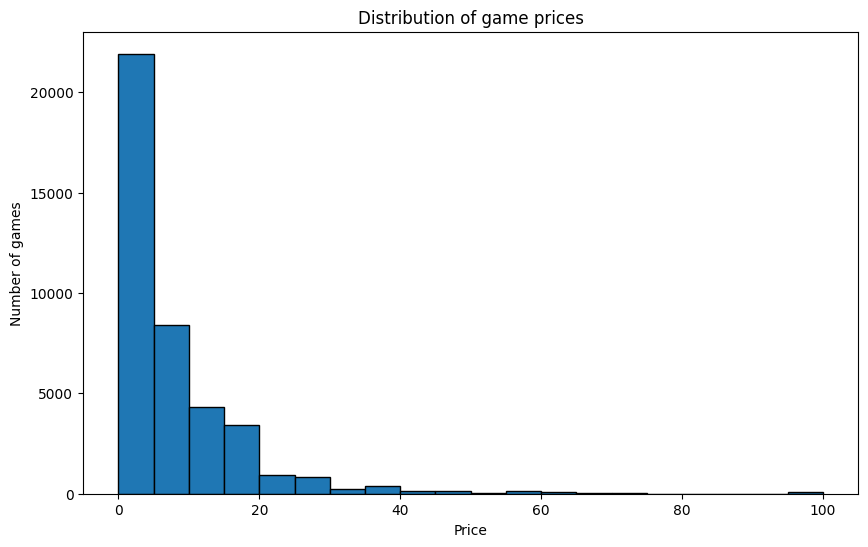

In [46]:
# Prices
bins = range(0, 105, 5)
plt.figure(figsize=(10, 6))
plt.hist(df['Price final'], bins=bins, edgecolor='black')
plt.title('Distribution of game prices')
plt.xlabel('Price')
plt.ylabel('Number of games')
plt.show()

In [47]:
print("Free games: ", df[df['Price final'] == 0].shape[0])
print("Paid games: ", df[df['Price final'] > 0].shape[0])
print("Percentage of free games: ", round(df[df['Price final'] == 0].shape[0] / df.shape[0], 2) * 100)
print("Percentage of paid games: ", round(df[df['Price final'] > 0].shape[0] / df.shape[0], 2) * 100)

Free games:  7748
Paid games:  33422
Percentage of free games:  19.0
Percentage of paid games:  81.0


In [48]:
print("Free games: ", df[df['Price original'] == 0].shape[0])
print("Paid games: ", df[df['Price original'] > 0].shape[0])
print("Percentage of free games: ", round(df[df['Price original'] == 0].shape[0] / df.shape[0], 2) * 100)
print("Percentage of paid games: ", round(df[df['Price original'] > 0].shape[0] / df.shape[0], 2) * 100)

Free games:  8554
Paid games:  32616
Percentage of free games:  21.0
Percentage of paid games:  79.0


This data seems suspicious since price original have more free games than price final

In [49]:
# maximum price
print(df['Price original'].max())
df[df['Price original'] == df['Price original'].max()]

299.9


,App ID,Name,Required age,DLC count,Detailed description,About the game,Short description,Reviews,Windows,Mac,...,Peak CCU,Tags,Release date,rating,Positive ratio,user_reviews,Price final,Price original,Discount,Steam Deck
2078,253670,Aartform Curvy 3D 3.0,0,0,Curvy 3D 4 Curvy 3D 4 is out now! \\\ Aartform...,Curvy 3D 3.0 is an innovative sculpting progra...,Curvy 3D 3.0 is an innovative sculpting progra...,NaN,True,False,...,0,Animation & Modeling,2013-11-12,Mixed,69,39,299.9,299.9,0.0,True


### DLC Count

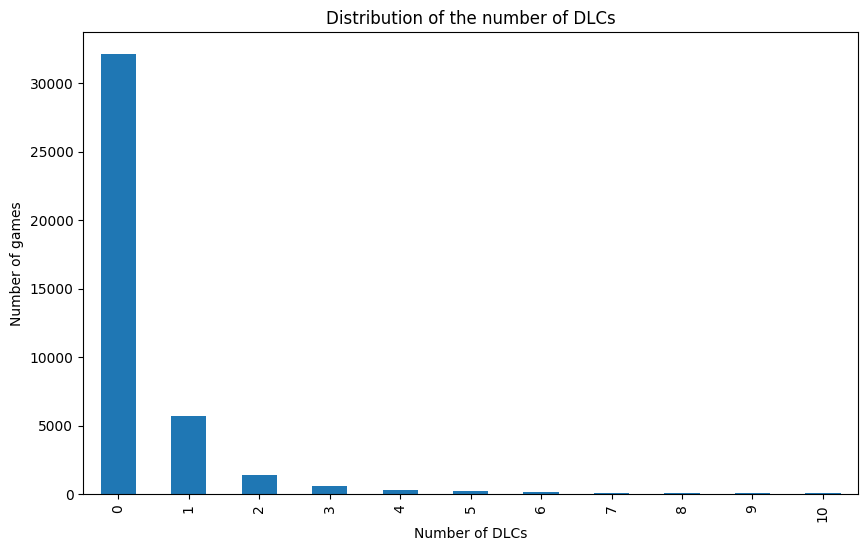

In [50]:
# Number of DLCs (up to 10)
dlc_counts = df['DLC count'].value_counts().sort_index()
dlc_counts = dlc_counts[dlc_counts.index <= 10]
plt.figure(figsize=(10, 6))
dlc_counts.plot(kind='bar')
plt.title('Distribution of the number of DLCs')
plt.xlabel('Number of DLCs')
plt.ylabel('Number of games')
plt.show()

In [51]:
# games with the most DLCs
df[df['DLC count'] == df['DLC count'].max()].head(10)

,App ID,Name,Required age,DLC count,Detailed description,About the game,Short description,Reviews,Windows,Mac,...,Peak CCU,Tags,Release date,rating,Positive ratio,user_reviews,Price final,Price original,Discount,Steam Deck
24933,1196310,Fantasy Grounds Unity,0,2366,Featured DLC / D&amp;D Essentials D&amp;D Adve...,Prep Less. Play Better. Fantasy Grounds is kno...,Prep Less. Play Better. Exciting upgrades awai...,NaN,True,True,...,145,"RPG,Dungeons & Dragons,Strategy,Indie,Software...",2020-11-05,Very Positive,83,527,30.0,0.0,0.0,True


# ATTEMPT 1

## 1. READ DATA

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/merged_steam_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41170 entries, 0 to 41169
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   App ID                      41170 non-null  int64  
 1   Name                        41170 non-null  object 
 2   Required age                41170 non-null  int64  
 3   DLC count                   41170 non-null  int64  
 4   Detailed description        41123 non-null  object 
 5   About the game              41113 non-null  object 
 6   Short description           41156 non-null  object 
 7   Reviews                     7920 non-null   object 
 8   Windows                     41170 non-null  bool   
 9   Mac                         41170 non-null  bool   
 10  Linux                       41170 non-null  bool   
 11  Metacritic score            41170 non-null  int64  
 12  Achievements                41170 non-null  int64  
 13  Recommendations             411

## 2. FEATURE SELECTION

In [53]:
# Select Relevant Features to be Explored more
selected_tabular = [
    'Release date', 'Required age', 'Price original', 'DLC count', 'Windows',
    'Mac', 'Linux', 'Steam Deck', 'Supported languages', 'Full audio languages',
    'Developers', 'Publishers',
    'Movies', 'rating'
]

selected_text = [
    'Short description', 'Genres', 'Categories', 'Tags', 'Detailed description'
]

selected_atr = selected_tabular + selected_text
selected_atr

['Release date',
 'Required age',
 'Price original',
 'DLC count',
 'Windows',
 'Mac',
 'Linux',
 'Steam Deck',
 'Supported languages',
 'Full audio languages',
 'Developers',
 'Publishers',
 'Movies',
 'rating',
 'Short description',
 'Genres',
 'Categories',
 'Tags',
 'Detailed description']

In [54]:
df = df[selected_atr]
df.head()

,Release date,Required age,Price original,DLC count,Windows,Mac,Linux,Steam Deck,Supported languages,Full audio languages,Developers,Publishers,Movies,rating,Short description,Genres,Categories,Tags,Detailed description
0,2000-11-01,0,9.99,0,True,True,True,True,"English,French,German,Italian,Spanish - Spain,...","English,French,German,Italian,Spanish - Spain,...",Valve,Valve,NaN,Overwhelmingly Positive,Play the world's number 1 online action game. ...,Action,"Multi-player,PvP,Online PvP,Shared/Split Scree...","Action,FPS,Multiplayer,Shooter,Classic,Team-Ba...",Play the world's number 1 online action game. ...
1,1999-04-01,0,4.99,0,True,True,True,True,"English,French,German,Italian,Spanish - Spain,...",NaN,Valve,Valve,NaN,Very Positive,One of the most popular online action games of...,Action,"Multi-player,PvP,Online PvP,Shared/Split Scree...","Action,FPS,Multiplayer,Classic,Hero Shooter,Sh...",One of the most popular online action games of...
2,2003-05-01,0,4.99,0,True,True,True,True,"English,French,German,Italian,Spanish - Spain",NaN,Valve,Valve,NaN,Very Positive,Enlist in an intense brand of Axis vs. Allied ...,Action,"Multi-player,Valve Anti-Cheat enabled","FPS,World War II,Multiplayer,Shooter,Action,Wa...",Enlist in an intense brand of Axis vs. Allied ...
3,2001-06-01,0,4.99,0,True,True,True,True,"English,French,German,Italian,Spanish - Spain,...",NaN,Valve,Valve,NaN,Mostly Positive,Enjoy fast-paced multiplayer gaming with Death...,Action,"Multi-player,PvP,Online PvP,Shared/Split Scree...","Action,FPS,Classic,Multiplayer,Shooter,First-P...",Enjoy fast-paced multiplayer gaming with Death...
4,1999-11-01,0,4.99,0,True,True,True,True,"English,French,German,Korean",NaN,Gearbox Software,Valve,NaN,Overwhelmingly Positive,Return to the Black Mesa Research Facility as ...,Action,"Single-player,Multi-player,Valve Anti-Cheat en...","FPS,Action,Classic,Sci-fi,Singleplayer,Shooter...",Return to the Black Mesa Research Facility as ...


In [55]:
df.rename(columns={
    'Price original': 'Price'
}, inplace=True)

## 3. EDA

### 3a. Missing Values Identification

In [56]:
# Get missing value amount and percentage for each column and sort Descending
missing_values = df.isna().sum()
missing_values = missing_values[missing_values > 0]
missing_values = pd.DataFrame(missing_values)
missing_values.columns = ['Missing Values']
missing_values['Percentage'] = (missing_values['Missing Values'] / df.shape[0]) * 100
missing_values = missing_values.sort_values(by='Missing Values', ascending=False)
missing_values

,Missing Values,Percentage
Full audio languages,21882,53.150352
Tags,3690,8.962837
Movies,1804,4.381831
Categories,527,1.280058
Publishers,221,0.536799
Developers,74,0.179743
Detailed description,47,0.114161
Genres,44,0.106874
Short description,14,0.034005
Supported languages,13,0.031576


#### Exploring Full Audio Languages

In [57]:
df[df['Full audio languages'].notnull()]['Full audio languages']

0        English,French,German,Italian,Spanish - Spain,...
6        English,French,German,Italian,Spanish - Spain,...
9        English,French,German,Italian,Korean,Spanish -...
16       English,French,German,Italian,Korean,Spanish -...
17       English,French,German,Russian,Spanish - Spain,...
                               ...                        
41158                                              English
41163                                             Japanese
41167                                              English
41168                                              English
41169                                              English
Name: Full audio languages, Length: 19288, dtype: object

Full audio languages may influence rating of a game since it aligns with people's preferences in playing games. To handle the missing value here, we will make a new column 'Has Full Audio' with value yes/no or 1/0.

#### Explore < 10% Missing value columns

In [58]:
df[df['Tags'].notnull()]['Tags']

0        Action,FPS,Multiplayer,Shooter,Classic,Team-Ba...
1        Action,FPS,Multiplayer,Classic,Hero Shooter,Sh...
2        FPS,World War II,Multiplayer,Shooter,Action,Wa...
3        Action,FPS,Classic,Multiplayer,Shooter,First-P...
4        FPS,Action,Classic,Sci-fi,Singleplayer,Shooter...
                               ...                        
41165    Early Access,CRPG,Dungeon Crawler,Exploration,...
41166    Old School,Time Management,Education,Open Worl...
41167    Hunting,Horror,Dark Humor,Nature,Exploration,A...
41168    3D Platformer,Action-Adventure,Comedy,Action,A...
41169    Simulation,Hidden Object,Horror,Puzzle,Realist...
Name: Tags, Length: 37480, dtype: object

Tags' missing values can just be removed/dropped, but this approach can't be mixed with dropping rows in other columns that has missing values < 10% too. So lets just see the others result and decide in the last part of this section.

In [59]:
df[df['Genres'].notnull()]['Genres']

0                                       Action
1                                       Action
2                                       Action
3                                       Action
4                                       Action
                         ...                  
41165                  Action,RPG,Early Access
41166    Action,Adventure,Indie,RPG,Simulation
41167                                   Action
41168                         Action,Adventure
41169                               Simulation
Name: Genres, Length: 41126, dtype: object

Same like Tags, but more valuable

In [60]:
df[df['Movies'].notnull()]['Movies']

9        http://cdn.akamai.steamstatic.com/steam/apps/9...
16       http://cdn.akamai.steamstatic.com/steam/apps/9...
17       http://cdn.akamai.steamstatic.com/steam/apps/9...
19       http://cdn.akamai.steamstatic.com/steam/apps/2...
20       http://cdn.akamai.steamstatic.com/steam/apps/5...
                               ...                        
41165    http://cdn.akamai.steamstatic.com/steam/apps/2...
41166    http://cdn.akamai.steamstatic.com/steam/apps/2...
41167    http://cdn.akamai.steamstatic.com/steam/apps/2...
41168    http://cdn.akamai.steamstatic.com/steam/apps/2...
41169    http://cdn.akamai.steamstatic.com/steam/apps/2...
Name: Movies, Length: 39366, dtype: object

- We can assume that a movie of a game can influence the game's rating. Someone may give bad rating if the game is not the same as presented in the movie.
- Others assumption is that game who has movie reflects the seriousness of the developer and publisher in developing and selling it which may increase the rating

In [61]:
df[df['Categories'].notnull()]['Categories']

0        Multi-player,PvP,Online PvP,Shared/Split Scree...
1        Multi-player,PvP,Online PvP,Shared/Split Scree...
2                    Multi-player,Valve Anti-Cheat enabled
3        Multi-player,PvP,Online PvP,Shared/Split Scree...
4        Single-player,Multi-player,Valve Anti-Cheat en...
                               ...                        
41165    Single-player,Partial Controller Support,Steam...
41166    Single-player,Multi-player,PvP,Shared/Split Sc...
41167    Single-player,Steam Achievements,Full controll...
41168    Single-player,Steam Achievements,Full controll...
41169                     Single-player,Steam Achievements
Name: Categories, Length: 40643, dtype: object

The same as Tags and genres

In [62]:
df[df['Supported languages'].notnull()]['Supported languages']

0        English,French,German,Italian,Spanish - Spain,...
1        English,French,German,Italian,Spanish - Spain,...
2            English,French,German,Italian,Spanish - Spain
3        English,French,German,Italian,Spanish - Spain,...
4                             English,French,German,Korean
                               ...                        
41165                                              English
41166                                              English
41167                                              English
41168                                              English
41169                                              English
Name: Supported languages, Length: 41157, dtype: object

We can just drop it since imputation would be hard for this column

#### CONCLUSION

Drop missing rows of:
- Supported languages
- Tags
- Categories
- Detail description
- Genres
- Short description

Convert into binary columns:
- Full audio languages => Has/Not has
- Movies => Has/Not has

Impute with Unknown:
- Publishers
- Developers

### 3b. Noise Identification

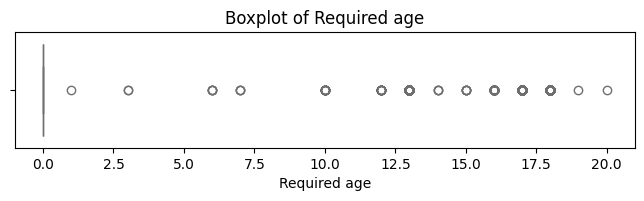

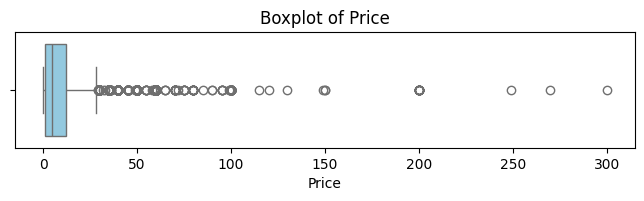

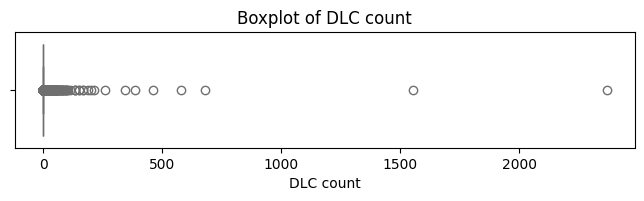

In [63]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in num_cols:
    plt.figure(figsize=(8, 1.5))
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"Boxplot of {col}")
    plt.show()

In [64]:
# Use IQR
for col in num_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower) | (df[col] > upper)][col]
    print(f"{col}: {outliers.count()} outliers ({100 * outliers.count() / df.shape[0]:.2f}%)")

Required age: 1145 outliers (2.78%)
Price: 2046 outliers (4.97%)
DLC count: 9061 outliers (22.01%)


#### Exploring Required Age

In [65]:
# Required age unique values
df['Required age'].unique()

array([ 0, 17, 13, 18, 16, 15,  6, 12, 10, 14,  1,  7,  3, 20, 19],
      dtype=int64)

In [66]:
# Count based on required age
df['Required age'].value_counts()

Required age
0     40025
17      732
18      155
13      153
16       54
10       17
12       14
15        5
6         4
14        3
7         3
3         2
1         1
20        1
19        1
Name: count, dtype: int64

It can just be dropped or categorized (discretization) to < 17 and > 17 or based on the game age requirement chart. 

#### Exploring Price (Original)

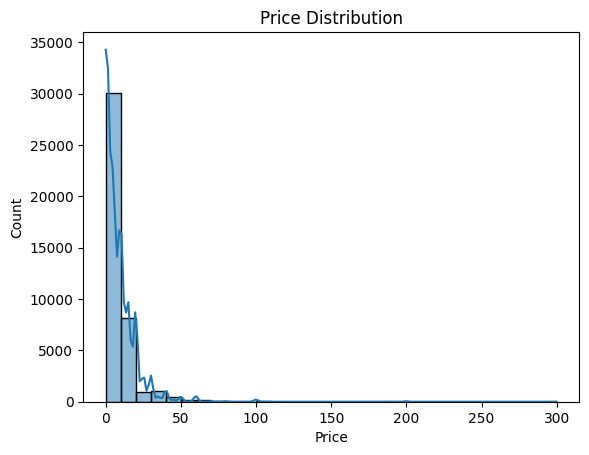

In [67]:
# Price distribution with density plot
sns.histplot(df['Price'].dropna(), kde=True, bins=30)
plt.title('Price Distribution')
plt.show()

it is right skewed

In [68]:
print(df['Price'].describe())

count    41170.000000
mean         8.722289
std         11.496071
min          0.000000
25%          0.990000
50%          4.990000
75%         11.990000
max        299.900000
Name: Price, dtype: float64


In [69]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df[(df['Price'] < lower) | (df['Price'] > upper)]

,Release date,Required age,Price,DLC count,Windows,Mac,Linux,Steam Deck,Supported languages,Full audio languages,Developers,Publishers,Movies,rating,Short description,Genres,Categories,Tags,Detailed description
77,2013-11-15,0,29.99,7,True,True,True,True,"English,German,Italian,Russian,Simplified Chin...","English,German,French,Korean",Egosoft,Egosoft,http://cdn.akamai.steamstatic.com/steam/apps/2...,Mixed,"In the distant future, the X universe faces a ...","Action,Simulation","Single-player,Steam Achievements,Full controll...","Simulation,Space,Sci-fi,Action,Space Sim,Sandb...","In the distant future, the X universe faces a ..."
128,2006-10-25,0,29.99,0,True,True,False,True,"English,French,German,Italian,Spanish - Spain",NaN,Firaxis Games,2K,NaN,Very Positive,With over 6 million units sold and unprecedent...,Strategy,"Single-player,Multi-player,Includes level editor","Strategy,Turn-Based Strategy,Turn-Based,4X,His...",With over 6 million units sold and unprecedent...
136,2006-11-24,0,39.99,0,True,False,False,True,"English,French,German,Italian,Spanish - Spain",NaN,SimBin,SimBin,NaN,Very Positive,The Official WTCC Game | RACE is the first eve...,Racing,"Single-player,Multi-player","Racing,Automobile Sim,Driving,Simulation",The Official WTCC Game | RACE is the first eve...
197,2008-04-16,0,29.99,0,True,False,False,True,"English,French,German,Italian,Spanish - Spain,...",NaN,Nadeo,Ubisoft,NaN,Very Positive,TrackMania is the most entertaining car racing...,Racing,"Single-player,Multi-player,Includes level editor","Racing,Multiplayer,Level Editor,Singleplayer,T...",TrackMania is the most entertaining car racing...
232,2007-07-24,0,29.99,0,True,True,False,True,"English,French,German,Italian,Spanish - Spain",NaN,Firaxis Games,2K,NaN,Overwhelmingly Positive,Sid Meier's Civilization IV®: Beyond the Sword...,Strategy,Single-player,"Strategy,Turn-Based Strategy,4X,Turn-Based,His...",Sid Meier's Civilization IV®: Beyond the Sword...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41078,2023-05-23,0,199.99,0,True,True,True,True,"English,French,Italian,German,Spanish - Spain,...",NaN,PUZZLE Games,Hede,http://cdn.akamai.steamstatic.com/steam/apps/2...,Positive,"Collect a 3D puzzle, transferring things to th...","Action,Adventure,Casual,Indie,Racing,RPG,Simul...","Single-player,Steam Achievements,Steam Leaderb...",NaN,"Collect a 3D puzzle, transferring things to th..."
41079,2023-05-23,0,199.99,0,True,True,True,True,"English,French,Italian,German,Spanish - Spain,...",NaN,PUZZLE Games,Hede,http://cdn.akamai.steamstatic.com/steam/apps/2...,Positive,"Collect a 3D puzzle, transferring things to th...","Action,Adventure,Casual,Indie,Racing,RPG,Simul...","Single-player,Steam Achievements,Steam Leaderb...",NaN,"Collect a 3D puzzle, transferring things to th..."
41086,2023-06-21,0,29.99,0,True,False,False,True,"Japanese,Simplified Chinese,Traditional Chinese","Japanese,Traditional Chinese",NanaWind,HIKARI FIELD,http://cdn.akamai.steamstatic.com/steam/apps/2...,Positive,本作是日本美少女游戏知名品牌NanaWind（七风社）制作的超能力校园恋爱题材作品，是《爱丽...,"Adventure,Casual","Single-player,Steam Achievements,Partial Contr...","Casual,Adventure,Interactive Fiction,2D Platfo...",《爱丽娅的明日盛典! Flowering Sky》国际中文版内置简体中文、繁体中文与日文版三...
41141,2023-06-09,0,39.99,0,True,False,False,True,"English,Russian",NaN,Neki4 Electronics,Neki4 Electronics,http://cdn.akamai.steamstatic.com/steam/apps/2...,Positive,You have to explore the mysterious forest and ...,Action,Single-player,NaN,Forest Horror is an addictive horror game that...


In [70]:
df['Price'].sort_values(ascending=True)

41169      0.00
31968      0.00
31967      0.00
23636      0.00
31964      0.00
          ...  
37539    199.99
7475     199.99
38421    249.00
9157     269.99
2078     299.90
Name: Price, Length: 41170, dtype: float64

In [71]:
# see > 75% prices
Q3 = df['Price'].quantile(0.75)
df[df['Price'] > Q3].sort_values(by='Price', ascending=False).head(5)

,Release date,Required age,Price,DLC count,Windows,Mac,Linux,Steam Deck,Supported languages,Full audio languages,Developers,Publishers,Movies,rating,Short description,Genres,Categories,Tags,Detailed description
2078,2013-11-12,0,299.90,0,True,False,False,True,English,NaN,Aartform,Aartform,http://cdn.akamai.steamstatic.com/steam/apps/2...,Mixed,Curvy 3D 3.0 is an innovative sculpting progra...,Animation & Modeling,Single-player,Animation & Modeling,Curvy 3D 4 Curvy 3D 4 is out now! \\\ Aartform...
9157,2018-10-10,0,269.99,0,True,True,False,True,English,NaN,SideFX,SideFX,http://cdn.akamai.steamstatic.com/steam/apps/2...,Very Positive,Houdini Indie's procedural node-based workflow...,"Animation & Modeling,Design & Illustration,Vid...","Partial Controller Support,Steam Cloud","Animation & Modeling,Game Development,3D,Desig...",As an indie game dev you are faced with the ch...
38421,2022-11-01,0,249.00,0,True,False,False,True,"English,French,German,Spanish - Spain",NaN,MAGIX Software GmbH,MAGIX Software GmbH,http://cdn.akamai.steamstatic.com/steam/apps/2...,Mixed,"VEGAS Edit 20 Steam Edition. Fast, easy editin...",Video Production,NaN,"Video Production,Software",VEGAS Edit 20 Steam Edition is everything you ...
37539,2022-05-21,0,199.99,0,True,False,False,True,English,NaN,"Cristian Manolachi,Atomic Fabrik","Cristian Manolachi,Atomic Fabrik",http://cdn.akamai.steamstatic.com/steam/apps/2...,Mixed,The School Bus Driver Simulator game offers yo...,"Casual,Indie,Racing,Simulation",Single-player,"Casual,Simulation,Racing,Automobile Sim,Explor...","Such a simple job, but with a very big respons..."
33727,2021-09-09,0,199.99,0,True,False,False,True,"English,French,German,Spanish - Spain",NaN,MAGIX Software GmbH,MAGIX Software GmbH,http://cdn.akamai.steamstatic.com/steam/apps/2...,Mostly Positive,VEGAS Edit 19 – Steam Edition comes with the e...,Video Production,NaN,"Video Production,Psychological Horror",Record multiple video and audio sources and br...


After exploring the Price feature, it turns out that the "games" with high prices are mostly actually software for editing/producing—things like game development tools, animation, 3D illustration, web publishing, etc.—which aren’t relevant to our context, as we want to build a model to predict Steam game ratings, not Steam applications.
So, to handle extreme values in the price, we’d suggest sticking with one of these two options:
1. Remove all entries that are not actual games
2. Drop all rows where the price is an outlier, since price outliers aren’t that many—less than 10%

#### Explore DLC Count

In [72]:
df['DLC count'].describe()

count    41170.000000
mean         0.823731
std         15.609517
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2366.000000
Name: DLC count, dtype: float64

In [73]:
df['DLC count'].value_counts()

DLC count
0      32109
1       5687
2       1428
3        567
4        322
       ...  
75         1
153        1
168        1
71         1
90         1
Name: count, Length: 91, dtype: int64

We can't dropped it since the noise are quite a lot and it can remove any valuable information. So we'll just make a new column 'Has DLC' that contains yes/no or 1/0

### 3c. Duplicates : No duplicates

In [74]:
# Check for duplicates
df.duplicated().sum()

0

### 3d. Univariate Analysis

In [75]:
# Count unique values per column
unique_counts = df.nunique()

# Columns with more than 5 unique values
less_than_5 = unique_counts[unique_counts < 5]

# Columns with more than 10 unique values
between_5_10 = unique_counts[(unique_counts >= 5) & (unique_counts <= 10)]

# Columns with more than 10 unique values
more_than_10 = unique_counts[unique_counts > 10]

# Display results
print("Columns with less than 5 unique values:")
print(less_than_5)

print("\nColumns between 5 and 10 unique values:")
print(between_5_10)

print("\nColumns with more than 10 unique values:")
print(more_than_10)

Columns with less than 5 unique values:
Windows       2
Mac           2
Linux         2
Steam Deck    1
dtype: int64

Columns between 5 and 10 unique values:
rating    9
dtype: int64

Columns with more than 10 unique values:
Release date             4151
Required age               15
Price                     160
DLC count                  91
Supported languages      8325
Full audio languages     1657
Developers              25493
Publishers              20687
Movies                  39362
Short description       40911
Genres                   1823
Categories               4513
Tags                    35052
Detailed description    41060
dtype: int64


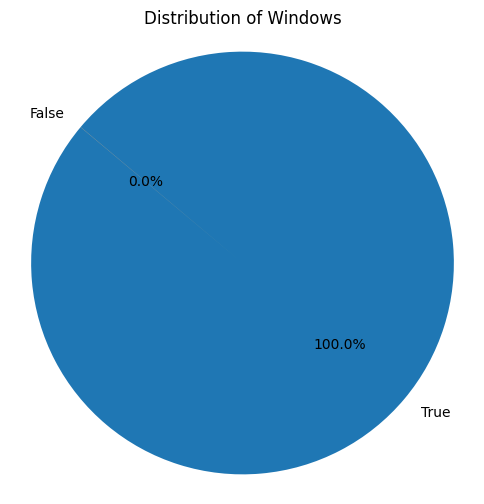

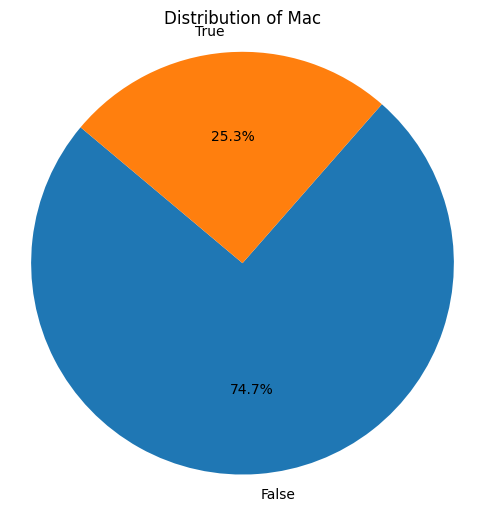

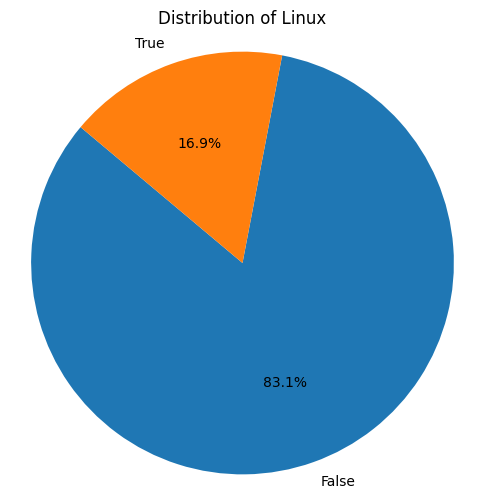

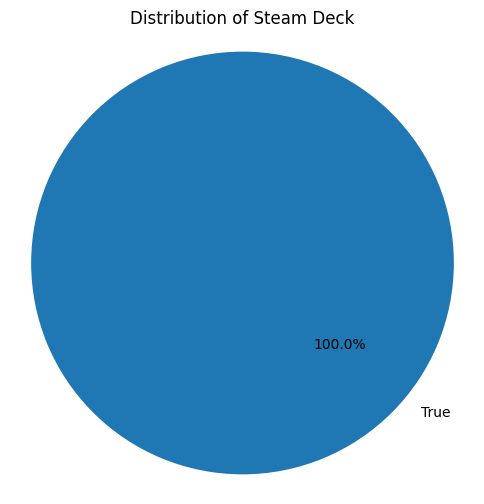

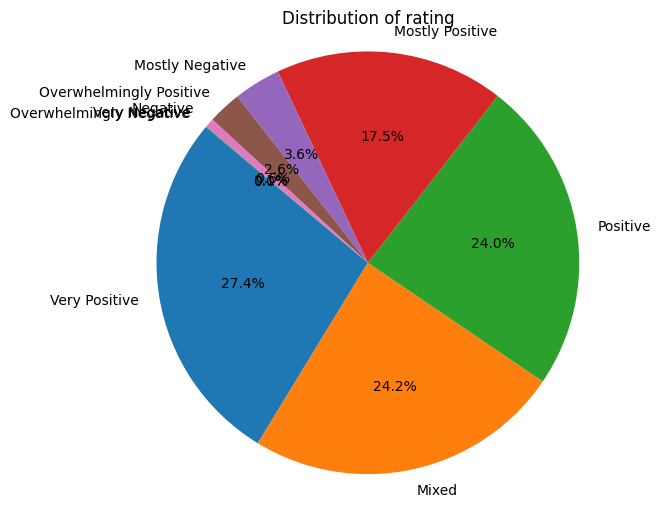

In [76]:
# Loop through and create pie chart for each
for col in df.columns:
    # Only proceed if unique values are not too many (for readability)
    if df[col].nunique() <= 10:
        value_counts = df[col].value_counts().head(10)
        plt.figure(figsize=(6, 6))
        plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
        plt.title(f"Distribution of {col}")
        plt.axis('equal')
        plt.show()

Windows and steam deck are 100%, they should be dropped because they have no predictive power

In [77]:
# Count of free and paid games
free_paid_counts = df['Price'].apply(lambda x: 'Free' if x == 0 else 'Paid').value_counts()

print(free_paid_counts)

Price
Paid    32616
Free     8554
Name: count, dtype: int64


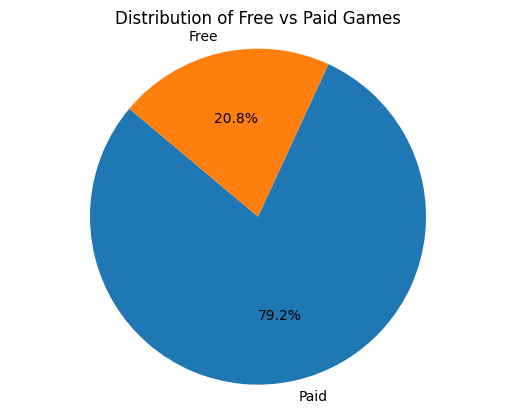

In [78]:
free_paid_counts.plot(kind='pie', autopct='%1.1f%%', labels=free_paid_counts.index, startangle=140)
plt.title('Distribution of Free vs Paid Games')
plt.ylabel('')
plt.axis('equal')
plt.show()

In [79]:
df['Supported languages'].value_counts()

Supported languages
English                                                                                                                                                                                                18892
English,Russian                                                                                                                                                                                         1355
Simplified Chinese                                                                                                                                                                                       926
English,Simplified Chinese                                                                                                                                                                               687
English,Japanese                                                                                                                                                

In [81]:
# Show top 10 most frequent developers and the rest as "Other" in pie chart
top_developers = df['Developers'].value_counts().head(10)
other_count = df['Developers'].value_counts().sum() - top_developers.sum()
top_developers = top_developers.append(pd.Series({'Other': other_count}))
top_developers.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Developers and Others')
plt.ylabel('')
plt.axis('equal')
plt.show()

AttributeError: 'Series' object has no attribute 'append'

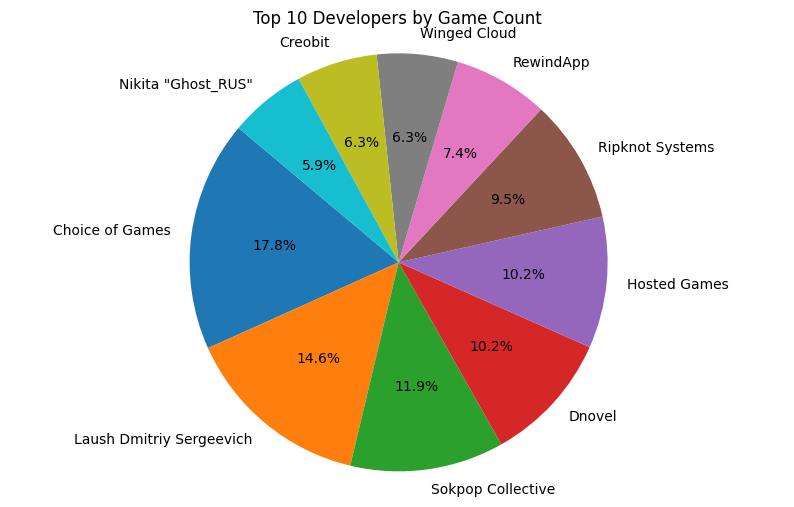

In [ ]:
# Show top 10 most frequent developers as pie chart
top_developers = df['Developers'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_developers.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Developers by Game Count')
plt.ylabel('')
plt.axis('equal')
plt.show()

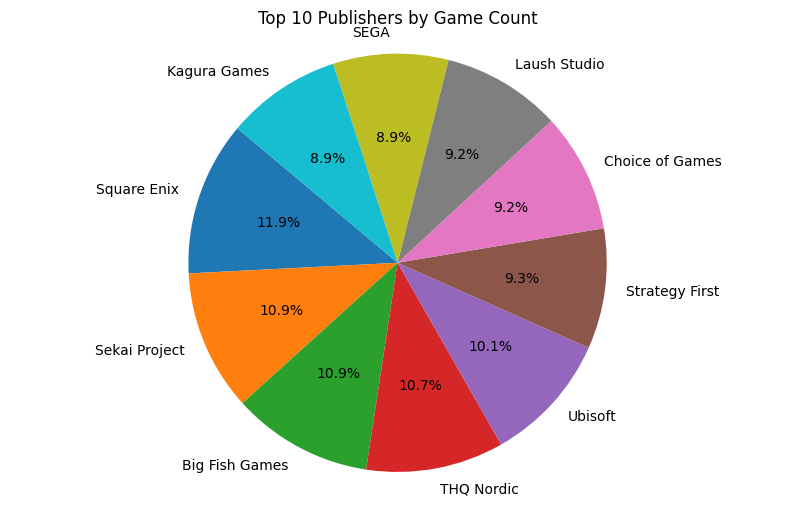

In [ ]:
# Show top 10 most frequent publishers using pie chart
top_publishers = df['Publishers'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_publishers.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Publishers by Game Count')
plt.ylabel('')
plt.axis('equal')
plt.show()

## 4. PREPROCESSING

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

### 4a. Data Cleaning

#### Missing Values Handling

In [ ]:
# Drop rows
critical_cols = ['Tags', 'Supported languages', 'Categories', 'Detailed description', 'Genres', 'Short description']
df.dropna(subset=critical_cols, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36944 entries, 0 to 41169
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Release date          36944 non-null  object 
 1   Required age          36944 non-null  int64  
 2   Price                 36944 non-null  float64
 3   DLC count             36944 non-null  int64  
 4   Windows               36944 non-null  bool   
 5   Mac                   36944 non-null  bool   
 6   Linux                 36944 non-null  bool   
 7   Steam Deck            36944 non-null  bool   
 8   Supported languages   36944 non-null  object 
 9   Full audio languages  17449 non-null  object 
 10  Developers            36944 non-null  object 
 11  Publishers            36779 non-null  object 
 12  Movies                35268 non-null  object 
 13  rating                36944 non-null  object 
 14  Short description     36944 non-null  object 
 15  Genres             

In [ ]:
# Fill Publishers and Developers with unknown
df['Publishers'] = df['Publishers'].fillna('Unknown')
df['Developers'] = df['Developers'].fillna('Unknown')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36944 entries, 0 to 41169
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Release date          36944 non-null  object 
 1   Required age          36944 non-null  int64  
 2   Price                 36944 non-null  float64
 3   DLC count             36944 non-null  int64  
 4   Windows               36944 non-null  bool   
 5   Mac                   36944 non-null  bool   
 6   Linux                 36944 non-null  bool   
 7   Steam Deck            36944 non-null  bool   
 8   Supported languages   36944 non-null  object 
 9   Full audio languages  17449 non-null  object 
 10  Developers            36944 non-null  object 
 11  Publishers            36944 non-null  object 
 12  Movies                35268 non-null  object 
 13  rating                36944 non-null  object 
 14  Short description     36944 non-null  object 
 15  Genres             

#### Noise Handling

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36944 entries, 0 to 41169
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Release date          36944 non-null  object 
 1   Required age          36944 non-null  int64  
 2   Price                 36944 non-null  float64
 3   DLC count             36944 non-null  int64  
 4   Windows               36944 non-null  bool   
 5   Mac                   36944 non-null  bool   
 6   Linux                 36944 non-null  bool   
 7   Steam Deck            36944 non-null  bool   
 8   Supported languages   36944 non-null  object 
 9   Full audio languages  17449 non-null  object 
 10  Developers            36944 non-null  object 
 11  Publishers            36944 non-null  object 
 12  Movies                35268 non-null  object 
 13  rating                36944 non-null  object 
 14  Short description     36944 non-null  object 
 15  Genres             

##### Bin required age into 3 categories

In [ ]:
def age_category(age):
    if age <= 12:
        return 'Everyone'
    elif 13 <= age <= 17:
        return 'Teen'
    else:
        return 'Adult'

df['Required age category'] = df['Required age'].apply(age_category)
df.drop(columns=['Required age'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36944 entries, 0 to 41169
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Release date           36944 non-null  object 
 1   Price                  36944 non-null  float64
 2   DLC count              36944 non-null  int64  
 3   Windows                36944 non-null  bool   
 4   Mac                    36944 non-null  bool   
 5   Linux                  36944 non-null  bool   
 6   Steam Deck             36944 non-null  bool   
 7   Supported languages    36944 non-null  object 
 8   Full audio languages   17449 non-null  object 
 9   Developers             36944 non-null  object 
 10  Publishers             36944 non-null  object 
 11  Movies                 35268 non-null  object 
 12  rating                 36944 non-null  object 
 13  Short description      36944 non-null  object 
 14  Genres                 36944 non-null  object 
 15  Ca

In [ ]:
df['Required age category'].value_counts()

Everyone    35877
Teen          919
Adult         148
Name: Required age category, dtype: int64

##### Remove outliers in price using IQR

In [ ]:
q1 = df['Price'].quantile(.25)
q3 = df['Price'].quantile(.75)
iqr = q3-q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outliers = df[(df['Price'] < lower) | (df['Price'] > upper)]
print(outliers.shape)
df = df[(df['Price'] >= lower) & (df['Price'] <= upper)]
print(df.info())

(1801, 19)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 35143 entries, 0 to 41169
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Release date           35143 non-null  object 
 1   Price                  35143 non-null  float64
 2   DLC count              35143 non-null  int64  
 3   Windows                35143 non-null  bool   
 4   Mac                    35143 non-null  bool   
 5   Linux                  35143 non-null  bool   
 6   Steam Deck             35143 non-null  bool   
 7   Supported languages    35143 non-null  object 
 8   Full audio languages   16215 non-null  object 
 9   Developers             35143 non-null  object 
 10  Publishers             35143 non-null  object 
 11  Movies                 33502 non-null  object 
 12  rating                 35143 non-null  object 
 13  Short description      35143 non-null  object 
 14  Genres                 35143 non-null  obje

### 4b. Feature Engineering

##### Binning DLC Count into Has DLC

In [ ]:
# Binning DLC count into Has DLC
df['Has DLC'] = np.where(df['DLC count'] > 0, 1, 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35143 entries, 0 to 41169
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Release date           35143 non-null  object 
 1   Price                  35143 non-null  float64
 2   DLC count              35143 non-null  int64  
 3   Windows                35143 non-null  bool   
 4   Mac                    35143 non-null  bool   
 5   Linux                  35143 non-null  bool   
 6   Steam Deck             35143 non-null  bool   
 7   Supported languages    35143 non-null  object 
 8   Full audio languages   16215 non-null  object 
 9   Developers             35143 non-null  object 
 10  Publishers             35143 non-null  object 
 11  Movies                 33502 non-null  object 
 12  rating                 35143 non-null  object 
 13  Short description      35143 non-null  object 
 14  Genres                 35143 non-null  object 
 15  Ca

In [ ]:
df['Has DLC'].value_counts()

0    27428
1     7715
Name: Has DLC, dtype: int64

In [ ]:
# drop DLC Count
df.drop(columns=['DLC count'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35143 entries, 0 to 41169
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Release date           35143 non-null  object 
 1   Price                  35143 non-null  float64
 2   Windows                35143 non-null  bool   
 3   Mac                    35143 non-null  bool   
 4   Linux                  35143 non-null  bool   
 5   Steam Deck             35143 non-null  bool   
 6   Supported languages    35143 non-null  object 
 7   Full audio languages   16215 non-null  object 
 8   Developers             35143 non-null  object 
 9   Publishers             35143 non-null  object 
 10  Movies                 33502 non-null  object 
 11  rating                 35143 non-null  object 
 12  Short description      35143 non-null  object 
 13  Genres                 35143 non-null  object 
 14  Categories             35143 non-null  object 
 15  Ta

#### Make Has Full Audio and Has Movie feature

In [ ]:
# Convert Full audio languages and Movies into binary columns
df['Has full audio'] = df['Full audio languages'].notnull().map({True: 1, False: 0})
df['Has movie'] = df['Movies'].notnull().map({True: 1, False: 0})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35143 entries, 0 to 41169
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Release date           35143 non-null  object 
 1   Price                  35143 non-null  float64
 2   Windows                35143 non-null  bool   
 3   Mac                    35143 non-null  bool   
 4   Linux                  35143 non-null  bool   
 5   Steam Deck             35143 non-null  bool   
 6   Supported languages    35143 non-null  object 
 7   Full audio languages   16215 non-null  object 
 8   Developers             35143 non-null  object 
 9   Publishers             35143 non-null  object 
 10  Movies                 33502 non-null  object 
 11  rating                 35143 non-null  object 
 12  Short description      35143 non-null  object 
 13  Genres                 35143 non-null  object 
 14  Categories             35143 non-null  object 
 15  Ta

In [ ]:
# Drop columns: Movies, Full Audio support
df.drop(columns=['Movies', 'Full audio languages'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35143 entries, 0 to 41169
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Release date           35143 non-null  object 
 1   Price                  35143 non-null  float64
 2   Windows                35143 non-null  bool   
 3   Mac                    35143 non-null  bool   
 4   Linux                  35143 non-null  bool   
 5   Steam Deck             35143 non-null  bool   
 6   Supported languages    35143 non-null  object 
 7   Developers             35143 non-null  object 
 8   Publishers             35143 non-null  object 
 9   rating                 35143 non-null  object 
 10  Short description      35143 non-null  object 
 11  Genres                 35143 non-null  object 
 12  Categories             35143 non-null  object 
 13  Tags                   35143 non-null  object 
 14  Detailed description   35143 non-null  object 
 15  Re

#### Make Release Year and Game Age from Release date

In [ ]:
# Make Release Year and Game Age from Release date
from datetime import datetime

# Convert to datetime (handle errors gracefully)
df['Release date'] = pd.to_datetime(df['Release date'], errors='coerce')

# Drop rows where date conversion failed (optional or handle as missing)
df = df.dropna(subset=['Release date'])

# Extract release year and game age
df['Release Year'] = df['Release date'].dt.year
df['Game Age'] = datetime.now().year - df['Release Year']

# Drop original release date column
df = df.drop(columns=['Release date'])

#### Make Is Free feature from Price

In [ ]:
df['IsFree'] = df['Price'].apply(lambda x: 1 if x == 0 else 0)

#### Convert Developers and Publishers into top 10 and others

In [ ]:
# Map others to 'small_devs'
df['Developers'] = df['Developers'].apply(
    lambda x: x if x in top_developers else 'small_devs'
)

In [ ]:
# Map others to 'small_publishers'
df['Publishers'] = df['Publishers'].apply(
    lambda x: x if x in top_publishers else 'small_publishers'
)

### 4c. Encoding

#### Encode binary to 1 or 0

In [ ]:
# Convert Windows, Mac, Linux, Steam Deck to binary
df['Windows'] = df['Windows'].apply(lambda x: 1 if x else 0)
df['Mac'] = df['Mac'].apply(lambda x: 1 if x else 0)
df['Linux'] = df['Linux'].apply(lambda x: 1 if x else 0)
df['Steam Deck'] = df['Steam Deck'].apply(lambda x: 1 if x else 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35143 entries, 0 to 41169
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Price                  35143 non-null  float64
 1   Windows                35143 non-null  int64  
 2   Mac                    35143 non-null  int64  
 3   Linux                  35143 non-null  int64  
 4   Steam Deck             35143 non-null  int64  
 5   Supported languages    35143 non-null  object 
 6   Developers             35143 non-null  object 
 7   Publishers             35143 non-null  object 
 8   rating                 35143 non-null  object 
 9   Short description      35143 non-null  object 
 10  Genres                 35143 non-null  object 
 11  Categories             35143 non-null  object 
 12  Tags                   35143 non-null  object 
 13  Detailed description   35143 non-null  object 
 14  Required age category  35143 non-null  object 
 15  Ha

#### Encode Developers and Publishers

In [ ]:
le_dev = LabelEncoder()
le_pub = LabelEncoder()

df['Developers'] = le_dev.fit_transform(df['Developers'])
df['Publishers'] = le_pub.fit_transform(df['Publishers'])

#### Encode Target label: rating

In [ ]:
le_rating = LabelEncoder()
df['rating'] = le_rating.fit_transform(df['rating'])

### 4d. Feature Selection

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35143 entries, 0 to 41169
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Price                  35143 non-null  float64
 1   Windows                35143 non-null  int64  
 2   Mac                    35143 non-null  int64  
 3   Linux                  35143 non-null  int64  
 4   Steam Deck             35143 non-null  int64  
 5   Supported languages    35143 non-null  object 
 6   Developers             35143 non-null  int32  
 7   Publishers             35143 non-null  int32  
 8   rating                 35143 non-null  int32  
 9   Short description      35143 non-null  object 
 10  Genres                 35143 non-null  object 
 11  Categories             35143 non-null  object 
 12  Tags                   35143 non-null  object 
 13  Detailed description   35143 non-null  object 
 14  Required age category  35143 non-null  object 
 15  Ha

In [ ]:
drop_cols = [
    'Windows', 'Steam Deck','Required age category',  
    'Supported languages',
    'Short description', 'Genres', 'Categories', 'Tags', 'Detailed description'
]
df = df.drop(columns=drop_cols)

## 5. MODELING

### 5a. Split data

In [ ]:
X = df.drop(columns=['rating'])
y = df['rating']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
X_train

,Price,Mac,Linux,Developers,Publishers,Has DLC,Has full audio,Has movie,Release Year,Game Age,IsFree
11793,1.99,0,0,10,10,0,1,1,2017,8,0
5563,9.99,0,0,10,10,1,0,1,2015,10,0
36018,0.99,0,0,10,10,0,0,1,2022,3,0
26876,9.99,0,0,10,10,0,1,1,2023,2,0
11046,4.99,0,0,10,10,0,0,1,2017,8,0
...,...,...,...,...,...,...,...,...,...,...,...
28608,11.99,0,0,10,10,0,0,1,2021,4,0
14526,12.99,1,0,10,10,0,1,1,2020,5,0
23713,2.99,1,0,8,10,0,0,1,2020,5,0
21144,5.99,0,0,10,10,0,1,1,2019,6,0


### 5b. Model: Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm
import time

# Simulate training progress bar
print("Training Logistic Regression...")
for _ in tqdm(range(1), desc="Fitting Logistic Regression"):
    logreg_model = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='auto')
    logreg_model.fit(X_train, y_train)
    time.sleep(0.2)  # Optional: simulate time delay for better visual feedback

Training Logistic Regression...


Fitting Logistic Regression:   0%|          | 0/1 [00:00<?, ?it/s]c:\Users\WilliamVlr\BINUS Local\CAWU 5\PROJEK DATA MINING\CODE\games_dm_environment\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
Fitting Logistic Regression: 100%|██████████| 1/1 [00:13<00:00, 13.34s/it]


In [ ]:
from sklearn.metrics import classification_report

# Predict and evaluate
y_pred_logreg = logreg_model.predict(X_test)
print("\n📊 Classification Report: Logistic Regression")
print(classification_report(y_test, y_pred_logreg, target_names=le_rating.classes_))


📊 Classification Report: Logistic Regression
                         precision    recall  f1-score   support

                  Mixed       0.36      0.43      0.39      1716
        Mostly Negative       0.00      0.00      0.00       260
        Mostly Positive       0.00      0.00      0.00      1247
               Negative       0.00      0.00      0.00        47
Overwhelmingly Negative       0.00      0.00      0.00         1
Overwhelmingly Positive       0.00      0.00      0.00       180
               Positive       0.39      0.57      0.46      1651
          Very Negative       0.00      0.00      0.00         6
          Very Positive       0.36      0.48      0.41      1921

               accuracy                           0.37      7029
              macro avg       0.12      0.16      0.14      7029
           weighted avg       0.28      0.37      0.32      7029



c:\Users\WilliamVlr\BINUS Local\CAWU 5\PROJEK DATA MINING\CODE\games_dm_environment\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\WilliamVlr\BINUS Local\CAWU 5\PROJEK DATA MINING\CODE\games_dm_environment\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\WilliamVlr\BINUS Local\CAWU 5\PROJEK DATA MINING\CODE\games_dm_environment\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicte

### 5c. Model: Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Simulate training progress bar
print("Training Decision Tree...")
for _ in tqdm(range(1), desc="Fitting Decision Tree"):
    tree_model = DecisionTreeClassifier(random_state=42)
    tree_model.fit(X_train, y_train)
    time.sleep(0.2)


Training Decision Tree...


Fitting Decision Tree: 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]


In [ ]:
# Predict and evaluate
y_pred_tree = tree_model.predict(X_test)
print("\n📊 Classification Report: Decision Tree")
print(classification_report(y_test, y_pred_tree, target_names=le_rating.classes_))



📊 Classification Report: Decision Tree
                         precision    recall  f1-score   support

                  Mixed       0.33      0.51      0.40      1716
        Mostly Negative       0.12      0.02      0.04       260
        Mostly Positive       0.20      0.07      0.11      1247
               Negative       0.00      0.00      0.00        47
Overwhelmingly Negative       0.00      0.00      0.00         1
Overwhelmingly Positive       0.00      0.00      0.00       180
               Positive       0.42      0.49      0.45      1651
          Very Negative       0.00      0.00      0.00         6
          Very Positive       0.39      0.39      0.39      1921

               accuracy                           0.36      7029
              macro avg       0.16      0.16      0.15      7029
           weighted avg       0.33      0.36      0.33      7029



c:\Users\WilliamVlr\BINUS Local\CAWU 5\PROJEK DATA MINING\CODE\games_dm_environment\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\WilliamVlr\BINUS Local\CAWU 5\PROJEK DATA MINING\CODE\games_dm_environment\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\WilliamVlr\BINUS Local\CAWU 5\PROJEK DATA MINING\CODE\games_dm_environment\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicte

# ATTEMPT 2

### INSTALL DEPENDENCIES

In [82]:
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.


## 1. READ DATA

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [84]:
df = pd.read_csv('data/merged_steam_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41170 entries, 0 to 41169
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   App ID                      41170 non-null  int64  
 1   Name                        41170 non-null  object 
 2   Required age                41170 non-null  int64  
 3   DLC count                   41170 non-null  int64  
 4   Detailed description        41123 non-null  object 
 5   About the game              41113 non-null  object 
 6   Short description           41156 non-null  object 
 7   Reviews                     7920 non-null   object 
 8   Windows                     41170 non-null  bool   
 9   Mac                         41170 non-null  bool   
 10  Linux                       41170 non-null  bool   
 11  Metacritic score            41170 non-null  int64  
 12  Achievements                41170 non-null  int64  
 13  Recommendations             411

## 2. SELECT RELEVANT FEATURES

In [85]:
selected_columns = [
    'Release date', 'Price original', 'DLC count', 'Required age', 'Windows', 'Mac', 'Linux', 'Steam Deck',
    'Supported languages', 'Full audio languages', 'Developers', 'Publishers',
    'Movies', 'rating', 'Positive ratio', 'Genres', 'Tags', 'Categories', 'Achievements', 'Recommendations'
]

df_filtered = df[selected_columns]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41170 entries, 0 to 41169
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Release date          41170 non-null  object 
 1   Price original        41170 non-null  float64
 2   DLC count             41170 non-null  int64  
 3   Required age          41170 non-null  int64  
 4   Windows               41170 non-null  bool   
 5   Mac                   41170 non-null  bool   
 6   Linux                 41170 non-null  bool   
 7   Steam Deck            41170 non-null  bool   
 8   Supported languages   41157 non-null  object 
 9   Full audio languages  19288 non-null  object 
 10  Developers            41096 non-null  object 
 11  Publishers            40949 non-null  object 
 12  Movies                39366 non-null  object 
 13  rating                41170 non-null  object 
 14  Positive ratio        41170 non-null  int64  
 15  Genres             

### 3. SPLIT DATA

In [86]:
from sklearn.model_selection import train_test_split

# Split the data into features and target variable
X = df_filtered.drop(columns=['Positive ratio'])
y = df_filtered['Positive ratio']

# Split the data into training and testing sets 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Concat X_train and y_train for visualization
train = pd.concat([X_train, y_train], axis=1)
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32936 entries, 12016 to 15795
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Release date          32936 non-null  object 
 1   Price original        32936 non-null  float64
 2   DLC count             32936 non-null  int64  
 3   Required age          32936 non-null  int64  
 4   Windows               32936 non-null  bool   
 5   Mac                   32936 non-null  bool   
 6   Linux                 32936 non-null  bool   
 7   Steam Deck            32936 non-null  bool   
 8   Supported languages   32925 non-null  object 
 9   Full audio languages  15437 non-null  object 
 10  Developers            32870 non-null  object 
 11  Publishers            32747 non-null  object 
 12  Movies                31502 non-null  object 
 13  rating                32936 non-null  object 
 14  Genres                32901 non-null  object 
 15  Tags                

In [87]:
# Concat X_test and y_test for visualization
test = pd.concat([X_test, y_test], axis=1)
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8234 entries, 34621 to 3315
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Release date          8234 non-null   object 
 1   Price original        8234 non-null   float64
 2   DLC count             8234 non-null   int64  
 3   Required age          8234 non-null   int64  
 4   Windows               8234 non-null   bool   
 5   Mac                   8234 non-null   bool   
 6   Linux                 8234 non-null   bool   
 7   Steam Deck            8234 non-null   bool   
 8   Supported languages   8232 non-null   object 
 9   Full audio languages  3851 non-null   object 
 10  Developers            8226 non-null   object 
 11  Publishers            8202 non-null   object 
 12  Movies                7864 non-null   object 
 13  rating                8234 non-null   object 
 14  Genres                8225 non-null   object 
 15  Tags                  

## 4. EDA

### 4a. Missing Value Detection

In [88]:
# Get missing value amount and percentage for each column and sort Descending
missing_values = train.isna().sum()
missing_values = missing_values[missing_values > 0]
missing_values = pd.DataFrame(missing_values)
missing_values.columns = ['Missing Values']
missing_values['Percentage'] = (missing_values['Missing Values'] / train.shape[0]) * 100
missing_values = missing_values.sort_values(by='Missing Values', ascending=False)
missing_values

,Missing Values,Percentage
Full audio languages,17499,53.130313
Tags,3003,9.117683
Movies,1434,4.353898
Categories,427,1.296454
Publishers,189,0.573840
Developers,66,0.200389
Genres,35,0.106267
Supported languages,11,0.033398


### 4b. Noise Detection

In [89]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32936 entries, 12016 to 15795
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Release date          32936 non-null  object 
 1   Price original        32936 non-null  float64
 2   DLC count             32936 non-null  int64  
 3   Required age          32936 non-null  int64  
 4   Windows               32936 non-null  bool   
 5   Mac                   32936 non-null  bool   
 6   Linux                 32936 non-null  bool   
 7   Steam Deck            32936 non-null  bool   
 8   Supported languages   32925 non-null  object 
 9   Full audio languages  15437 non-null  object 
 10  Developers            32870 non-null  object 
 11  Publishers            32747 non-null  object 
 12  Movies                31502 non-null  object 
 13  rating                32936 non-null  object 
 14  Genres                32901 non-null  object 
 15  Tags                

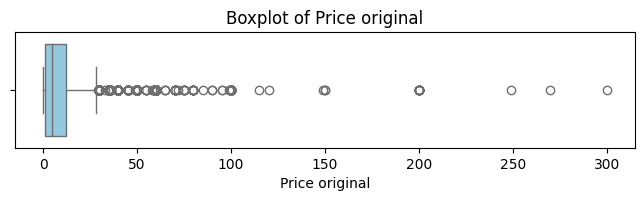

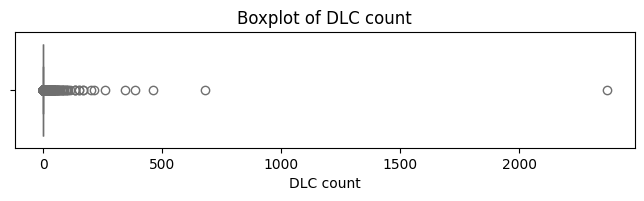

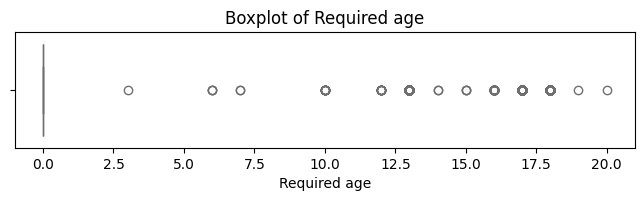

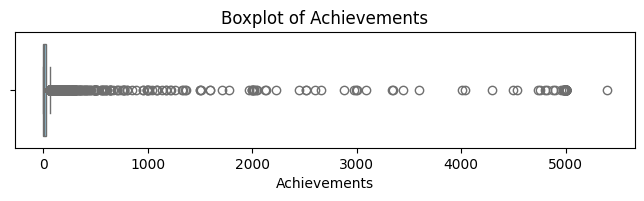

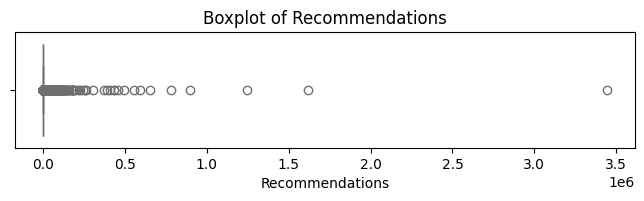

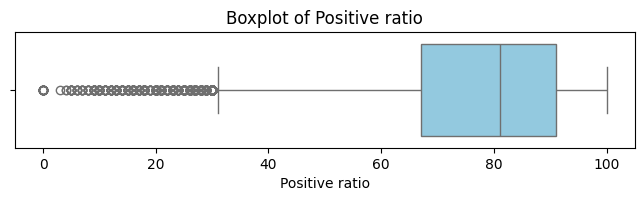

In [90]:
num_cols = train.select_dtypes(include=[np.number]).columns.tolist()
for col in num_cols:
    plt.figure(figsize=(8, 1.5))
    sns.boxplot(x=train[col], color="skyblue")
    plt.title(f"Boxplot of {col}")
    plt.show()

In [91]:
# Use IQR
for col in num_cols:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = train[(train[col] < lower_bound) | (train[col] > upper_bound)][col]
    print(f"{col}: {outliers.count()} outliers ({100 * outliers.count() / train.shape[0]:.2f}%)")

Price original: 1604 outliers (4.87%)
DLC count: 7212 outliers (21.90%)
Required age: 881 outliers (2.67%)
Achievements: 1788 outliers (5.43%)
Recommendations: 5178 outliers (15.72%)
Positive ratio: 761 outliers (2.31%)


#### Required age analysis

In [92]:
train['Required age'].sort_values(ascending=True).unique()

array([ 0,  3,  6,  7, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20],
      dtype=int64)

In [93]:
train['Required age'].value_counts()

Required age
0     32055
17      570
18      121
13      115
16       42
10       11
12        9
6         3
15        3
14        2
7         2
19        1
20        1
3         1
Name: count, dtype: int64

#### Price original analysis

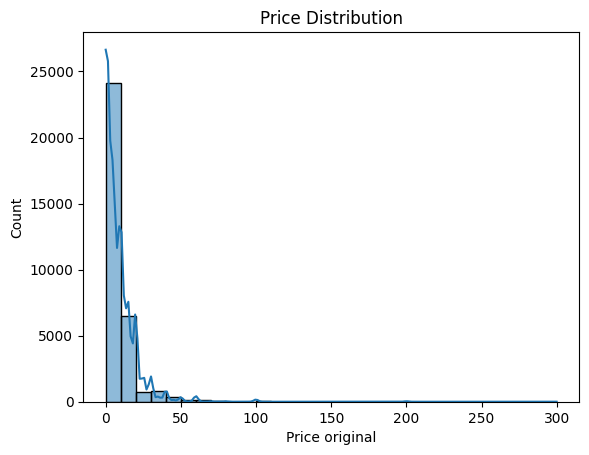

In [94]:
# Distribusi price dengan density plot
sns.histplot(train['Price original'].dropna(), kde=True, bins=30)
plt.title('Price Distribution')
plt.show()

In [95]:
print(train['Price original'].describe())

count    32936.000000
mean         8.677280
std         11.524861
min          0.000000
25%          0.990000
50%          4.990000
75%         11.990000
max        299.900000
Name: Price original, dtype: float64


In [96]:
Q1 = train['Price original'].quantile(0.25)
Q3 = train['Price original'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
train[(train['Price original'] < lower) | (train['Price original'] > upper)].sort_values(by='Price original', ascending=False).head(15)

,Release date,Price original,DLC count,Required age,Windows,Mac,Linux,Steam Deck,Supported languages,Full audio languages,Developers,Publishers,Movies,rating,Genres,Tags,Categories,Achievements,Recommendations,Positive ratio
2078,2013-11-12,299.90,0,0,True,False,False,True,English,NaN,Aartform,Aartform,http://cdn.akamai.steamstatic.com/steam/apps/2...,Mixed,Animation & Modeling,Animation & Modeling,Single-player,0,0,69
9157,2018-10-10,269.99,0,0,True,True,False,True,English,NaN,SideFX,SideFX,http://cdn.akamai.steamstatic.com/steam/apps/2...,Very Positive,"Animation & Modeling,Design & Illustration,Vid...","Animation & Modeling,Game Development,3D,Desig...","Partial Controller Support,Steam Cloud",0,124,94
38421,2022-11-01,249.00,0,0,True,False,False,True,"English,French,German,Spanish - Spain",NaN,MAGIX Software GmbH,MAGIX Software GmbH,http://cdn.akamai.steamstatic.com/steam/apps/2...,Mixed,Video Production,"Video Production,Software",NaN,0,0,66
39031,2022-09-19,199.99,0,0,True,False,False,True,English,NaN,"Atomic Fabrik,Cristian Manolachi","Atomic Fabrik,Cristian Manolachi",http://cdn.akamai.steamstatic.com/steam/apps/2...,Positive,"Adventure,Casual,Indie,Simulation,Sports",NaN,"Single-player,Partial Controller Support,Remot...",0,0,100
29896,2021-09-17,199.99,0,0,True,False,False,True,"English,Russian","English,Russian","AssetFlipGames,ALFINA GAMERS,rocketship","AssetFlipGames World Game Publishing,ALFINA WO...",http://cdn.akamai.steamstatic.com/steam/apps/2...,Mixed,"Action,Adventure,Indie","Action,Adventure,Indie,Violent,Story Rich,Atmo...","Single-player,Steam Achievements",5,0,64
40635,2023-02-21,199.99,0,0,True,True,True,True,"English,French,Italian,German,Spanish - Spain,...",NaN,Top-Down Games,Hede,http://cdn.akamai.steamstatic.com/steam/apps/2...,Mostly Positive,"Action,Adventure,Casual,Indie,Racing,RPG,Simul...",NaN,"Single-player,Steam Achievements,Steam Leaderb...",6,0,78
38589,2022-08-08,199.99,0,0,True,False,False,True,English,NaN,"Atomic Fabrik,Cristian Manolachi","Atomic Fabrik,Cristian Manolachi",http://cdn.akamai.steamstatic.com/steam/apps/2...,Positive,"Action,Indie,Racing,Simulation,Sports",NaN,Single-player,0,0,94
40400,2023-01-27,199.99,0,0,True,False,False,True,English,NaN,Hede,Hede,http://cdn.akamai.steamstatic.com/steam/apps/2...,Positive,"Action,Adventure,Casual,Indie,Racing,RPG,Simul...",NaN,"Single-player,Steam Achievements",6,0,100
41079,2023-05-23,199.99,0,0,True,True,True,True,"English,French,Italian,German,Spanish - Spain,...",NaN,PUZZLE Games,Hede,http://cdn.akamai.steamstatic.com/steam/apps/2...,Positive,"Action,Adventure,Casual,Indie,Racing,RPG,Simul...",NaN,"Single-player,Steam Achievements,Steam Leaderb...",6,0,100
33727,2021-09-09,199.99,0,0,True,False,False,True,"English,French,German,Spanish - Spain",NaN,MAGIX Software GmbH,MAGIX Software GmbH,http://cdn.akamai.steamstatic.com/steam/apps/2...,Mostly Positive,Video Production,"Video Production,Psychological Horror",NaN,0,0,75


#### DLC count analysis

In [97]:
# DLC Count
train['DLC count'].describe()

count    32936.000000
mean         0.797547
std         14.742599
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2366.000000
Name: DLC count, dtype: float64

In [98]:
df['DLC count'].value_counts()

DLC count
0      32109
1       5687
2       1428
3        567
4        322
       ...  
75         1
153        1
168        1
71         1
90         1
Name: count, Length: 91, dtype: int64

### 4c. Text Feature Exploration

In [99]:
# Parse and store unique tag
def parse_tags(tags):
    if pd.isna(tags):
        return []
    return [tag.strip() for tag in tags.split(',')]

# Print unique tags single
unique_tags = set()
for tags in train['Tags'].dropna():
    parsed_tags = parse_tags(tags)
    unique_tags.update(parsed_tags)

# Convert unique_tags to a sorted list and print in table format
unique_tags_list = sorted(unique_tags)
print("Unique Tags:")
for tag in unique_tags_list:
    print(tag)


Unique Tags:
1980s
1990's
2.5D
2D
2D Fighter
2D Platformer
360 Video
3D
3D Fighter
3D Platformer
3D Vision
4 Player Local
4X
6DOF
8-bit Music
ATV
Abstract
Action
Action RPG
Action RTS
Action Roguelike
Action-Adventure
Addictive
Adventure
Agriculture
Aliens
Alternate History
Ambient
America
Animation & Modeling
Anime
Arcade
Archery
Arena Shooter
Artificial Intelligence
Assassin
Asymmetric VR
Asynchronous Multiplayer
Atmospheric
Audio Production
Auto Battler
Automation
Automobile Sim
BMX
Base-Building
Baseball
Based On A Novel
Basketball
Battle Royale
Beat 'em up
Beautiful
Benchmark
Bikes
Blood
Board Game
Boss Rush
Bowling
Boxing
Building
Bullet Hell
Bullet Time
CRPG
Capitalism
Card Battler
Card Game
Cartoon
Cartoony
Casual
Cats
Character Action Game
Character Customization
Chess
Choices Matter
Choose Your Own Adventure
Cinematic
City Builder
Class-Based
Classic
Clicker
Co-op
Co-op Campaign
Coding
Cold War
Collectathon
Colony Sim
Colorful
Combat
Combat Racing
Comedy
Comic Book
Competitiv

In [100]:
# Unique genres
def parse_genres(genres):
    if pd.isna(genres):
        return []
    return [genre.strip() for genre in genres.split(',')]

# Print unique genres single
unique_genres = set()
for genres in train['Genres'].dropna():
    parsed_genres = parse_genres(genres)
    unique_genres.update(parsed_genres)

# Convert unique_genres to a sorted list and print in table format
unique_genres_list = sorted(unique_genres)
print("Unique Genres:")
for genre in unique_genres_list:
    print(genre)

Unique Genres:
Accounting
Action
Adventure
Animation & Modeling
Audio Production
Casual
Design & Illustration
Early Access
Education
Free to Play
Game Development
Gore
Indie
Massively Multiplayer
Nudity
Photo Editing
RPG
Racing
Sexual Content
Simulation
Software Training
Sports
Strategy
Utilities
Video Production
Violent
Web Publishing


In [101]:
# Unique categories
def parse_categories(categories):
    if pd.isna(categories):
        return []
    return [category.strip() for category in categories.split(',')]
# Print unique categories single
unique_categories = set()
for categories in train['Categories'].dropna():
    parsed_categories = parse_categories(categories)
    unique_categories.update(parsed_categories)
# Convert unique_categories to a sorted list and print in table format
unique_categories_list = sorted(unique_categories)
print("Unique Categories:")
for category in unique_categories_list:
    print(category)


Unique Categories:
Captions available
Co-op
Commentary available
Cross-Platform Multiplayer
Full controller support
HDR available
In-App Purchases
Includes Source SDK
Includes level editor
LAN Co-op
LAN PvP
MMO
Mods
Mods (require HL2)
Multi-player
Online Co-op
Online PvP
Partial Controller Support
PvP
Remote Play Together
Remote Play on Phone
Remote Play on TV
Remote Play on Tablet
Shared/Split Screen
Shared/Split Screen Co-op
Shared/Split Screen PvP
Single-player
Stats
Steam Achievements
Steam Cloud
Steam Leaderboards
Steam Trading Cards
Steam Turn Notifications
Steam Workshop
SteamVR Collectibles
Tracked Controller Support
VR Only
VR Support
VR Supported
Valve Anti-Cheat enabled


## 5. PREPROCESSING

### 5a. Missing Value Handling

In [102]:
# Drop rows
col_to_clean = ['Supported languages', 'Genres', 'Developers', 'Publishers', 'Categories']
train.dropna(subset=col_to_clean, inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32270 entries, 12016 to 15795
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Release date          32270 non-null  object 
 1   Price original        32270 non-null  float64
 2   DLC count             32270 non-null  int64  
 3   Required age          32270 non-null  int64  
 4   Windows               32270 non-null  bool   
 5   Mac                   32270 non-null  bool   
 6   Linux                 32270 non-null  bool   
 7   Steam Deck            32270 non-null  bool   
 8   Supported languages   32270 non-null  object 
 9   Full audio languages  15239 non-null  object 
 10  Developers            32270 non-null  object 
 11  Publishers            32270 non-null  object 
 12  Movies                30902 non-null  object 
 13  rating                32270 non-null  object 
 14  Genres                32270 non-null  object 
 15  Tags                

In [103]:
# Convert Full audio languages and Movies into 0 or 1 columns in train
train['Has full audio'] = train['Full audio languages'].notnull().map({True: 1, False: 0})
train.drop(columns=['Full audio languages'], inplace=True)

train['Has movie'] = train['Movies'].notnull().map({True: 1, False: 0})
train.drop(columns=['Movies'], inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32270 entries, 12016 to 15795
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Release date         32270 non-null  object 
 1   Price original       32270 non-null  float64
 2   DLC count            32270 non-null  int64  
 3   Required age         32270 non-null  int64  
 4   Windows              32270 non-null  bool   
 5   Mac                  32270 non-null  bool   
 6   Linux                32270 non-null  bool   
 7   Steam Deck           32270 non-null  bool   
 8   Supported languages  32270 non-null  object 
 9   Developers           32270 non-null  object 
 10  Publishers           32270 non-null  object 
 11  rating               32270 non-null  object 
 12  Genres               32270 non-null  object 
 13  Tags                 29378 non-null  object 
 14  Categories           32270 non-null  object 
 15  Achievements         32270 non-null  

### 5b. Noise Handling

#### Required Age Handling

In [104]:
def age_category(age):
    if age <= 12:
        return 'Everyone'
    elif 13 <= age <= 17:
        return 'Teen'
    else:
        return 'Adult'

train['Required age category'] = train['Required age'].apply(age_category)
train.drop(columns=['Required age'], inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32270 entries, 12016 to 15795
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Release date           32270 non-null  object 
 1   Price original         32270 non-null  float64
 2   DLC count              32270 non-null  int64  
 3   Windows                32270 non-null  bool   
 4   Mac                    32270 non-null  bool   
 5   Linux                  32270 non-null  bool   
 6   Steam Deck             32270 non-null  bool   
 7   Supported languages    32270 non-null  object 
 8   Developers             32270 non-null  object 
 9   Publishers             32270 non-null  object 
 10  rating                 32270 non-null  object 
 11  Genres                 32270 non-null  object 
 12  Tags                   29378 non-null  object 
 13  Categories             32270 non-null  object 
 14  Achievements           32270 non-null  int64  
 15  Rec

In [105]:
train['Required age category'].value_counts()

Required age category
Everyone    31425
Teen          725
Adult         120
Name: count, dtype: int64

In [106]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32270 entries, 12016 to 15795
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Release date           32270 non-null  object 
 1   Price original         32270 non-null  float64
 2   DLC count              32270 non-null  int64  
 3   Windows                32270 non-null  bool   
 4   Mac                    32270 non-null  bool   
 5   Linux                  32270 non-null  bool   
 6   Steam Deck             32270 non-null  bool   
 7   Supported languages    32270 non-null  object 
 8   Developers             32270 non-null  object 
 9   Publishers             32270 non-null  object 
 10  rating                 32270 non-null  object 
 11  Genres                 32270 non-null  object 
 12  Tags                   29378 non-null  object 
 13  Categories             32270 non-null  object 
 14  Achievements           32270 non-null  int64  
 15  Rec

#### Non Games data removal

In [107]:
# Remove rows where Genres or Tags indicate software
software_keywords = ['Animation & Modeling', 'Design & Illustration', 'Video Production', 'Photo Editing', 'Audio Production', 'Utilities', 'Web Publishing', 'Accounting', 'Game Development', 'Software Training']
mask = train['Genres'].str.contains('|'.join(software_keywords), na=False) | train['Tags'].str.contains('|'.join(software_keywords), na=False)
train_games_only = train[~mask].copy()
train_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31799 entries, 12016 to 15795
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Release date           31799 non-null  object 
 1   Price original         31799 non-null  float64
 2   DLC count              31799 non-null  int64  
 3   Windows                31799 non-null  bool   
 4   Mac                    31799 non-null  bool   
 5   Linux                  31799 non-null  bool   
 6   Steam Deck             31799 non-null  bool   
 7   Supported languages    31799 non-null  object 
 8   Developers             31799 non-null  object 
 9   Publishers             31799 non-null  object 
 10  rating                 31799 non-null  object 
 11  Genres                 31799 non-null  object 
 12  Tags                   28916 non-null  object 
 13  Categories             31799 non-null  object 
 14  Achievements           31799 non-null  int64  
 15  Rec

#### Price original Handling

In [108]:
# Remove price original outliers using IQR
Q1 = train_games_only['Price original'].quantile(0.25)
Q3 = train_games_only['Price original'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = train_games_only[(train_games_only['Price original'] < lower_bound) | (train_games_only['Price original'] > upper_bound)]
print(f"Outliers count: {outliers.shape[0]}")
# Remove outliers from train_games_only
train_games_only = train_games_only[~((train_games_only['Price original'] < lower_bound) | (train_games_only['Price original'] > upper_bound))]
train_games_only.info()

Outliers count: 1469
<class 'pandas.core.frame.DataFrame'>
Index: 30330 entries, 12016 to 15795
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Release date           30330 non-null  object 
 1   Price original         30330 non-null  float64
 2   DLC count              30330 non-null  int64  
 3   Windows                30330 non-null  bool   
 4   Mac                    30330 non-null  bool   
 5   Linux                  30330 non-null  bool   
 6   Steam Deck             30330 non-null  bool   
 7   Supported languages    30330 non-null  object 
 8   Developers             30330 non-null  object 
 9   Publishers             30330 non-null  object 
 10  rating                 30330 non-null  object 
 11  Genres                 30330 non-null  object 
 12  Tags                   27562 non-null  object 
 13  Categories             30330 non-null  object 
 14  Achievements           30330 non-n

### 5c. Feature Engineering

#### Make Has DLC column

In [109]:
# Binning DLC count into Has DLC
train_games_only['Has DLC'] = np.where(train_games_only['DLC count'] > 0, 1, 0)
train_games_only.drop(columns=['DLC count'], inplace=True)
train_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30330 entries, 12016 to 15795
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Release date           30330 non-null  object 
 1   Price original         30330 non-null  float64
 2   Windows                30330 non-null  bool   
 3   Mac                    30330 non-null  bool   
 4   Linux                  30330 non-null  bool   
 5   Steam Deck             30330 non-null  bool   
 6   Supported languages    30330 non-null  object 
 7   Developers             30330 non-null  object 
 8   Publishers             30330 non-null  object 
 9   rating                 30330 non-null  object 
 10  Genres                 30330 non-null  object 
 11  Tags                   27562 non-null  object 
 12  Categories             30330 non-null  object 
 13  Achievements           30330 non-null  int64  
 14  Recommendations        30330 non-null  int64  
 15  Pos

#### Make Release Year and Game Age columns

In [110]:
from datetime import datetime

# Convert to datetime (handle errors gracefully)
train_games_only['Release date'] = pd.to_datetime(train_games_only['Release date'], errors='coerce')

# Drop rows where date conversion failed (optional or handle as missing)
train_games_only = train_games_only.dropna(subset=['Release date'])

# Extract release year and game age
train_games_only['Release Year'] = train_games_only['Release date'].dt.year
train_games_only['Game Age'] = datetime.now().year - train_games_only['Release Year']

# Drop original release date column
train_games_only = train_games_only.drop(columns=['Release date'])


In [111]:
train_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30330 entries, 12016 to 15795
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Price original         30330 non-null  float64
 1   Windows                30330 non-null  bool   
 2   Mac                    30330 non-null  bool   
 3   Linux                  30330 non-null  bool   
 4   Steam Deck             30330 non-null  bool   
 5   Supported languages    30330 non-null  object 
 6   Developers             30330 non-null  object 
 7   Publishers             30330 non-null  object 
 8   rating                 30330 non-null  object 
 9   Genres                 30330 non-null  object 
 10  Tags                   27562 non-null  object 
 11  Categories             30330 non-null  object 
 12  Achievements           30330 non-null  int64  
 13  Recommendations        30330 non-null  int64  
 14  Positive ratio         30330 non-null  int64  
 15  Has

#### Create languages_count from supported languages

In [112]:
# Create a new column languages_count with the count of languages in Supported languages
train_games_only['languages_count'] = train_games_only['Supported languages'].apply(lambda x: len(x.split(',')) if pd.notnull(x) else 0)

# drop Supported languages column
train_games_only.drop(columns=['Supported languages'], inplace=True)
train_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30330 entries, 12016 to 15795
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Price original         30330 non-null  float64
 1   Windows                30330 non-null  bool   
 2   Mac                    30330 non-null  bool   
 3   Linux                  30330 non-null  bool   
 4   Steam Deck             30330 non-null  bool   
 5   Developers             30330 non-null  object 
 6   Publishers             30330 non-null  object 
 7   rating                 30330 non-null  object 
 8   Genres                 30330 non-null  object 
 9   Tags                   27562 non-null  object 
 10  Categories             30330 non-null  object 
 11  Achievements           30330 non-null  int64  
 12  Recommendations        30330 non-null  int64  
 13  Positive ratio         30330 non-null  int64  
 14  Has full audio         30330 non-null  int64  
 15  Has

### 5d. Encoding

#### Encode Platforms to binary

In [113]:
train_games_only['Mac'] = train_games_only['Mac'].astype(int)
train_games_only['Linux'] = train_games_only['Linux'].astype(int)
train_games_only['Windows'] = train_games_only['Windows'].astype(int)
train_games_only['Steam Deck'] = train_games_only['Steam Deck'].astype(int)

#### Filter 10k Developers and the rest into others

In [114]:
# Get top 10k developers by count, break ties with mean positive_ratio
dev_counts = train_games_only.groupby('Developers').agg(
    count=('Developers', 'count'),
    mean_positive_ratio=('Positive ratio', 'mean')
).reset_index()

dev_counts_sorted = dev_counts.sort_values(['count', 'mean_positive_ratio'], ascending=[False, False])
top_10k_developers = dev_counts_sorted.head(10000)['Developers'].tolist()

# Replace developers not in top 10k with 'Others'
train_games_only['Developers'] = train_games_only['Developers'].apply(lambda x: x if x in top_10k_developers else 'Others')

#### Filter 10k Publishers and the rest into others

In [115]:
pub_counts = train_games_only.groupby('Publishers').agg(
    count=('Publishers', 'count'),
    mean_positive_ratio=('Positive ratio', 'mean')
).reset_index()

pub_counts_sorted = pub_counts.sort_values(['count', 'mean_positive_ratio'], ascending=[False, False])
top_10k_publishers = pub_counts_sorted.head(10000)['Publishers'].tolist()

# Replace publishers not in top 10k with 'Others'
train_games_only['Publishers'] = train_games_only['Publishers'].apply(lambda x: x if x in top_10k_publishers else 'Others')
train_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30330 entries, 12016 to 15795
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Price original         30330 non-null  float64
 1   Windows                30330 non-null  int32  
 2   Mac                    30330 non-null  int32  
 3   Linux                  30330 non-null  int32  
 4   Steam Deck             30330 non-null  int32  
 5   Developers             30330 non-null  object 
 6   Publishers             30330 non-null  object 
 7   rating                 30330 non-null  object 
 8   Genres                 30330 non-null  object 
 9   Tags                   27562 non-null  object 
 10  Categories             30330 non-null  object 
 11  Achievements           30330 non-null  int64  
 12  Recommendations        30330 non-null  int64  
 13  Positive ratio         30330 non-null  int64  
 14  Has full audio         30330 non-null  int64  
 15  Has

#### Encode developer and publishers column

In [116]:
# Encode developer and publisher columns
from sklearn.preprocessing import LabelEncoder

developer_encoder = LabelEncoder()
train_games_only['Developers_code'] = developer_encoder.fit_transform(train_games_only['Developers'])

publisher_encoder = LabelEncoder()
train_games_only['Publishers_code'] = publisher_encoder.fit_transform(train_games_only['Publishers'])

# drop developers and publishers
train_games_only.drop(columns=['Developers', 'Publishers'], inplace=True)
train_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30330 entries, 12016 to 15795
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Price original         30330 non-null  float64
 1   Windows                30330 non-null  int32  
 2   Mac                    30330 non-null  int32  
 3   Linux                  30330 non-null  int32  
 4   Steam Deck             30330 non-null  int32  
 5   rating                 30330 non-null  object 
 6   Genres                 30330 non-null  object 
 7   Tags                   27562 non-null  object 
 8   Categories             30330 non-null  object 
 9   Achievements           30330 non-null  int64  
 10  Recommendations        30330 non-null  int64  
 11  Positive ratio         30330 non-null  int64  
 12  Has full audio         30330 non-null  int64  
 13  Has movie              30330 non-null  int64  
 14  Required age category  30330 non-null  object 
 15  Has

#### Encode required age category

In [117]:
# Encode Required age category
required_age_encoder = LabelEncoder()
train_games_only['Required age category_code'] = required_age_encoder.fit_transform(train_games_only['Required age category'])
# drop Required age category
train_games_only.drop(columns=['Required age category'], inplace=True)
train_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30330 entries, 12016 to 15795
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Price original              30330 non-null  float64
 1   Windows                     30330 non-null  int32  
 2   Mac                         30330 non-null  int32  
 3   Linux                       30330 non-null  int32  
 4   Steam Deck                  30330 non-null  int32  
 5   rating                      30330 non-null  object 
 6   Genres                      30330 non-null  object 
 7   Tags                        27562 non-null  object 
 8   Categories                  30330 non-null  object 
 9   Achievements                30330 non-null  int64  
 10  Recommendations             30330 non-null  int64  
 11  Positive ratio              30330 non-null  int64  
 12  Has full audio              30330 non-null  int64  
 13  Has movie                   3033

### 5e. Feature Selection

In [118]:
# Choose columns for model training
model_columns = [
    'Price original', 'Mac', 'Linux', 'Positive ratio',
    'Has full audio', 'Has movie', 'Has DLC', 'Release Year', 'Game Age',
    'languages_count', 'Developers_code', 'Publishers_code', 
]

# Select only the model columns
train_new = train_games_only[model_columns]
train_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30330 entries, 12016 to 15795
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Price original   30330 non-null  float64
 1   Mac              30330 non-null  int32  
 2   Linux            30330 non-null  int32  
 3   Positive ratio   30330 non-null  int64  
 4   Has full audio   30330 non-null  int64  
 5   Has movie        30330 non-null  int64  
 6   Has DLC          30330 non-null  int32  
 7   Release Year     30330 non-null  int32  
 8   Game Age         30330 non-null  int32  
 9   languages_count  30330 non-null  int64  
 10  Developers_code  30330 non-null  int32  
 11  Publishers_code  30330 non-null  int32  
dtypes: float64(1), int32(7), int64(4)
memory usage: 2.2 MB


## 6. PREPARE TEST DATA

In [119]:
# --- MISSING VALUES HANDLING IN TEST SET ---
# Drop rows with missing values in critical columns (same as train)
col_to_clean = ['Supported languages', 'Genres', 'Developers', 'Publishers', 'Categories']
test.dropna(subset=col_to_clean, inplace=True)

# Convert Full audio languages and Movies into 0 or 1 columns in test
test['Has full audio'] = test['Full audio languages'].notnull().map({True: 1, False: 0})
test.drop(columns=['Full audio languages'], inplace=True)

test['Has movie'] = test['Movies'].notnull().map({True: 1, False: 0})
test.drop(columns=['Movies'], inplace=True)

test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8093 entries, 29537 to 3315
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Release date         8093 non-null   object 
 1   Price original       8093 non-null   float64
 2   DLC count            8093 non-null   int64  
 3   Required age         8093 non-null   int64  
 4   Windows              8093 non-null   bool   
 5   Mac                  8093 non-null   bool   
 6   Linux                8093 non-null   bool   
 7   Steam Deck           8093 non-null   bool   
 8   Supported languages  8093 non-null   object 
 9   Developers           8093 non-null   object 
 10  Publishers           8093 non-null   object 
 11  rating               8093 non-null   object 
 12  Genres               8093 non-null   object 
 13  Tags                 7424 non-null   object 
 14  Categories           8093 non-null   object 
 15  Achievements         8093 non-null   in

In [120]:
# --- NOISE HANDLING IN TEST SET ---
# Remove rows where Genres or Tags indicate software (same keywords as train)
software_keywords = [
    'Animation & Modeling', 'Design & Illustration', 'Video Production', 'Photo Editing',
    'Audio Production', 'Utilities', 'Web Publishing', 'Accounting', 'Game Development', 'Software Training'
]
mask = test['Genres'].str.contains('|'.join(software_keywords), na=False) | test['Tags'].str.contains('|'.join(software_keywords), na=False)
test_games_only = test[~mask].copy()

# Remove price_original outliers using IQR (use test's own IQR)
Q1 = test_games_only['Price original'].quantile(0.25)
Q3 = test_games_only['Price original'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
test_games_only = test_games_only[(test_games_only['Price original'] >= lower_bound) & (test_games_only['Price original'] <= upper_bound)]

In [121]:
# --- FEATURE ENGINEERING IN TEST SET ---
from datetime import datetime

# Binning DLC count into Has DLC
test_games_only['Has DLC'] = np.where(test_games_only['DLC count'] > 0, 1, 0)
test_games_only.drop(columns=['DLC count'], inplace=True)

# Required age category
def age_category(age):
    if age <= 12:
        return 'Everyone'
    elif 13 <= age <= 17:
        return 'Teen'
    else:
        return 'Adult'

test_games_only['Required age category'] = test_games_only['Required age'].apply(age_category)
test_games_only.drop(columns=['Required age'], inplace=True)

# Release date to Release Year and Game Age
test_games_only['Release date'] = pd.to_datetime(test_games_only['Release date'], errors='coerce')
test_games_only = test_games_only.dropna(subset=['Release date'])
test_games_only['Release Year'] = test_games_only['Release date'].dt.year
test_games_only['Game Age'] = datetime.now().year - test_games_only['Release Year']
test_games_only = test_games_only.drop(columns=['Release date'])

# Languages count
test_games_only['languages_count'] = test_games_only['Supported languages'].apply(lambda x: len(x.split(',')) if pd.notnull(x) else 0)
test_games_only.drop(columns=['Supported languages'], inplace=True)

In [122]:
# --- ENCODING IN TEST SET ---
# Convert platform columns to int
test_games_only['Mac'] = test_games_only['Mac'].astype(int)
test_games_only['Linux'] = test_games_only['Linux'].astype(int)
test_games_only['Windows'] = test_games_only['Windows'].astype(int)
test_games_only['Steam Deck'] = test_games_only['Steam Deck'].astype(int)

# Replace developers and publishers not in top 10k with 'Others'
test_games_only['Developers'] = test_games_only['Developers'].apply(lambda x: x if x in top_10k_developers else 'Others')
test_games_only['Publishers'] = test_games_only['Publishers'].apply(lambda x: x if x in top_10k_publishers else 'Others')

# Encode developer and publisher columns using encoders fitted on train
test_games_only['Developers_code'] = developer_encoder.transform(test_games_only['Developers'])
test_games_only['Publishers_code'] = publisher_encoder.transform(test_games_only['Publishers'])
test_games_only.drop(columns=['Developers', 'Publishers'], inplace=True)

# Encode Required age category
test_games_only['Required age category_code'] = required_age_encoder.transform(test_games_only['Required age category'])
test_games_only.drop(columns=['Required age category'], inplace=True)

In [123]:
test_new = test_games_only[model_columns]

## 7. MODELING

In [124]:
# Define X_train as train_new drop positive ratio and y_train as positive ratio
X_train = train_new.drop(columns=['Positive ratio'])
y_train = train_new['Positive ratio']

In [125]:
# Define X_test as train_new drop positive ratio and y_test as positive ratio
X_test = test_new.drop(columns=['Positive ratio'])
y_test = test_new['Positive ratio']

### MODEL: DecisionTreeRegressor

In [126]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Evaluate the model on the training set
train_score = model.score(X_train, y_train)

# Print model R^2 score and rmse
print(f"Model R^2 score: {train_score:.4f}")

# Calculate RMSE
from sklearn.metrics import mean_squared_error
y_train_pred = model.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

print(f"RMSE: {rmse:.4f}")

Model R^2 score: 0.8881
RMSE: 6.0510


In [127]:
score_test = model.score(X_test, y_test)

print(f"Test R^2 score: {score_test:.4f}")

# Calculate RMSE on test set
y_test_pred = model.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"Test RMSE: {rmse_test:.4f}")

Test R^2 score: -0.6260
Test RMSE: 22.8835


In [128]:
def classify_score(score):
	if score >= 80:
		return 'positive'
	elif score >= 70:
		return 'positive'
	elif score >= 40:
		return 'mixed'
	elif score >= 20:
		return 'negative'
	else:
		return 'negative'

In [129]:
from sklearn.metrics import classification_report

y_test_labels = [classify_score(score) for score in y_test]

y_pred_labels = [classify_score(score) for score in y_test_pred]

# target_names = ['positive', 'mostly positive', 'mixed', 'mostly negative', 'negative']
target_names = ['positive', 'mixed', 'negative']
report = classification_report(y_test_labels, y_pred_labels, labels=target_names)

print("--- Classification Report ---")
print(report)

--- Classification Report ---
              precision    recall  f1-score   support

    positive       0.78      0.56      0.65      5565
       mixed       0.29      0.53      0.37      1870
    negative       0.10      0.10      0.10       310

    accuracy                           0.53      7745
   macro avg       0.39      0.40      0.38      7745
weighted avg       0.63      0.53      0.56      7745



# ATTEMPT 3

### DEPENDENCIES

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 1. READ DATA

In [131]:
df = pd.read_csv('data/merged_steam_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41170 entries, 0 to 41169
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   App ID                      41170 non-null  int64  
 1   Name                        41170 non-null  object 
 2   Required age                41170 non-null  int64  
 3   DLC count                   41170 non-null  int64  
 4   Detailed description        41123 non-null  object 
 5   About the game              41113 non-null  object 
 6   Short description           41156 non-null  object 
 7   Reviews                     7920 non-null   object 
 8   Windows                     41170 non-null  bool   
 9   Mac                         41170 non-null  bool   
 10  Linux                       41170 non-null  bool   
 11  Metacritic score            41170 non-null  int64  
 12  Achievements                41170 non-null  int64  
 13  Recommendations             411

## 2. SELECT COLUMNS

In [132]:
selected_columns = [
    'Release date', 'Price original', 'DLC count', 'Required age', 'Windows', 'Mac', 'Linux', 'Steam Deck',
    'Supported languages', 'Full audio languages', 'Developers', 'Publishers',
    'Movies', 'rating', 'Positive ratio', 'Genres', 'Tags', 'Categories', 'Achievements', 'Recommendations'
]

df_filtered = df[selected_columns]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41170 entries, 0 to 41169
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Release date          41170 non-null  object 
 1   Price original        41170 non-null  float64
 2   DLC count             41170 non-null  int64  
 3   Required age          41170 non-null  int64  
 4   Windows               41170 non-null  bool   
 5   Mac                   41170 non-null  bool   
 6   Linux                 41170 non-null  bool   
 7   Steam Deck            41170 non-null  bool   
 8   Supported languages   41157 non-null  object 
 9   Full audio languages  19288 non-null  object 
 10  Developers            41096 non-null  object 
 11  Publishers            40949 non-null  object 
 12  Movies                39366 non-null  object 
 13  rating                41170 non-null  object 
 14  Positive ratio        41170 non-null  int64  
 15  Genres             

## 3. SPLIT DATA

In [133]:
from sklearn.model_selection import train_test_split

# Split the data into features and target variable
X = df_filtered.drop(columns=['Positive ratio'])
y = df_filtered['Positive ratio']

# Split the data into training and testing sets 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Concat X_train and y_train for visualization
train = pd.concat([X_train, y_train], axis=1)
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32936 entries, 12016 to 15795
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Release date          32936 non-null  object 
 1   Price original        32936 non-null  float64
 2   DLC count             32936 non-null  int64  
 3   Required age          32936 non-null  int64  
 4   Windows               32936 non-null  bool   
 5   Mac                   32936 non-null  bool   
 6   Linux                 32936 non-null  bool   
 7   Steam Deck            32936 non-null  bool   
 8   Supported languages   32925 non-null  object 
 9   Full audio languages  15437 non-null  object 
 10  Developers            32870 non-null  object 
 11  Publishers            32747 non-null  object 
 12  Movies                31502 non-null  object 
 13  rating                32936 non-null  object 
 14  Genres                32901 non-null  object 
 15  Tags                

In [134]:
# Concat X_test and y_test for visualization
test = pd.concat([X_test, y_test], axis=1)
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8234 entries, 34621 to 3315
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Release date          8234 non-null   object 
 1   Price original        8234 non-null   float64
 2   DLC count             8234 non-null   int64  
 3   Required age          8234 non-null   int64  
 4   Windows               8234 non-null   bool   
 5   Mac                   8234 non-null   bool   
 6   Linux                 8234 non-null   bool   
 7   Steam Deck            8234 non-null   bool   
 8   Supported languages   8232 non-null   object 
 9   Full audio languages  3851 non-null   object 
 10  Developers            8226 non-null   object 
 11  Publishers            8202 non-null   object 
 12  Movies                7864 non-null   object 
 13  rating                8234 non-null   object 
 14  Genres                8225 non-null   object 
 15  Tags                  

## 4. EDA

In [135]:
# Get missing value amount and percentage for each column and sort Descending
missing_values = train.isna().sum()
missing_values = missing_values[missing_values > 0]
missing_values = pd.DataFrame(missing_values)
missing_values.columns = ['Missing Values']
missing_values['Percentage'] = (missing_values['Missing Values'] / train.shape[0]) * 100
missing_values = missing_values.sort_values(by='Missing Values', ascending=False)
missing_values

,Missing Values,Percentage
Full audio languages,17499,53.130313
Tags,3003,9.117683
Movies,1434,4.353898
Categories,427,1.296454
Publishers,189,0.573840
Developers,66,0.200389
Genres,35,0.106267
Supported languages,11,0.033398


In [136]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32936 entries, 12016 to 15795
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Release date          32936 non-null  object 
 1   Price original        32936 non-null  float64
 2   DLC count             32936 non-null  int64  
 3   Required age          32936 non-null  int64  
 4   Windows               32936 non-null  bool   
 5   Mac                   32936 non-null  bool   
 6   Linux                 32936 non-null  bool   
 7   Steam Deck            32936 non-null  bool   
 8   Supported languages   32925 non-null  object 
 9   Full audio languages  15437 non-null  object 
 10  Developers            32870 non-null  object 
 11  Publishers            32747 non-null  object 
 12  Movies                31502 non-null  object 
 13  rating                32936 non-null  object 
 14  Genres                32901 non-null  object 
 15  Tags                

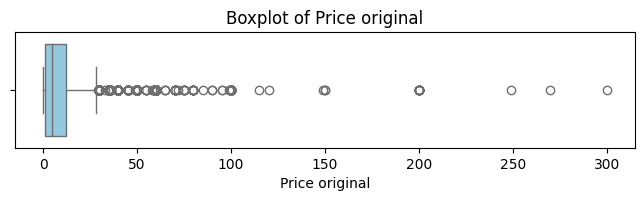

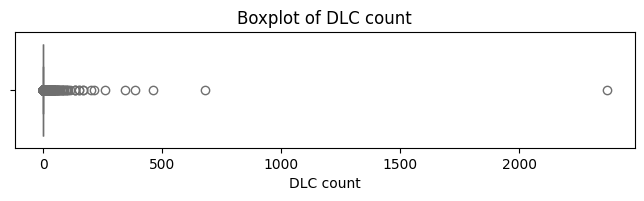

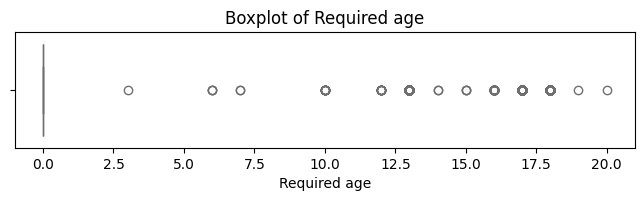

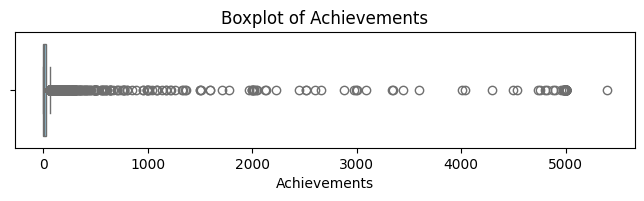

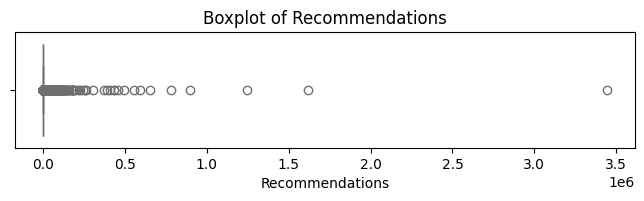

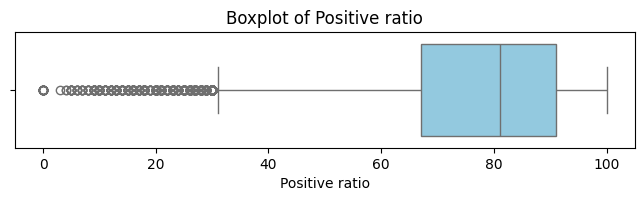

In [137]:
num_cols = train.select_dtypes(include=[np.number]).columns.tolist()
for col in num_cols:
    plt.figure(figsize=(8, 1.5))
    sns.boxplot(x=train[col], color="skyblue")
    plt.title(f"Boxplot of {col}")
    plt.show()

In [138]:
# Use IQR
for col in num_cols:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = train[(train[col] < lower_bound) | (train[col] > upper_bound)][col]
    print(f"{col}: {outliers.count()} outliers ({100 * outliers.count() / train.shape[0]:.2f}%)")

Price original: 1604 outliers (4.87%)
DLC count: 7212 outliers (21.90%)
Required age: 881 outliers (2.67%)
Achievements: 1788 outliers (5.43%)
Recommendations: 5178 outliers (15.72%)
Positive ratio: 761 outliers (2.31%)


#### EXPLORATION/ANALYSIS

In [139]:
train['Required age'].sort_values(ascending=True).unique()

array([ 0,  3,  6,  7, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20],
      dtype=int64)

In [140]:
train['Required age'].value_counts()

Required age
0     32055
17      570
18      121
13      115
16       42
10       11
12        9
6         3
15        3
14        2
7         2
19        1
20        1
3         1
Name: count, dtype: int64

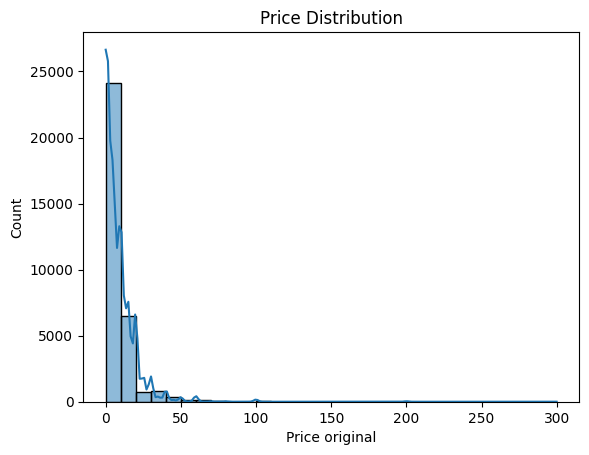

In [141]:
# Distribusi price dengan density plot
sns.histplot(train['Price original'].dropna(), kde=True, bins=30)
plt.title('Price Distribution')
plt.show()

In [142]:
print(train['Price original'].describe())

count    32936.000000
mean         8.677280
std         11.524861
min          0.000000
25%          0.990000
50%          4.990000
75%         11.990000
max        299.900000
Name: Price original, dtype: float64


In [143]:
Q1 = train['Price original'].quantile(0.25)
Q3 = train['Price original'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
train[(train['Price original'] < lower) | (train['Price original'] > upper)].sort_values(by='Price original', ascending=False).head(15)

,Release date,Price original,DLC count,Required age,Windows,Mac,Linux,Steam Deck,Supported languages,Full audio languages,Developers,Publishers,Movies,rating,Genres,Tags,Categories,Achievements,Recommendations,Positive ratio
2078,2013-11-12,299.90,0,0,True,False,False,True,English,NaN,Aartform,Aartform,http://cdn.akamai.steamstatic.com/steam/apps/2...,Mixed,Animation & Modeling,Animation & Modeling,Single-player,0,0,69
9157,2018-10-10,269.99,0,0,True,True,False,True,English,NaN,SideFX,SideFX,http://cdn.akamai.steamstatic.com/steam/apps/2...,Very Positive,"Animation & Modeling,Design & Illustration,Vid...","Animation & Modeling,Game Development,3D,Desig...","Partial Controller Support,Steam Cloud",0,124,94
38421,2022-11-01,249.00,0,0,True,False,False,True,"English,French,German,Spanish - Spain",NaN,MAGIX Software GmbH,MAGIX Software GmbH,http://cdn.akamai.steamstatic.com/steam/apps/2...,Mixed,Video Production,"Video Production,Software",NaN,0,0,66
39031,2022-09-19,199.99,0,0,True,False,False,True,English,NaN,"Atomic Fabrik,Cristian Manolachi","Atomic Fabrik,Cristian Manolachi",http://cdn.akamai.steamstatic.com/steam/apps/2...,Positive,"Adventure,Casual,Indie,Simulation,Sports",NaN,"Single-player,Partial Controller Support,Remot...",0,0,100
29896,2021-09-17,199.99,0,0,True,False,False,True,"English,Russian","English,Russian","AssetFlipGames,ALFINA GAMERS,rocketship","AssetFlipGames World Game Publishing,ALFINA WO...",http://cdn.akamai.steamstatic.com/steam/apps/2...,Mixed,"Action,Adventure,Indie","Action,Adventure,Indie,Violent,Story Rich,Atmo...","Single-player,Steam Achievements",5,0,64
40635,2023-02-21,199.99,0,0,True,True,True,True,"English,French,Italian,German,Spanish - Spain,...",NaN,Top-Down Games,Hede,http://cdn.akamai.steamstatic.com/steam/apps/2...,Mostly Positive,"Action,Adventure,Casual,Indie,Racing,RPG,Simul...",NaN,"Single-player,Steam Achievements,Steam Leaderb...",6,0,78
38589,2022-08-08,199.99,0,0,True,False,False,True,English,NaN,"Atomic Fabrik,Cristian Manolachi","Atomic Fabrik,Cristian Manolachi",http://cdn.akamai.steamstatic.com/steam/apps/2...,Positive,"Action,Indie,Racing,Simulation,Sports",NaN,Single-player,0,0,94
40400,2023-01-27,199.99,0,0,True,False,False,True,English,NaN,Hede,Hede,http://cdn.akamai.steamstatic.com/steam/apps/2...,Positive,"Action,Adventure,Casual,Indie,Racing,RPG,Simul...",NaN,"Single-player,Steam Achievements",6,0,100
41079,2023-05-23,199.99,0,0,True,True,True,True,"English,French,Italian,German,Spanish - Spain,...",NaN,PUZZLE Games,Hede,http://cdn.akamai.steamstatic.com/steam/apps/2...,Positive,"Action,Adventure,Casual,Indie,Racing,RPG,Simul...",NaN,"Single-player,Steam Achievements,Steam Leaderb...",6,0,100
33727,2021-09-09,199.99,0,0,True,False,False,True,"English,French,German,Spanish - Spain",NaN,MAGIX Software GmbH,MAGIX Software GmbH,http://cdn.akamai.steamstatic.com/steam/apps/2...,Mostly Positive,Video Production,"Video Production,Psychological Horror",NaN,0,0,75


In [144]:
# Parse and store unique tag
def parse_tags(tags):
    if pd.isna(tags):
        return []
    return [tag.strip() for tag in tags.split(',')]

# Print unique tags single
unique_tags = set()
for tags in train['Tags'].dropna():
    parsed_tags = parse_tags(tags)
    unique_tags.update(parsed_tags)

# Convert unique_tags to a sorted list and print in table format
unique_tags_list = sorted(unique_tags)
print("Unique Tags:")
for tag in unique_tags_list:
    print(tag)


Unique Tags:
1980s
1990's
2.5D
2D
2D Fighter
2D Platformer
360 Video
3D
3D Fighter
3D Platformer
3D Vision
4 Player Local
4X
6DOF
8-bit Music
ATV
Abstract
Action
Action RPG
Action RTS
Action Roguelike
Action-Adventure
Addictive
Adventure
Agriculture
Aliens
Alternate History
Ambient
America
Animation & Modeling
Anime
Arcade
Archery
Arena Shooter
Artificial Intelligence
Assassin
Asymmetric VR
Asynchronous Multiplayer
Atmospheric
Audio Production
Auto Battler
Automation
Automobile Sim
BMX
Base-Building
Baseball
Based On A Novel
Basketball
Battle Royale
Beat 'em up
Beautiful
Benchmark
Bikes
Blood
Board Game
Boss Rush
Bowling
Boxing
Building
Bullet Hell
Bullet Time
CRPG
Capitalism
Card Battler
Card Game
Cartoon
Cartoony
Casual
Cats
Character Action Game
Character Customization
Chess
Choices Matter
Choose Your Own Adventure
Cinematic
City Builder
Class-Based
Classic
Clicker
Co-op
Co-op Campaign
Coding
Cold War
Collectathon
Colony Sim
Colorful
Combat
Combat Racing
Comedy
Comic Book
Competitiv

In [145]:
# Unique genres
def parse_genres(genres):
    if pd.isna(genres):
        return []
    return [genre.strip() for genre in genres.split(',')]

# Print unique genres single
unique_genres = set()
for genres in train['Genres'].dropna():
    parsed_genres = parse_genres(genres)
    unique_genres.update(parsed_genres)

# Convert unique_genres to a sorted list and print in table format
unique_genres_list = sorted(unique_genres)
print("Unique Genres:")
for genre in unique_genres_list:
    print(genre)

Unique Genres:
Accounting
Action
Adventure
Animation & Modeling
Audio Production
Casual
Design & Illustration
Early Access
Education
Free to Play
Game Development
Gore
Indie
Massively Multiplayer
Nudity
Photo Editing
RPG
Racing
Sexual Content
Simulation
Software Training
Sports
Strategy
Utilities
Video Production
Violent
Web Publishing


In [146]:
# Unique categories
def parse_categories(categories):
    if pd.isna(categories):
        return []
    return [category.strip() for category in categories.split(',')]
# Print unique categories single
unique_categories = set()
for categories in train['Categories'].dropna():
    parsed_categories = parse_categories(categories)
    unique_categories.update(parsed_categories)
# Convert unique_categories to a sorted list and print in table format
unique_categories_list = sorted(unique_categories)
print("Unique Categories:")
for category in unique_categories_list:
    print(category)


Unique Categories:
Captions available
Co-op
Commentary available
Cross-Platform Multiplayer
Full controller support
HDR available
In-App Purchases
Includes Source SDK
Includes level editor
LAN Co-op
LAN PvP
MMO
Mods
Mods (require HL2)
Multi-player
Online Co-op
Online PvP
Partial Controller Support
PvP
Remote Play Together
Remote Play on Phone
Remote Play on TV
Remote Play on Tablet
Shared/Split Screen
Shared/Split Screen Co-op
Shared/Split Screen PvP
Single-player
Stats
Steam Achievements
Steam Cloud
Steam Leaderboards
Steam Trading Cards
Steam Turn Notifications
Steam Workshop
SteamVR Collectibles
Tracked Controller Support
VR Only
VR Support
VR Supported
Valve Anti-Cheat enabled


In [147]:
# DLC Count
train['DLC count'].describe()

count    32936.000000
mean         0.797547
std         14.742599
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2366.000000
Name: DLC count, dtype: float64

In [148]:
df['DLC count'].value_counts()

DLC count
0      32109
1       5687
2       1428
3        567
4        322
       ...  
75         1
153        1
168        1
71         1
90         1
Name: count, Length: 91, dtype: int64

## 5. PREPROCESSING

### 5a. Missing Values Handling

In [149]:
# Drop rows
col_to_clean = ['Supported languages', 'Genres', 'Developers', 'Publishers', 'Categories']
train.dropna(subset=col_to_clean, inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32270 entries, 12016 to 15795
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Release date          32270 non-null  object 
 1   Price original        32270 non-null  float64
 2   DLC count             32270 non-null  int64  
 3   Required age          32270 non-null  int64  
 4   Windows               32270 non-null  bool   
 5   Mac                   32270 non-null  bool   
 6   Linux                 32270 non-null  bool   
 7   Steam Deck            32270 non-null  bool   
 8   Supported languages   32270 non-null  object 
 9   Full audio languages  15239 non-null  object 
 10  Developers            32270 non-null  object 
 11  Publishers            32270 non-null  object 
 12  Movies                30902 non-null  object 
 13  rating                32270 non-null  object 
 14  Genres                32270 non-null  object 
 15  Tags                

In [150]:
# Convert Full audio languages and Movies into 0 or 1 columns in train
train['Has full audio'] = train['Full audio languages'].notnull().map({True: 1, False: 0})
train.drop(columns=['Full audio languages'], inplace=True)

train['Has movie'] = train['Movies'].notnull().map({True: 1, False: 0})
train.drop(columns=['Movies'], inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32270 entries, 12016 to 15795
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Release date         32270 non-null  object 
 1   Price original       32270 non-null  float64
 2   DLC count            32270 non-null  int64  
 3   Required age         32270 non-null  int64  
 4   Windows              32270 non-null  bool   
 5   Mac                  32270 non-null  bool   
 6   Linux                32270 non-null  bool   
 7   Steam Deck           32270 non-null  bool   
 8   Supported languages  32270 non-null  object 
 9   Developers           32270 non-null  object 
 10  Publishers           32270 non-null  object 
 11  rating               32270 non-null  object 
 12  Genres               32270 non-null  object 
 13  Tags                 29378 non-null  object 
 14  Categories           32270 non-null  object 
 15  Achievements         32270 non-null  

### 5b. Noise Handling

In [151]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32270 entries, 12016 to 15795
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Release date         32270 non-null  object 
 1   Price original       32270 non-null  float64
 2   DLC count            32270 non-null  int64  
 3   Required age         32270 non-null  int64  
 4   Windows              32270 non-null  bool   
 5   Mac                  32270 non-null  bool   
 6   Linux                32270 non-null  bool   
 7   Steam Deck           32270 non-null  bool   
 8   Supported languages  32270 non-null  object 
 9   Developers           32270 non-null  object 
 10  Publishers           32270 non-null  object 
 11  rating               32270 non-null  object 
 12  Genres               32270 non-null  object 
 13  Tags                 29378 non-null  object 
 14  Categories           32270 non-null  object 
 15  Achievements         32270 non-null  

In [152]:
def age_category(age):
    if age <= 12:
        return 'Everyone'
    elif 13 <= age <= 17:
        return 'Teen'
    else:
        return 'Adult'

train['Required age category'] = train['Required age'].apply(age_category)
train.drop(columns=['Required age'], inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32270 entries, 12016 to 15795
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Release date           32270 non-null  object 
 1   Price original         32270 non-null  float64
 2   DLC count              32270 non-null  int64  
 3   Windows                32270 non-null  bool   
 4   Mac                    32270 non-null  bool   
 5   Linux                  32270 non-null  bool   
 6   Steam Deck             32270 non-null  bool   
 7   Supported languages    32270 non-null  object 
 8   Developers             32270 non-null  object 
 9   Publishers             32270 non-null  object 
 10  rating                 32270 non-null  object 
 11  Genres                 32270 non-null  object 
 12  Tags                   29378 non-null  object 
 13  Categories             32270 non-null  object 
 14  Achievements           32270 non-null  int64  
 15  Rec

In [153]:
train['Required age category'].value_counts()

Required age category
Everyone    31425
Teen          725
Adult         120
Name: count, dtype: int64

In [154]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32270 entries, 12016 to 15795
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Release date           32270 non-null  object 
 1   Price original         32270 non-null  float64
 2   DLC count              32270 non-null  int64  
 3   Windows                32270 non-null  bool   
 4   Mac                    32270 non-null  bool   
 5   Linux                  32270 non-null  bool   
 6   Steam Deck             32270 non-null  bool   
 7   Supported languages    32270 non-null  object 
 8   Developers             32270 non-null  object 
 9   Publishers             32270 non-null  object 
 10  rating                 32270 non-null  object 
 11  Genres                 32270 non-null  object 
 12  Tags                   29378 non-null  object 
 13  Categories             32270 non-null  object 
 14  Achievements           32270 non-null  int64  
 15  Rec

In [155]:
# Remove rows where Genres or Tags indicate software
software_keywords = ['Animation & Modeling', 'Design & Illustration', 'Video Production', 'Photo Editing', 'Audio Production', 'Utilities', 'Web Publishing', 'Accounting', 'Game Development', 'Software Training']
mask = train['Genres'].str.contains('|'.join(software_keywords), na=False) | train['Tags'].str.contains('|'.join(software_keywords), na=False)
train_games_only = train[~mask].copy()
train_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31799 entries, 12016 to 15795
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Release date           31799 non-null  object 
 1   Price original         31799 non-null  float64
 2   DLC count              31799 non-null  int64  
 3   Windows                31799 non-null  bool   
 4   Mac                    31799 non-null  bool   
 5   Linux                  31799 non-null  bool   
 6   Steam Deck             31799 non-null  bool   
 7   Supported languages    31799 non-null  object 
 8   Developers             31799 non-null  object 
 9   Publishers             31799 non-null  object 
 10  rating                 31799 non-null  object 
 11  Genres                 31799 non-null  object 
 12  Tags                   28916 non-null  object 
 13  Categories             31799 non-null  object 
 14  Achievements           31799 non-null  int64  
 15  Rec

In [156]:
# Remove price original outliers using IQR
Q1 = train_games_only['Price original'].quantile(0.25)
Q3 = train_games_only['Price original'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = train_games_only[(train_games_only['Price original'] < lower_bound) | (train_games_only['Price original'] > upper_bound)]
print(f"Outliers count: {outliers.shape[0]}")
# Remove outliers from train_games_only
train_games_only = train_games_only[~((train_games_only['Price original'] < lower_bound) | (train_games_only['Price original'] > upper_bound))]
train_games_only.info()

Outliers count: 1469
<class 'pandas.core.frame.DataFrame'>
Index: 30330 entries, 12016 to 15795
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Release date           30330 non-null  object 
 1   Price original         30330 non-null  float64
 2   DLC count              30330 non-null  int64  
 3   Windows                30330 non-null  bool   
 4   Mac                    30330 non-null  bool   
 5   Linux                  30330 non-null  bool   
 6   Steam Deck             30330 non-null  bool   
 7   Supported languages    30330 non-null  object 
 8   Developers             30330 non-null  object 
 9   Publishers             30330 non-null  object 
 10  rating                 30330 non-null  object 
 11  Genres                 30330 non-null  object 
 12  Tags                   27562 non-null  object 
 13  Categories             30330 non-null  object 
 14  Achievements           30330 non-n

In [157]:
# Binning DLC count into Has DLC
train_games_only['Has DLC'] = np.where(train_games_only['DLC count'] > 0, 1, 0)
train_games_only.drop(columns=['DLC count'], inplace=True)
train_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30330 entries, 12016 to 15795
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Release date           30330 non-null  object 
 1   Price original         30330 non-null  float64
 2   Windows                30330 non-null  bool   
 3   Mac                    30330 non-null  bool   
 4   Linux                  30330 non-null  bool   
 5   Steam Deck             30330 non-null  bool   
 6   Supported languages    30330 non-null  object 
 7   Developers             30330 non-null  object 
 8   Publishers             30330 non-null  object 
 9   rating                 30330 non-null  object 
 10  Genres                 30330 non-null  object 
 11  Tags                   27562 non-null  object 
 12  Categories             30330 non-null  object 
 13  Achievements           30330 non-null  int64  
 14  Recommendations        30330 non-null  int64  
 15  Pos

### 5c. Feature Engineering

In [158]:
from datetime import datetime

# Convert to datetime (handle errors gracefully)
train_games_only['Release date'] = pd.to_datetime(train_games_only['Release date'], errors='coerce')

# Drop rows where date conversion failed (optional or handle as missing)
train_games_only = train_games_only.dropna(subset=['Release date'])

# Extract release year and game age
train_games_only['Release Year'] = train_games_only['Release date'].dt.year
train_games_only['Game Age'] = datetime.now().year - train_games_only['Release Year']

# Drop original release date column
train_games_only = train_games_only.drop(columns=['Release date'])


In [159]:
train_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30330 entries, 12016 to 15795
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Price original         30330 non-null  float64
 1   Windows                30330 non-null  bool   
 2   Mac                    30330 non-null  bool   
 3   Linux                  30330 non-null  bool   
 4   Steam Deck             30330 non-null  bool   
 5   Supported languages    30330 non-null  object 
 6   Developers             30330 non-null  object 
 7   Publishers             30330 non-null  object 
 8   rating                 30330 non-null  object 
 9   Genres                 30330 non-null  object 
 10  Tags                   27562 non-null  object 
 11  Categories             30330 non-null  object 
 12  Achievements           30330 non-null  int64  
 13  Recommendations        30330 non-null  int64  
 14  Positive ratio         30330 non-null  int64  
 15  Has

In [160]:
# Create a new column languages_count with the count of languages in Supported languages
train_games_only['languages_count'] = train_games_only['Supported languages'].apply(lambda x: len(x.split(',')) if pd.notnull(x) else 0)

# drop Supported languages column
train_games_only.drop(columns=['Supported languages'], inplace=True)
train_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30330 entries, 12016 to 15795
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Price original         30330 non-null  float64
 1   Windows                30330 non-null  bool   
 2   Mac                    30330 non-null  bool   
 3   Linux                  30330 non-null  bool   
 4   Steam Deck             30330 non-null  bool   
 5   Developers             30330 non-null  object 
 6   Publishers             30330 non-null  object 
 7   rating                 30330 non-null  object 
 8   Genres                 30330 non-null  object 
 9   Tags                   27562 non-null  object 
 10  Categories             30330 non-null  object 
 11  Achievements           30330 non-null  int64  
 12  Recommendations        30330 non-null  int64  
 13  Positive ratio         30330 non-null  int64  
 14  Has full audio         30330 non-null  int64  
 15  Has

### 5d. Encoding

In [161]:
train_games_only['Mac'] = train_games_only['Mac'].astype(int)
train_games_only['Linux'] = train_games_only['Linux'].astype(int)
train_games_only['Windows'] = train_games_only['Windows'].astype(int)
train_games_only['Steam Deck'] = train_games_only['Steam Deck'].astype(int)

In [162]:
# Get top 10k developers by count, break ties with mean positive_ratio
dev_counts = train_games_only.groupby('Developers').agg(
    count=('Developers', 'count'),
    mean_positive_ratio=('Positive ratio', 'mean')
).reset_index()

dev_counts_sorted = dev_counts.sort_values(['count', 'mean_positive_ratio'], ascending=[False, False])
top_10k_developers = dev_counts_sorted.head(10000)['Developers'].tolist()

# Replace developers not in top 10k with 'Others'
train_games_only['Developers'] = train_games_only['Developers'].apply(lambda x: x if x in top_10k_developers else 'Others')

# Repeat for publishers
pub_counts = train_games_only.groupby('Publishers').agg(
    count=('Publishers', 'count'),
    mean_positive_ratio=('Positive ratio', 'mean')
).reset_index()

pub_counts_sorted = pub_counts.sort_values(['count', 'mean_positive_ratio'], ascending=[False, False])
top_10k_publishers = pub_counts_sorted.head(10000)['Publishers'].tolist()

# Replace publishers not in top 10k with 'Others'
train_games_only['Publishers'] = train_games_only['Publishers'].apply(lambda x: x if x in top_10k_publishers else 'Others')
train_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30330 entries, 12016 to 15795
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Price original         30330 non-null  float64
 1   Windows                30330 non-null  int32  
 2   Mac                    30330 non-null  int32  
 3   Linux                  30330 non-null  int32  
 4   Steam Deck             30330 non-null  int32  
 5   Developers             30330 non-null  object 
 6   Publishers             30330 non-null  object 
 7   rating                 30330 non-null  object 
 8   Genres                 30330 non-null  object 
 9   Tags                   27562 non-null  object 
 10  Categories             30330 non-null  object 
 11  Achievements           30330 non-null  int64  
 12  Recommendations        30330 non-null  int64  
 13  Positive ratio         30330 non-null  int64  
 14  Has full audio         30330 non-null  int64  
 15  Has

In [163]:
# Encode developer and publisher columns
from sklearn.preprocessing import LabelEncoder

developer_encoder = LabelEncoder()
train_games_only['Developers_code'] = developer_encoder.fit_transform(train_games_only['Developers'])

publisher_encoder = LabelEncoder()
train_games_only['Publishers_code'] = publisher_encoder.fit_transform(train_games_only['Publishers'])

# drop developers and publishers
train_games_only.drop(columns=['Developers', 'Publishers'], inplace=True)
train_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30330 entries, 12016 to 15795
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Price original         30330 non-null  float64
 1   Windows                30330 non-null  int32  
 2   Mac                    30330 non-null  int32  
 3   Linux                  30330 non-null  int32  
 4   Steam Deck             30330 non-null  int32  
 5   rating                 30330 non-null  object 
 6   Genres                 30330 non-null  object 
 7   Tags                   27562 non-null  object 
 8   Categories             30330 non-null  object 
 9   Achievements           30330 non-null  int64  
 10  Recommendations        30330 non-null  int64  
 11  Positive ratio         30330 non-null  int64  
 12  Has full audio         30330 non-null  int64  
 13  Has movie              30330 non-null  int64  
 14  Required age category  30330 non-null  object 
 15  Has

In [164]:
# Encode Required age category
required_age_encoder = LabelEncoder()
train_games_only['Required age category_code'] = required_age_encoder.fit_transform(train_games_only['Required age category'])
# drop Required age category
train_games_only.drop(columns=['Required age category'], inplace=True)
train_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30330 entries, 12016 to 15795
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Price original              30330 non-null  float64
 1   Windows                     30330 non-null  int32  
 2   Mac                         30330 non-null  int32  
 3   Linux                       30330 non-null  int32  
 4   Steam Deck                  30330 non-null  int32  
 5   rating                      30330 non-null  object 
 6   Genres                      30330 non-null  object 
 7   Tags                        27562 non-null  object 
 8   Categories                  30330 non-null  object 
 9   Achievements                30330 non-null  int64  
 10  Recommendations             30330 non-null  int64  
 11  Positive ratio              30330 non-null  int64  
 12  Has full audio              30330 non-null  int64  
 13  Has movie                   3033

## 6. TEST DATA PREPARATION

In [165]:
# --- MISSING VALUES HANDLING IN TEST SET ---
# Drop rows with missing values in critical columns (same as train)
col_to_clean = ['Supported languages', 'Genres', 'Developers', 'Publishers', 'Categories']
test.dropna(subset=col_to_clean, inplace=True)

# Convert Full audio languages and Movies into 0 or 1 columns in test
test['Has full audio'] = test['Full audio languages'].notnull().map({True: 1, False: 0})
test.drop(columns=['Full audio languages'], inplace=True)

test['Has movie'] = test['Movies'].notnull().map({True: 1, False: 0})
test.drop(columns=['Movies'], inplace=True)

test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8093 entries, 29537 to 3315
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Release date         8093 non-null   object 
 1   Price original       8093 non-null   float64
 2   DLC count            8093 non-null   int64  
 3   Required age         8093 non-null   int64  
 4   Windows              8093 non-null   bool   
 5   Mac                  8093 non-null   bool   
 6   Linux                8093 non-null   bool   
 7   Steam Deck           8093 non-null   bool   
 8   Supported languages  8093 non-null   object 
 9   Developers           8093 non-null   object 
 10  Publishers           8093 non-null   object 
 11  rating               8093 non-null   object 
 12  Genres               8093 non-null   object 
 13  Tags                 7424 non-null   object 
 14  Categories           8093 non-null   object 
 15  Achievements         8093 non-null   in

In [166]:
# --- NOISE HANDLING IN TEST SET ---
# Remove rows where Genres or Tags indicate software (same keywords as train)
software_keywords = [
    'Animation & Modeling', 'Design & Illustration', 'Video Production', 'Photo Editing',
    'Audio Production', 'Utilities', 'Web Publishing', 'Accounting', 'Game Development', 'Software Training'
]
mask = test['Genres'].str.contains('|'.join(software_keywords), na=False) | test['Tags'].str.contains('|'.join(software_keywords), na=False)
test_games_only = test[~mask].copy()

# Remove price_original outliers using IQR (use test's own IQR)
Q1 = test_games_only['Price original'].quantile(0.25)
Q3 = test_games_only['Price original'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
test_games_only = test_games_only[(test_games_only['Price original'] >= lower_bound) & (test_games_only['Price original'] <= upper_bound)]

In [167]:
# --- FEATURE ENGINEERING IN TEST SET ---
from datetime import datetime

# Binning DLC count into Has DLC
test_games_only['Has DLC'] = np.where(test_games_only['DLC count'] > 0, 1, 0)
test_games_only.drop(columns=['DLC count'], inplace=True)

# Required age category
def age_category(age):
    if age <= 12:
        return 'Everyone'
    elif 13 <= age <= 17:
        return 'Teen'
    else:
        return 'Adult'

test_games_only['Required age category'] = test_games_only['Required age'].apply(age_category)
test_games_only.drop(columns=['Required age'], inplace=True)

# Release date to Release Year and Game Age
test_games_only['Release date'] = pd.to_datetime(test_games_only['Release date'], errors='coerce')
test_games_only = test_games_only.dropna(subset=['Release date'])
test_games_only['Release Year'] = test_games_only['Release date'].dt.year
test_games_only['Game Age'] = datetime.now().year - test_games_only['Release Year']
test_games_only = test_games_only.drop(columns=['Release date'])

# Languages count
test_games_only['languages_count'] = test_games_only['Supported languages'].apply(lambda x: len(x.split(',')) if pd.notnull(x) else 0)
test_games_only.drop(columns=['Supported languages'], inplace=True)

In [168]:
# --- ENCODING IN TEST SET ---
# Convert platform columns to int
test_games_only['Mac'] = test_games_only['Mac'].astype(int)
test_games_only['Linux'] = test_games_only['Linux'].astype(int)
test_games_only['Windows'] = test_games_only['Windows'].astype(int)
test_games_only['Steam Deck'] = test_games_only['Steam Deck'].astype(int)

In [169]:
# Replace developers and publishers not in top 10k with 'Others'
test_games_only['Developers'] = test_games_only['Developers'].apply(lambda x: x if x in top_10k_developers else 'Others')
test_games_only['Publishers'] = test_games_only['Publishers'].apply(lambda x: x if x in top_10k_publishers else 'Others')

# Encode developer and publisher columns using encoders fitted on train
test_games_only['Developers_code'] = developer_encoder.transform(test_games_only['Developers'])
test_games_only['Publishers_code'] = publisher_encoder.transform(test_games_only['Publishers'])
test_games_only.drop(columns=['Developers', 'Publishers'], inplace=True)

# Encode Required age category
test_games_only['Required age category_code'] = required_age_encoder.transform(test_games_only['Required age category'])
test_games_only.drop(columns=['Required age category'], inplace=True)

In [170]:
train = train_games_only.copy()
test = test_games_only.copy()

In [171]:
# print value counts rating in train
print(train['rating'].value_counts())

# print value counts rating in test
print(test['rating'].value_counts())

rating
Very Positive              8212
Positive                   7450
Mixed                      7265
Mostly Positive            5305
Mostly Negative            1101
Overwhelmingly Positive     772
Negative                    191
Very Negative                27
Overwhelmingly Negative       7
Name: count, dtype: int64
rating
Very Positive              2136
Positive                   1878
Mixed                      1870
Mostly Positive            1356
Mostly Negative             255
Overwhelmingly Positive     195
Negative                     49
Very Negative                 5
Overwhelmingly Negative       1
Name: count, dtype: int64


## FINAL PREP

In [172]:
def classify_rating(rating):
    if rating in ['Mostly Positive', 'Overwhelmingly Positive', 'Very Positive', 'Positive']:
        return 'positive'
    elif rating == 'Mixed':
        return 'mixed'
    else:
        return 'negative'
    
train['rating'] = train['rating'].apply(classify_rating)
test['rating'] = test['rating'].apply(classify_rating)

<Axes: title={'center': 'Train Rating Distribution'}, xlabel='rating'>

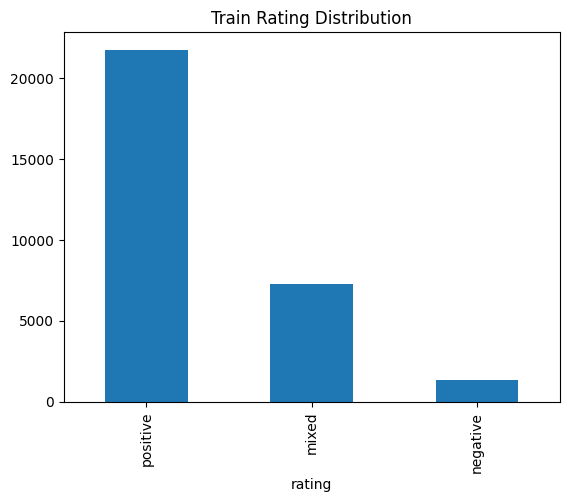

In [173]:
train['rating'].value_counts().plot(kind='bar', title='Train Rating Distribution')

In [174]:
# Select relevant features
features = [
    'Price original', 'Mac', 'Linux',
    'Has full audio', 'Has movie', 'Has DLC', 'Release Year', 'Game Age',
    'languages_count', 'Developers_code', 'Publishers_code'
]

X_train = train[features]
y_train = train['rating']
X_test = test[features]
y_test = test['rating']

### OVER SAMPLING TRAIN

In [175]:
# Use SMOTE for train 
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

## 7. MODELING

In [176]:
%pip install mord
%pip install catboost

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for mord: filename=mord-0.7-py3-none-any.whl size=9967 sha256=bb2f2071a6c5ffb817ac0c04135367f20ac66f0960765ecf9f6cf12731819cb5
  Stored in directory: c:\users\wesley\appdata\local\pip\cache\wheels\77\00\19\3cea86fbfc737ec4acb515cd94497dcc33f943fa157548b96c
Successfully built mord
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### ORDINAL LOGREG

In [177]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Ensure ordered mapping for ordinal regression
ordinal_mapping = {'negative': 0, 'mixed': 1, 'positive': 2}
y_train_ord = y_train_resampled.map(ordinal_mapping)
y_test_ord = y_test.map(ordinal_mapping)

----- Ordinal Logistic Regression -----
              precision    recall  f1-score   support

    negative       0.10      0.17      0.12       310
       mixed       0.26      0.66      0.38      1870
    positive       0.80      0.36      0.50      5565

    accuracy                           0.43      7745
   macro avg       0.39      0.40      0.33      7745
weighted avg       0.64      0.43      0.46      7745



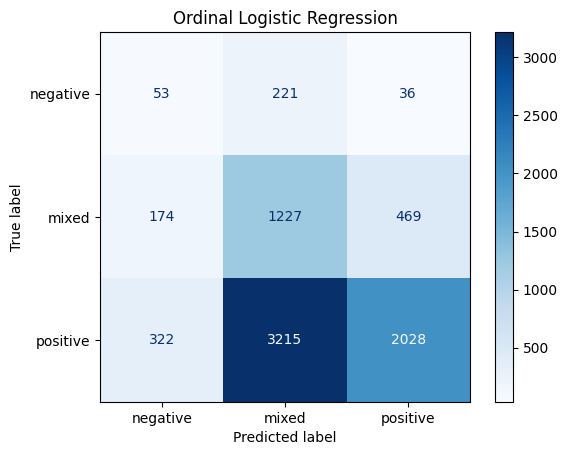

In [178]:
from mord import LogisticAT

model_ordinal = LogisticAT(alpha=1.0)
model_ordinal.fit(X_train_resampled, y_train_ord)

y_pred_ord = model_ordinal.predict(X_test)

print("----- Ordinal Logistic Regression -----")
print(classification_report(y_test_ord, y_pred_ord, target_names=['negative', 'mixed', 'positive']))

cm = confusion_matrix(y_test_ord, y_pred_ord)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['negative', 'mixed', 'positive'])
disp.plot(cmap="Blues")
plt.title("Ordinal Logistic Regression")
plt.show()


=== Ordinal Logistic Regression - TRAIN ===
              precision    recall  f1-score   support

    negative       0.52      0.18      0.27     21739
       mixed       0.35      0.75      0.48     21739
    positive       0.66      0.36      0.47     21739

    accuracy                           0.43     65217
   macro avg       0.51      0.43      0.41     65217
weighted avg       0.51      0.43      0.41     65217



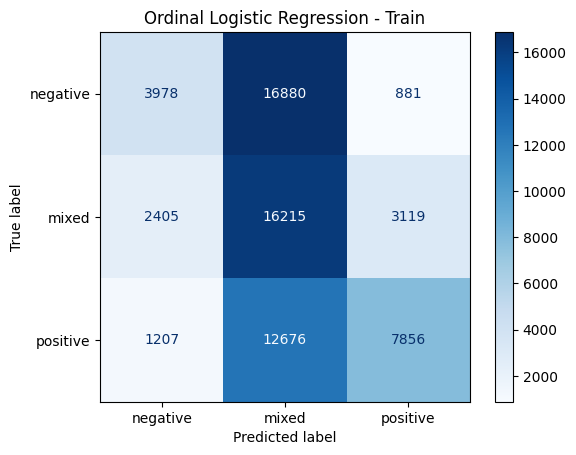

In [179]:
# Predictions
y_pred_train_ord = model_ordinal.predict(X_train_resampled)

# TRAIN
print("=== Ordinal Logistic Regression - TRAIN ===")
print(classification_report(y_train_ord, y_pred_train_ord, target_names=['negative', 'mixed', 'positive']))
cm_train = confusion_matrix(y_train_ord, y_pred_train_ord)
ConfusionMatrixDisplay(cm_train, display_labels=['negative', 'mixed', 'positive']).plot(cmap="Blues")
plt.title("Ordinal Logistic Regression - Train")
plt.show()

### LOGISTIC REGRESSION

d:\.STUDY\Cawu5\DM\CODE_FINAL\steam_games_analysis\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


----- Logistic Regression -----
              precision    recall  f1-score   support

    negative       0.27      0.19      0.23      1870
       mixed       0.07      0.54      0.12       310
    positive       0.79      0.55      0.65      5565

    accuracy                           0.46      7745
   macro avg       0.37      0.43      0.33      7745
weighted avg       0.63      0.46      0.52      7745



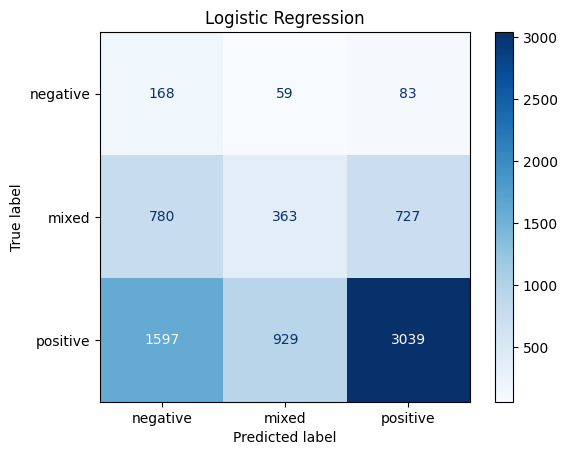

In [180]:
from sklearn.linear_model import LogisticRegression

model_logreg = LogisticRegression(max_iter=1000)
model_logreg.fit(X_train_resampled, y_train_resampled)

y_pred_logreg = model_logreg.predict(X_test)

print("----- Logistic Regression -----")
print(classification_report(y_test, y_pred_logreg, target_names=['negative', 'mixed', 'positive']))

cm = confusion_matrix(y_test, y_pred_logreg, labels=['negative', 'mixed', 'positive'])
ConfusionMatrixDisplay(cm, display_labels=['negative', 'mixed', 'positive']).plot(cmap="Blues")
plt.title("Logistic Regression")
plt.show()


=== Logistic Regression - TRAIN ===
              precision    recall  f1-score   support

    negative       0.37      0.22      0.27     21739
       mixed       0.45      0.61      0.51     21739
    positive       0.54      0.57      0.56     21739

    accuracy                           0.47     65217
   macro avg       0.45      0.47      0.45     65217
weighted avg       0.45      0.47      0.45     65217



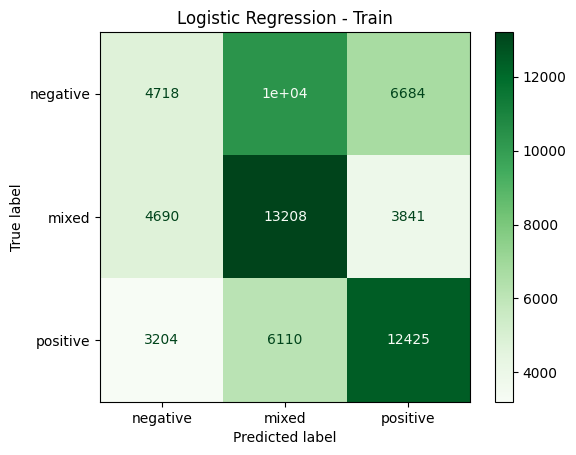

In [181]:
y_pred_train_log = model_logreg.predict(X_train_resampled)

print("=== Logistic Regression - TRAIN ===")
print(classification_report(y_train_resampled, y_pred_train_log, target_names=['negative', 'mixed', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_train_resampled, y_pred_train_log, display_labels=['negative', 'mixed', 'positive'], cmap="Greens")
plt.title("Logistic Regression - Train")
plt.show()

### RANDOM FOREST

=== Random Forest - TRAIN ===
              precision    recall  f1-score   support

    negative       0.91      0.91      0.91     21739
       mixed       0.90      0.95      0.93     21739
    positive       0.98      0.93      0.96     21739

    accuracy                           0.93     65217
   macro avg       0.93      0.93      0.93     65217
weighted avg       0.93      0.93      0.93     65217



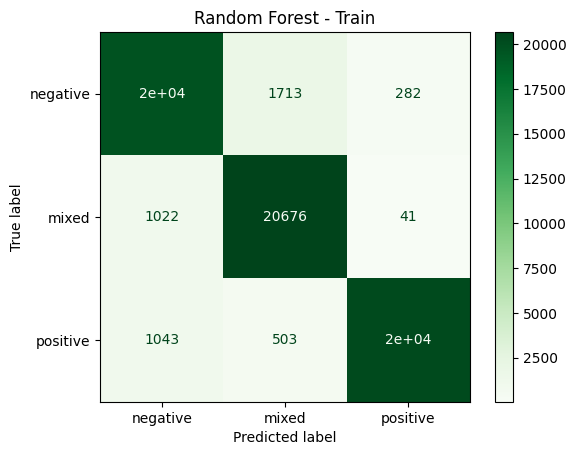

=== Random Forest - TEST ===
              precision    recall  f1-score   support

    negative       0.29      0.42      0.34      1870
       mixed       0.10      0.26      0.14       310
    positive       0.78      0.60      0.68      5565

    accuracy                           0.54      7745
   macro avg       0.39      0.42      0.39      7745
weighted avg       0.64      0.54      0.58      7745



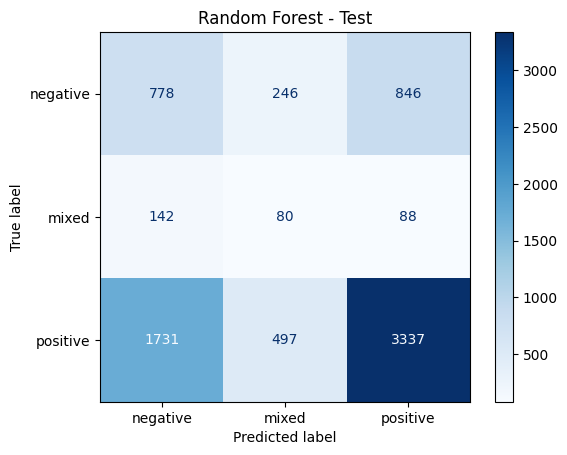

In [182]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_resampled, y_train_resampled)

y_pred_train_rf = model_rf.predict(X_train_resampled)
y_pred_test_rf = model_rf.predict(X_test)

print("=== Random Forest - TRAIN ===")
print(classification_report(y_train_resampled, y_pred_train_rf, target_names=['negative', 'mixed', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_train_resampled, y_pred_train_rf, display_labels=['negative', 'mixed', 'positive'], cmap="Greens")
plt.title("Random Forest - Train")
plt.show()

print("=== Random Forest - TEST ===")
print(classification_report(y_test, y_pred_test_rf, target_names=['negative', 'mixed', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_rf, display_labels=['negative', 'mixed', 'positive'], cmap="Blues")
plt.title("Random Forest - Test")
plt.show()


### KNN

=== KNN - TRAIN ===
              precision    recall  f1-score   support

    negative       0.68      0.83      0.75     21739
       mixed       0.85      0.73      0.79     21739
    positive       0.78      0.71      0.74     21739

    accuracy                           0.76     65217
   macro avg       0.77      0.76      0.76     65217
weighted avg       0.77      0.76      0.76     65217



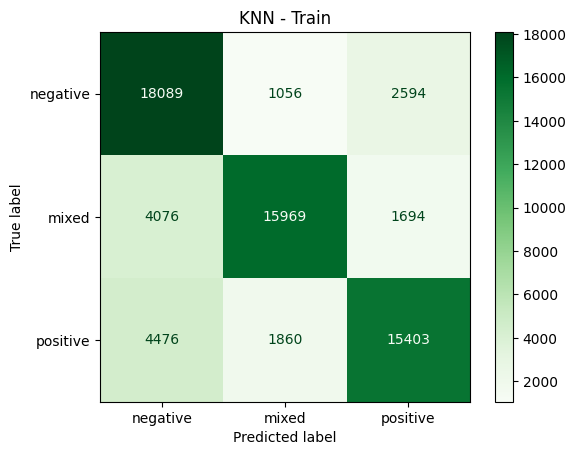

=== KNN - TEST ===
              precision    recall  f1-score   support

    negative       0.29      0.57      0.38      1870
       mixed       0.08      0.22      0.12       310
    positive       0.81      0.45      0.58      5565

    accuracy                           0.47      7745
   macro avg       0.39      0.42      0.36      7745
weighted avg       0.65      0.47      0.51      7745



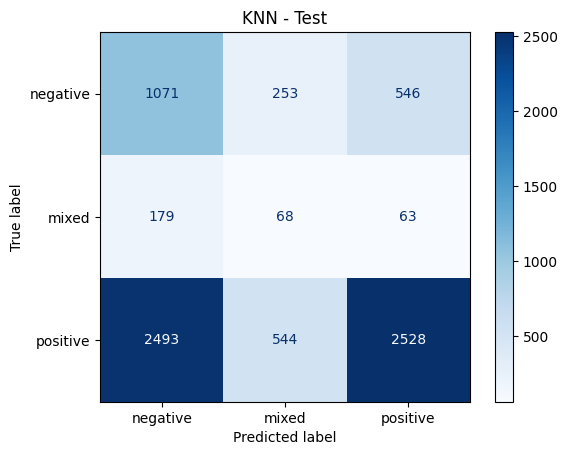

In [183]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train_resampled, y_train_resampled)

y_pred_train_knn = model_knn.predict(X_train_resampled)
y_pred_test_knn = model_knn.predict(X_test)

print("=== KNN - TRAIN ===")
print(classification_report(y_train_resampled, y_pred_train_knn, target_names=['negative', 'mixed', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_train_resampled, y_pred_train_knn, display_labels=['negative', 'mixed', 'positive'], cmap="Greens")
plt.title("KNN - Train")
plt.show()

print("=== KNN - TEST ===")
print(classification_report(y_test, y_pred_test_knn, target_names=['negative', 'mixed', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_knn, display_labels=['negative', 'mixed', 'positive'], cmap="Blues")
plt.title("KNN - Test")
plt.show()


# ATTEMPT 4

### DEPENDENCIES

In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 1. READ DATA

In [185]:
df = pd.read_csv('data/merged_steam_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41170 entries, 0 to 41169
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   App ID                      41170 non-null  int64  
 1   Name                        41170 non-null  object 
 2   Required age                41170 non-null  int64  
 3   DLC count                   41170 non-null  int64  
 4   Detailed description        41123 non-null  object 
 5   About the game              41113 non-null  object 
 6   Short description           41156 non-null  object 
 7   Reviews                     7920 non-null   object 
 8   Windows                     41170 non-null  bool   
 9   Mac                         41170 non-null  bool   
 10  Linux                       41170 non-null  bool   
 11  Metacritic score            41170 non-null  int64  
 12  Achievements                41170 non-null  int64  
 13  Recommendations             411

## 2. SELECT COLUMNS

In [186]:
selected_columns = [
    'Release date', 'Price original', 'DLC count', 'Required age', 'Windows', 'Mac', 'Linux', 'Steam Deck',
    'Supported languages', 'Full audio languages', 'Developers', 'Publishers',
    'Movies', 'rating', 'Positive ratio', 'Genres', 'Tags', 'Categories', 'Achievements', 'Recommendations'
]

df_filtered = df[selected_columns]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41170 entries, 0 to 41169
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Release date          41170 non-null  object 
 1   Price original        41170 non-null  float64
 2   DLC count             41170 non-null  int64  
 3   Required age          41170 non-null  int64  
 4   Windows               41170 non-null  bool   
 5   Mac                   41170 non-null  bool   
 6   Linux                 41170 non-null  bool   
 7   Steam Deck            41170 non-null  bool   
 8   Supported languages   41157 non-null  object 
 9   Full audio languages  19288 non-null  object 
 10  Developers            41096 non-null  object 
 11  Publishers            40949 non-null  object 
 12  Movies                39366 non-null  object 
 13  rating                41170 non-null  object 
 14  Positive ratio        41170 non-null  int64  
 15  Genres             

## 3. SPLIT DATA

### Filter 10k Developers and 10k Publishers

In [187]:
# Get top 10k developers by count, break ties with mean positive_ratio
dev_counts = df_filtered.groupby('Developers').agg(
    count=('Developers', 'count'),
    mean_positive_ratio=('Positive ratio', 'mean')
).reset_index()

dev_counts_sorted = dev_counts.sort_values(['count', 'mean_positive_ratio'], ascending=[False, False])
top_10k_developers = dev_counts_sorted.head(10000)['Developers'].tolist()

# Filter df_filtered to only include top 10k developers
df_filtered = df_filtered[df_filtered['Developers'].isin(top_10k_developers)]

# Repeat the same for publishers
pub_counts = df_filtered.groupby('Publishers').agg(
    count=('Publishers', 'count'),
    mean_positive_ratio=('Positive ratio', 'mean')
).reset_index()

pub_counts_sorted = pub_counts.sort_values(['count', 'mean_positive_ratio'], ascending=[False, False])
top_10k_publishers = pub_counts_sorted.head(10000)['Publishers'].tolist()
# Filter df_filtered to only include top 10k publishers
df_filtered = df_filtered[df_filtered['Publishers'].isin(top_10k_publishers)]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25512 entries, 0 to 41169
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Release date          25512 non-null  object 
 1   Price original        25512 non-null  float64
 2   DLC count             25512 non-null  int64  
 3   Required age          25512 non-null  int64  
 4   Windows               25512 non-null  bool   
 5   Mac                   25512 non-null  bool   
 6   Linux                 25512 non-null  bool   
 7   Steam Deck            25512 non-null  bool   
 8   Supported languages   25511 non-null  object 
 9   Full audio languages  11616 non-null  object 
 10  Developers            25512 non-null  object 
 11  Publishers            25512 non-null  object 
 12  Movies                24251 non-null  object 
 13  rating                25512 non-null  object 
 14  Positive ratio        25512 non-null  int64  
 15  Genres                25

### Split Data

In [188]:
from sklearn.model_selection import train_test_split

# Split the data into features and target variable
X = df_filtered.drop(columns=['rating'])
y = df_filtered['rating']

# Split the data into training and testing sets 70-30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Concat X_train and y_train for visualization
train = pd.concat([X_train, y_train], axis=1)
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17858 entries, 12809 to 38303
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Release date          17858 non-null  object 
 1   Price original        17858 non-null  float64
 2   DLC count             17858 non-null  int64  
 3   Required age          17858 non-null  int64  
 4   Windows               17858 non-null  bool   
 5   Mac                   17858 non-null  bool   
 6   Linux                 17858 non-null  bool   
 7   Steam Deck            17858 non-null  bool   
 8   Supported languages   17857 non-null  object 
 9   Full audio languages  8110 non-null   object 
 10  Developers            17858 non-null  object 
 11  Publishers            17858 non-null  object 
 12  Movies                16961 non-null  object 
 13  Positive ratio        17858 non-null  int64  
 14  Genres                17837 non-null  object 
 15  Tags                

In [189]:
# Concat X_test and y_test for visualization
test = pd.concat([X_test, y_test], axis=1)
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7654 entries, 19978 to 40229
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Release date          7654 non-null   object 
 1   Price original        7654 non-null   float64
 2   DLC count             7654 non-null   int64  
 3   Required age          7654 non-null   int64  
 4   Windows               7654 non-null   bool   
 5   Mac                   7654 non-null   bool   
 6   Linux                 7654 non-null   bool   
 7   Steam Deck            7654 non-null   bool   
 8   Supported languages   7654 non-null   object 
 9   Full audio languages  3506 non-null   object 
 10  Developers            7654 non-null   object 
 11  Publishers            7654 non-null   object 
 12  Movies                7290 non-null   object 
 13  Positive ratio        7654 non-null   int64  
 14  Genres                7650 non-null   object 
 15  Tags                 

## 4. EDA

### 4a. Missing Value Detection

In [190]:
# Get missing value amount and percentage for each column and sort Descending
missing_values = train.isna().sum()
missing_values = missing_values[missing_values > 0]
missing_values = pd.DataFrame(missing_values)
missing_values.columns = ['Missing Values']
missing_values['Percentage'] = (missing_values['Missing Values'] / train.shape[0]) * 100
missing_values = missing_values.sort_values(by='Missing Values', ascending=False)
missing_values

,Missing Values,Percentage
Full audio languages,9748,54.586180
Tags,1349,7.554037
Movies,897,5.022959
Categories,197,1.103147
Genres,21,0.117594
Supported languages,1,0.005600


### 4b. Noise Detection

In [191]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17858 entries, 12809 to 38303
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Release date          17858 non-null  object 
 1   Price original        17858 non-null  float64
 2   DLC count             17858 non-null  int64  
 3   Required age          17858 non-null  int64  
 4   Windows               17858 non-null  bool   
 5   Mac                   17858 non-null  bool   
 6   Linux                 17858 non-null  bool   
 7   Steam Deck            17858 non-null  bool   
 8   Supported languages   17857 non-null  object 
 9   Full audio languages  8110 non-null   object 
 10  Developers            17858 non-null  object 
 11  Publishers            17858 non-null  object 
 12  Movies                16961 non-null  object 
 13  Positive ratio        17858 non-null  int64  
 14  Genres                17837 non-null  object 
 15  Tags                

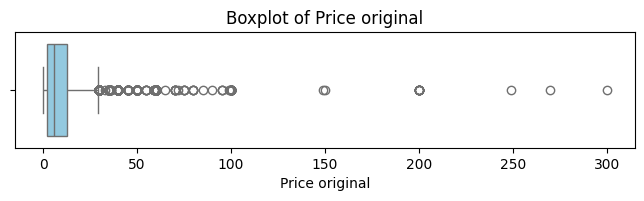

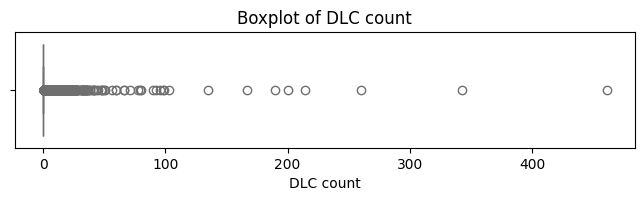

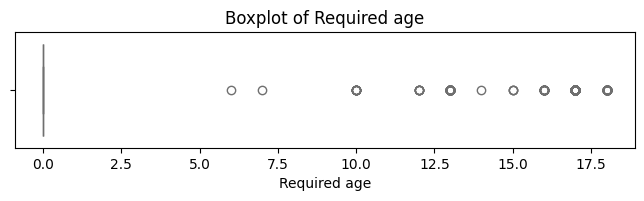

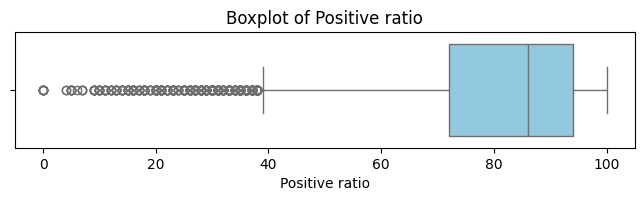

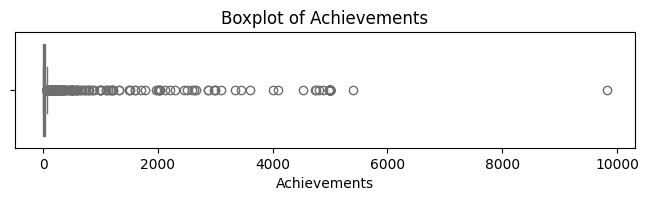

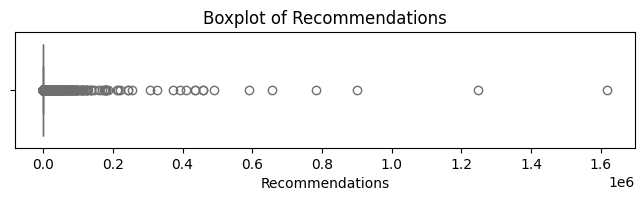

In [192]:
num_cols = train.select_dtypes(include=[np.number]).columns.tolist()
for col in num_cols:
    plt.figure(figsize=(8, 1.5))
    sns.boxplot(x=train[col], color="skyblue")
    plt.title(f"Boxplot of {col}")
    plt.show()

In [193]:
# Use IQR
for col in num_cols:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = train[(train[col] < lower_bound) | (train[col] > upper_bound)][col]
    print(f"{col}: {outliers.count()} outliers ({100 * outliers.count() / train.shape[0]:.2f}%)")

Price original: 1030 outliers (5.77%)
DLC count: 4296 outliers (24.06%)
Required age: 547 outliers (3.06%)
Positive ratio: 525 outliers (2.94%)
Achievements: 978 outliers (5.48%)
Recommendations: 2816 outliers (15.77%)


#### ANALYSIS

In [194]:
train['Required age'].sort_values(ascending=True).unique()

array([ 0,  6,  7, 10, 12, 13, 14, 15, 16, 17, 18], dtype=int64)

In [195]:
train['Required age'].value_counts()

Required age
0     17311
17      363
13       76
18       60
16       26
10       10
12        6
15        3
6         1
14        1
7         1
Name: count, dtype: int64

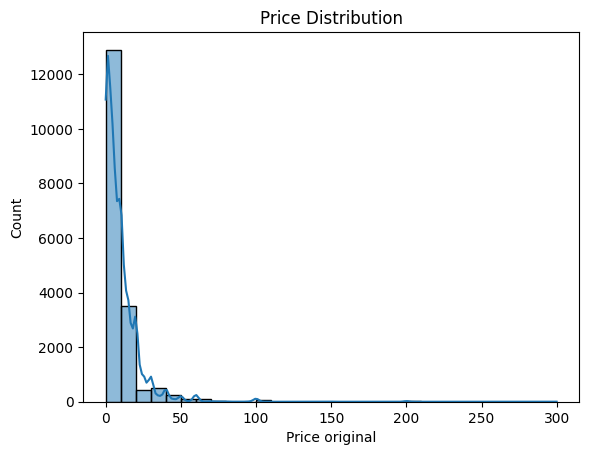

In [196]:
# Distribusi price dengan density plot
sns.histplot(train['Price original'].dropna(), kde=True, bins=30)
plt.title('Price Distribution')
plt.show()

In [197]:
print(train['Price original'].describe())

count    17858.000000
mean         9.402193
std         12.654009
min          0.000000
25%          1.990000
50%          5.990000
75%         12.990000
max        299.900000
Name: Price original, dtype: float64


In [198]:
Q1 = train['Price original'].quantile(0.25)
Q3 = train['Price original'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
train[(train['Price original'] < lower) | (train['Price original'] > upper)].sort_values(by='Price original', ascending=False).head(15)

,Release date,Price original,DLC count,Required age,Windows,Mac,Linux,Steam Deck,Supported languages,Full audio languages,Developers,Publishers,Movies,Positive ratio,Genres,Tags,Categories,Achievements,Recommendations,rating
2078,2013-11-12,299.90,0,0,True,False,False,True,English,NaN,Aartform,Aartform,http://cdn.akamai.steamstatic.com/steam/apps/2...,69,Animation & Modeling,Animation & Modeling,Single-player,0,0,Mixed
9157,2018-10-10,269.99,0,0,True,True,False,True,English,NaN,SideFX,SideFX,http://cdn.akamai.steamstatic.com/steam/apps/2...,94,"Animation & Modeling,Design & Illustration,Vid...","Animation & Modeling,Game Development,3D,Desig...","Partial Controller Support,Steam Cloud",0,124,Very Positive
38421,2022-11-01,249.00,0,0,True,False,False,True,"English,French,German,Spanish - Spain",NaN,MAGIX Software GmbH,MAGIX Software GmbH,http://cdn.akamai.steamstatic.com/steam/apps/2...,66,Video Production,"Video Production,Software",NaN,0,0,Mixed
40635,2023-02-21,199.99,0,0,True,True,True,True,"English,French,Italian,German,Spanish - Spain,...",NaN,Top-Down Games,Hede,http://cdn.akamai.steamstatic.com/steam/apps/2...,78,"Action,Adventure,Casual,Indie,Racing,RPG,Simul...",NaN,"Single-player,Steam Achievements,Steam Leaderb...",6,0,Mostly Positive
40400,2023-01-27,199.99,0,0,True,False,False,True,English,NaN,Hede,Hede,http://cdn.akamai.steamstatic.com/steam/apps/2...,100,"Action,Adventure,Casual,Indie,Racing,RPG,Simul...",NaN,"Single-player,Steam Achievements",6,0,Positive
36909,2022-03-21,199.99,0,0,True,False,False,True,"English,Russian,Simplified Chinese",NaN,"Cristian Manolachi,Atomic Fabrik","Cristian Manolachi,Atomic Fabrik",http://cdn.akamai.steamstatic.com/steam/apps/2...,76,"Casual,Indie,Racing,Simulation,Sports","Choose Your Own Adventure,Racing,Exploration,3...","Single-player,Partial Controller Support,Remot...",0,0,Mostly Positive
40077,2022-12-17,199.99,0,0,True,True,True,True,"English,French,Italian,German,Spanish - Spain,...",NaN,Top-Down Games,Hede,http://cdn.akamai.steamstatic.com/steam/apps/2...,75,"Action,Adventure,Casual,Indie,RPG,Simulation,S...",NaN,"Single-player,Steam Achievements,Steam Leaderb...",6,0,Mostly Positive
37539,2022-05-21,199.99,0,0,True,False,False,True,English,NaN,"Cristian Manolachi,Atomic Fabrik","Cristian Manolachi,Atomic Fabrik",http://cdn.akamai.steamstatic.com/steam/apps/2...,68,"Casual,Indie,Racing,Simulation","Casual,Simulation,Racing,Automobile Sim,Explor...",Single-player,0,0,Mixed
7475,2016-02-02,199.99,0,0,True,False,False,True,"English,Italian,Japanese,Simplified Chinese,Ge...",NaN,3Dflow SRL,3Dflow SRL,http://cdn.akamai.steamstatic.com/steam/apps/2...,96,"Animation & Modeling,Design & Illustration,Vid...","Video Production,Animation & Modeling,Design &...",Steam Trading Cards,0,0,Very Positive
41078,2023-05-23,199.99,0,0,True,True,True,True,"English,French,Italian,German,Spanish - Spain,...",NaN,PUZZLE Games,Hede,http://cdn.akamai.steamstatic.com/steam/apps/2...,100,"Action,Adventure,Casual,Indie,Racing,RPG,Simul...",NaN,"Single-player,Steam Achievements,Steam Leaderb...",6,0,Positive


In [199]:
# Parse and store unique tag
def parse_tags(tags):
    if pd.isna(tags):
        return []
    return [tag.strip() for tag in tags.split(',')]

# Print unique tags single
unique_tags = set()
for tags in train['Tags'].dropna():
    parsed_tags = parse_tags(tags)
    unique_tags.update(parsed_tags)

# Convert unique_tags to a sorted list and print in table format
unique_tags_list = sorted(unique_tags)
print("Unique Tags:")
for tag in unique_tags_list:
    print(tag)


Unique Tags:
1980s
1990's
2.5D
2D
2D Fighter
2D Platformer
360 Video
3D
3D Fighter
3D Platformer
3D Vision
4 Player Local
4X
6DOF
8-bit Music
ATV
Abstract
Action
Action RPG
Action RTS
Action Roguelike
Action-Adventure
Addictive
Adventure
Agriculture
Aliens
Alternate History
Ambient
America
Animation & Modeling
Anime
Arcade
Archery
Arena Shooter
Artificial Intelligence
Assassin
Asymmetric VR
Asynchronous Multiplayer
Atmospheric
Audio Production
Auto Battler
Automation
Automobile Sim
BMX
Base-Building
Baseball
Based On A Novel
Basketball
Battle Royale
Beat 'em up
Beautiful
Benchmark
Bikes
Blood
Board Game
Boss Rush
Bowling
Boxing
Building
Bullet Hell
Bullet Time
CRPG
Capitalism
Card Battler
Card Game
Cartoon
Cartoony
Casual
Cats
Character Action Game
Character Customization
Chess
Choices Matter
Choose Your Own Adventure
Cinematic
City Builder
Class-Based
Classic
Clicker
Co-op
Co-op Campaign
Cold War
Collectathon
Colony Sim
Colorful
Combat
Combat Racing
Comedy
Comic Book
Competitive
Consp

In [200]:
# Unique genres
def parse_genres(genres):
    if pd.isna(genres):
        return []
    return [genre.strip() for genre in genres.split(',')]

# Print unique genres single
unique_genres = set()
for genres in train['Genres'].dropna():
    parsed_genres = parse_genres(genres)
    unique_genres.update(parsed_genres)

# Convert unique_genres to a sorted list and print in table format
unique_genres_list = sorted(unique_genres)
print("Unique Genres:")
for genre in unique_genres_list:
    print(genre)

Unique Genres:
Action
Adventure
Animation & Modeling
Audio Production
Casual
Design & Illustration
Early Access
Education
Free to Play
Game Development
Gore
Indie
Massively Multiplayer
Movie
Nudity
Photo Editing
RPG
Racing
Sexual Content
Simulation
Software Training
Sports
Strategy
Utilities
Video Production
Violent
Web Publishing


In [201]:
# Unique categories
def parse_categories(categories):
    if pd.isna(categories):
        return []
    return [category.strip() for category in categories.split(',')]
# Print unique categories single
unique_categories = set()
for categories in train['Categories'].dropna():
    parsed_categories = parse_categories(categories)
    unique_categories.update(parsed_categories)
# Convert unique_categories to a sorted list and print in table format
unique_categories_list = sorted(unique_categories)
print("Unique Categories:")
for category in unique_categories_list:
    print(category)


Unique Categories:
Captions available
Co-op
Commentary available
Cross-Platform Multiplayer
Full controller support
HDR available
In-App Purchases
Includes Source SDK
Includes level editor
LAN Co-op
LAN PvP
MMO
Multi-player
Online Co-op
Online PvP
Partial Controller Support
PvP
Remote Play Together
Remote Play on Phone
Remote Play on TV
Remote Play on Tablet
Shared/Split Screen
Shared/Split Screen Co-op
Shared/Split Screen PvP
Single-player
Stats
Steam Achievements
Steam Cloud
Steam Leaderboards
Steam Trading Cards
Steam Turn Notifications
Steam Workshop
SteamVR Collectibles
Tracked Controller Support
VR Only
VR Support
VR Supported
Valve Anti-Cheat enabled


## 5. PREPROCESSING

### 5a. Missing Value Handling

In [202]:
# Drop rows
col_to_clean = ['Supported languages', 'Genres', 'Developers', 'Publishers', 'Categories']
train.dropna(subset=col_to_clean, inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17642 entries, 12809 to 38303
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Release date          17642 non-null  object 
 1   Price original        17642 non-null  float64
 2   DLC count             17642 non-null  int64  
 3   Required age          17642 non-null  int64  
 4   Windows               17642 non-null  bool   
 5   Mac                   17642 non-null  bool   
 6   Linux                 17642 non-null  bool   
 7   Steam Deck            17642 non-null  bool   
 8   Supported languages   17642 non-null  object 
 9   Full audio languages  8060 non-null   object 
 10  Developers            17642 non-null  object 
 11  Publishers            17642 non-null  object 
 12  Movies                16765 non-null  object 
 13  Positive ratio        17642 non-null  int64  
 14  Genres                17642 non-null  object 
 15  Tags                

In [203]:
# Convert Full audio languages and Movies into 0 or 1 columns in train
train['Has full audio'] = train['Full audio languages'].notnull().map({True: 1, False: 0})
train.drop(columns=['Full audio languages'], inplace=True)

train['Has movie'] = train['Movies'].notnull().map({True: 1, False: 0})
train.drop(columns=['Movies'], inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17642 entries, 12809 to 38303
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Release date         17642 non-null  object 
 1   Price original       17642 non-null  float64
 2   DLC count            17642 non-null  int64  
 3   Required age         17642 non-null  int64  
 4   Windows              17642 non-null  bool   
 5   Mac                  17642 non-null  bool   
 6   Linux                17642 non-null  bool   
 7   Steam Deck           17642 non-null  bool   
 8   Supported languages  17642 non-null  object 
 9   Developers           17642 non-null  object 
 10  Publishers           17642 non-null  object 
 11  Positive ratio       17642 non-null  int64  
 12  Genres               17642 non-null  object 
 13  Tags                 16314 non-null  object 
 14  Categories           17642 non-null  object 
 15  Achievements         17642 non-null  

### 5b. Noise Handling

In [204]:
def age_category(age):
    if age <= 12:
        return 'Everyone'
    elif 13 <= age <= 17:
        return 'Teen'
    else:
        return 'Adult'

train['Required age category'] = train['Required age'].apply(age_category)
train.drop(columns=['Required age'], inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17642 entries, 12809 to 38303
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Release date           17642 non-null  object 
 1   Price original         17642 non-null  float64
 2   DLC count              17642 non-null  int64  
 3   Windows                17642 non-null  bool   
 4   Mac                    17642 non-null  bool   
 5   Linux                  17642 non-null  bool   
 6   Steam Deck             17642 non-null  bool   
 7   Supported languages    17642 non-null  object 
 8   Developers             17642 non-null  object 
 9   Publishers             17642 non-null  object 
 10  Positive ratio         17642 non-null  int64  
 11  Genres                 17642 non-null  object 
 12  Tags                   16314 non-null  object 
 13  Categories             17642 non-null  object 
 14  Achievements           17642 non-null  int64  
 15  Rec

In [205]:
train['Required age category'].value_counts()

Required age category
Everyone    17113
Teen          469
Adult          60
Name: count, dtype: int64

In [206]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17642 entries, 12809 to 38303
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Release date           17642 non-null  object 
 1   Price original         17642 non-null  float64
 2   DLC count              17642 non-null  int64  
 3   Windows                17642 non-null  bool   
 4   Mac                    17642 non-null  bool   
 5   Linux                  17642 non-null  bool   
 6   Steam Deck             17642 non-null  bool   
 7   Supported languages    17642 non-null  object 
 8   Developers             17642 non-null  object 
 9   Publishers             17642 non-null  object 
 10  Positive ratio         17642 non-null  int64  
 11  Genres                 17642 non-null  object 
 12  Tags                   16314 non-null  object 
 13  Categories             17642 non-null  object 
 14  Achievements           17642 non-null  int64  
 15  Rec

In [207]:
# Remove rows where Genres or Tags indicate software
software_keywords = ['Animation & Modeling', 'Design & Illustration', 'Video Production', 'Photo Editing', 'Audio Production', 'Utilities', 'Web Publishing', 'Accounting', 'Game Development', 'Software Training']
mask = train['Genres'].str.contains('|'.join(software_keywords), na=False) | train['Tags'].str.contains('|'.join(software_keywords), na=False)
train_games_only = train[~mask].copy()
train_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17401 entries, 12809 to 38303
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Release date           17401 non-null  object 
 1   Price original         17401 non-null  float64
 2   DLC count              17401 non-null  int64  
 3   Windows                17401 non-null  bool   
 4   Mac                    17401 non-null  bool   
 5   Linux                  17401 non-null  bool   
 6   Steam Deck             17401 non-null  bool   
 7   Supported languages    17401 non-null  object 
 8   Developers             17401 non-null  object 
 9   Publishers             17401 non-null  object 
 10  Positive ratio         17401 non-null  int64  
 11  Genres                 17401 non-null  object 
 12  Tags                   16077 non-null  object 
 13  Categories             17401 non-null  object 
 14  Achievements           17401 non-null  int64  
 15  Rec

In [208]:
# Remove price original outliers using IQR
Q1 = train_games_only['Price original'].quantile(0.25)
Q3 = train_games_only['Price original'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = train_games_only[(train_games_only['Price original'] < lower_bound) | (train_games_only['Price original'] > upper_bound)]
print(f"Outliers count: {outliers.shape[0]}")
# Remove outliers from train_games_only
train_games_only = train_games_only[~((train_games_only['Price original'] < lower_bound) | (train_games_only['Price original'] > upper_bound))]
train_games_only.info()

Outliers count: 959
<class 'pandas.core.frame.DataFrame'>
Index: 16442 entries, 22276 to 38303
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Release date           16442 non-null  object 
 1   Price original         16442 non-null  float64
 2   DLC count              16442 non-null  int64  
 3   Windows                16442 non-null  bool   
 4   Mac                    16442 non-null  bool   
 5   Linux                  16442 non-null  bool   
 6   Steam Deck             16442 non-null  bool   
 7   Supported languages    16442 non-null  object 
 8   Developers             16442 non-null  object 
 9   Publishers             16442 non-null  object 
 10  Positive ratio         16442 non-null  int64  
 11  Genres                 16442 non-null  object 
 12  Tags                   15198 non-null  object 
 13  Categories             16442 non-null  object 
 14  Achievements           16442 non-nu

### 5c. Feature Engineering

In [209]:
# Binning DLC count into Has DLC
train_games_only['Has DLC'] = np.where(train_games_only['DLC count'] > 0, 1, 0)
train_games_only.drop(columns=['DLC count'], inplace=True)
train_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16442 entries, 22276 to 38303
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Release date           16442 non-null  object 
 1   Price original         16442 non-null  float64
 2   Windows                16442 non-null  bool   
 3   Mac                    16442 non-null  bool   
 4   Linux                  16442 non-null  bool   
 5   Steam Deck             16442 non-null  bool   
 6   Supported languages    16442 non-null  object 
 7   Developers             16442 non-null  object 
 8   Publishers             16442 non-null  object 
 9   Positive ratio         16442 non-null  int64  
 10  Genres                 16442 non-null  object 
 11  Tags                   15198 non-null  object 
 12  Categories             16442 non-null  object 
 13  Achievements           16442 non-null  int64  
 14  Recommendations        16442 non-null  int64  
 15  rat

In [210]:
from datetime import datetime

# Convert to datetime (handle errors gracefully)
train_games_only['Release date'] = pd.to_datetime(train_games_only['Release date'], errors='coerce')

# Drop rows where date conversion failed (optional or handle as missing)
train_games_only = train_games_only.dropna(subset=['Release date'])

# Extract release year and game age
train_games_only['Release Year'] = train_games_only['Release date'].dt.year
train_games_only['Game Age'] = datetime.now().year - train_games_only['Release Year']

# Drop original release date column
train_games_only = train_games_only.drop(columns=['Release date'])


In [211]:
train_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16442 entries, 22276 to 38303
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Price original         16442 non-null  float64
 1   Windows                16442 non-null  bool   
 2   Mac                    16442 non-null  bool   
 3   Linux                  16442 non-null  bool   
 4   Steam Deck             16442 non-null  bool   
 5   Supported languages    16442 non-null  object 
 6   Developers             16442 non-null  object 
 7   Publishers             16442 non-null  object 
 8   Positive ratio         16442 non-null  int64  
 9   Genres                 16442 non-null  object 
 10  Tags                   15198 non-null  object 
 11  Categories             16442 non-null  object 
 12  Achievements           16442 non-null  int64  
 13  Recommendations        16442 non-null  int64  
 14  rating                 16442 non-null  object 
 15  Has

In [212]:
# Create a new column languages_count with the count of languages in Supported languages
train_games_only['languages_count'] = train_games_only['Supported languages'].apply(lambda x: len(x.split(',')) if pd.notnull(x) else 0)

train_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16442 entries, 22276 to 38303
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Price original         16442 non-null  float64
 1   Windows                16442 non-null  bool   
 2   Mac                    16442 non-null  bool   
 3   Linux                  16442 non-null  bool   
 4   Steam Deck             16442 non-null  bool   
 5   Supported languages    16442 non-null  object 
 6   Developers             16442 non-null  object 
 7   Publishers             16442 non-null  object 
 8   Positive ratio         16442 non-null  int64  
 9   Genres                 16442 non-null  object 
 10  Tags                   15198 non-null  object 
 11  Categories             16442 non-null  object 
 12  Achievements           16442 non-null  int64  
 13  Recommendations        16442 non-null  int64  
 14  rating                 16442 non-null  object 
 15  Has

In [213]:
# make a new column 'Language_english' that is 1 if 'english' is in Supported languages, else 0
train_games_only['Language_english'] = train_games_only['Supported languages'].apply(lambda x: 1 if 'english' in x.lower() else 0)
train_games_only['Language_english'].value_counts()

Language_english
1    15903
0      539
Name: count, dtype: int64

In [214]:
# drop Supported languages column
train_games_only.drop(columns=['Supported languages'], inplace=True)

In [215]:
train_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16442 entries, 22276 to 38303
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Price original         16442 non-null  float64
 1   Windows                16442 non-null  bool   
 2   Mac                    16442 non-null  bool   
 3   Linux                  16442 non-null  bool   
 4   Steam Deck             16442 non-null  bool   
 5   Developers             16442 non-null  object 
 6   Publishers             16442 non-null  object 
 7   Positive ratio         16442 non-null  int64  
 8   Genres                 16442 non-null  object 
 9   Tags                   15198 non-null  object 
 10  Categories             16442 non-null  object 
 11  Achievements           16442 non-null  int64  
 12  Recommendations        16442 non-null  int64  
 13  rating                 16442 non-null  object 
 14  Has full audio         16442 non-null  int64  
 15  Has

In [216]:
# Make a new column 'Platform_count' that is the sum of Windows, Mac, and Linux
train_games_only['Platform_count'] = train_games_only[['Windows', 'Mac', 'Linux']].sum(axis=1)
train_games_only['Platform_count'].value_counts()

Platform_count
1    11357
3     2647
2     2438
Name: count, dtype: int64

### 5d. Encoding

In [217]:
train_games_only['Mac'] = train_games_only['Mac'].astype(int)
train_games_only['Linux'] = train_games_only['Linux'].astype(int)
train_games_only['Windows'] = train_games_only['Windows'].astype(int)
train_games_only['Steam Deck'] = train_games_only['Steam Deck'].astype(int)

In [218]:
# Encode developer and publisher columns
from sklearn.preprocessing import LabelEncoder

developer_encoder = LabelEncoder()
train_games_only['Developers_code'] = developer_encoder.fit_transform(train_games_only['Developers'])

publisher_encoder = LabelEncoder()
train_games_only['Publishers_code'] = publisher_encoder.fit_transform(train_games_only['Publishers'])

# drop developers and publishers
train_games_only.drop(columns=['Developers', 'Publishers'], inplace=True)
train_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16442 entries, 22276 to 38303
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Price original         16442 non-null  float64
 1   Windows                16442 non-null  int32  
 2   Mac                    16442 non-null  int32  
 3   Linux                  16442 non-null  int32  
 4   Steam Deck             16442 non-null  int32  
 5   Positive ratio         16442 non-null  int64  
 6   Genres                 16442 non-null  object 
 7   Tags                   15198 non-null  object 
 8   Categories             16442 non-null  object 
 9   Achievements           16442 non-null  int64  
 10  Recommendations        16442 non-null  int64  
 11  rating                 16442 non-null  object 
 12  Has full audio         16442 non-null  int64  
 13  Has movie              16442 non-null  int64  
 14  Required age category  16442 non-null  object 
 15  Has

In [219]:
# Encode Required age category
required_age_encoder = LabelEncoder()
train_games_only['Required age category_code'] = required_age_encoder.fit_transform(train_games_only['Required age category'])
# drop Required age category
train_games_only.drop(columns=['Required age category'], inplace=True)
train_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16442 entries, 22276 to 38303
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Price original              16442 non-null  float64
 1   Windows                     16442 non-null  int32  
 2   Mac                         16442 non-null  int32  
 3   Linux                       16442 non-null  int32  
 4   Steam Deck                  16442 non-null  int32  
 5   Positive ratio              16442 non-null  int64  
 6   Genres                      16442 non-null  object 
 7   Tags                        15198 non-null  object 
 8   Categories                  16442 non-null  object 
 9   Achievements                16442 non-null  int64  
 10  Recommendations             16442 non-null  int64  
 11  rating                      16442 non-null  object 
 12  Has full audio              16442 non-null  int64  
 13  Has movie                   1644

In [220]:
# Get top5 genres by value counts and then one-hot encode them
top5_genres = train_games_only['Genres'].str.split(',').explode().value_counts()
top5_genres = top5_genres.head(5).index.tolist()
# One-hot encode top5 genres
for genre in top5_genres:
    train_games_only[f'Genre_{genre}'] = train_games_only['Genres'].str.contains(genre, case=False, na=False).astype(int)
# Drop Genres column
train_games_only.drop(columns=['Genres'], inplace=True)
train_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16442 entries, 22276 to 38303
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Price original              16442 non-null  float64
 1   Windows                     16442 non-null  int32  
 2   Mac                         16442 non-null  int32  
 3   Linux                       16442 non-null  int32  
 4   Steam Deck                  16442 non-null  int32  
 5   Positive ratio              16442 non-null  int64  
 6   Tags                        15198 non-null  object 
 7   Categories                  16442 non-null  object 
 8   Achievements                16442 non-null  int64  
 9   Recommendations             16442 non-null  int64  
 10  rating                      16442 non-null  object 
 11  Has full audio              16442 non-null  int64  
 12  Has movie                   16442 non-null  int64  
 13  Has DLC                     1644

In [221]:
# Get top 5 tags by value counts and print them
top5_tags = train_games_only['Tags'].str.split(',').explode().value_counts()
top5_tags = top5_tags.head(5).index.tolist()

# Print top5_tags
print(f"Top 5 Tags: {top5_tags}")

Top 5 Tags: ['Indie', 'Singleplayer', 'Adventure', 'Casual', 'Action']


In [222]:
# Get top5 categories by value counts
top5_categories = train_games_only['Categories'].str.split(',').explode().value_counts()
top5_categories = top5_categories.head(5).index.tolist()

# print top5_categories
print(f"Top 5 Categories: {top5_categories}")

# Encode top5 categories
for category in top5_categories:
    train_games_only[f'Category_{category}'] = train_games_only['Categories'].str.contains(category, case=False, na=False).astype(int)

train_games_only.info()

Top 5 Categories: ['Single-player', 'Steam Achievements', 'Steam Cloud', 'Full controller support', 'Steam Trading Cards']
<class 'pandas.core.frame.DataFrame'>
Index: 16442 entries, 22276 to 38303
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Price original                    16442 non-null  float64
 1   Windows                           16442 non-null  int32  
 2   Mac                               16442 non-null  int32  
 3   Linux                             16442 non-null  int32  
 4   Steam Deck                        16442 non-null  int32  
 5   Positive ratio                    16442 non-null  int64  
 6   Tags                              15198 non-null  object 
 7   Categories                        16442 non-null  object 
 8   Achievements                      16442 non-null  int64  
 9   Recommendations                   16442 non-null  int64  
 10  rating  

## 6. TEST DATA PREPARATION

In [223]:
# --- MISSING VALUES HANDLING IN TEST SET ---
# Drop rows with missing values in critical columns (same as train)
col_to_clean = ['Supported languages', 'Genres', 'Developers', 'Publishers', 'Categories']
test.dropna(subset=col_to_clean, inplace=True)

# Convert Full audio languages and Movies into 0 or 1 columns in test
test['Has full audio'] = test['Full audio languages'].notnull().map({True: 1, False: 0})
test.drop(columns=['Full audio languages'], inplace=True)

test['Has movie'] = test['Movies'].notnull().map({True: 1, False: 0})
test.drop(columns=['Movies'], inplace=True)

test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7572 entries, 19978 to 40229
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Release date         7572 non-null   object 
 1   Price original       7572 non-null   float64
 2   DLC count            7572 non-null   int64  
 3   Required age         7572 non-null   int64  
 4   Windows              7572 non-null   bool   
 5   Mac                  7572 non-null   bool   
 6   Linux                7572 non-null   bool   
 7   Steam Deck           7572 non-null   bool   
 8   Supported languages  7572 non-null   object 
 9   Developers           7572 non-null   object 
 10  Publishers           7572 non-null   object 
 11  Positive ratio       7572 non-null   int64  
 12  Genres               7572 non-null   object 
 13  Tags                 7009 non-null   object 
 14  Categories           7572 non-null   object 
 15  Achievements         7572 non-null   i

In [224]:
# --- NOISE HANDLING IN TEST SET ---
# Remove rows where Genres or Tags indicate software (same keywords as train)
software_keywords = [
    'Animation & Modeling', 'Design & Illustration', 'Video Production', 'Photo Editing',
    'Audio Production', 'Utilities', 'Web Publishing', 'Accounting', 'Game Development', 'Software Training'
]
mask = test['Genres'].str.contains('|'.join(software_keywords), na=False) | test['Tags'].str.contains('|'.join(software_keywords), na=False)
test_games_only = test[~mask].copy()

# Remove Price original outliers using IQR (use test's own IQR)
Q1 = test_games_only['Price original'].quantile(0.25)
Q3 = test_games_only['Price original'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
test_games_only = test_games_only[(test_games_only['Price original'] >= lower_bound) & (test_games_only['Price original'] <= upper_bound)]

In [225]:
# --- FEATURE ENGINEERING IN TEST SET ---
from datetime import datetime

# Binning DLC count into Has DLC
test_games_only['Has DLC'] = np.where(test_games_only['DLC count'] > 0, 1, 0)
test_games_only.drop(columns=['DLC count'], inplace=True)

# Required age category
def age_category(age):
    if age <= 12:
        return 'Everyone'
    elif 13 <= age <= 17:
        return 'Teen'
    else:
        return 'Adult'

test_games_only['Required age category'] = test_games_only['Required age'].apply(age_category)
test_games_only.drop(columns=['Required age'], inplace=True)

# Release date to Release Year and Game Age
test_games_only['Release date'] = pd.to_datetime(test_games_only['Release date'], errors='coerce')
test_games_only = test_games_only.dropna(subset=['Release date'])
test_games_only['Release Year'] = test_games_only['Release date'].dt.year
test_games_only['Game Age'] = datetime.now().year - test_games_only['Release Year']
test_games_only = test_games_only.drop(columns=['Release date'])

# Languages count
test_games_only['languages_count'] = test_games_only['Supported languages'].apply(lambda x: len(x.split(',')) if pd.notnull(x) else 0)

# Language English
test_games_only['Language_english'] = test_games_only['Supported languages'].apply(lambda x: 1 if 'english' in x.lower() else 0)
test_games_only['Language_english'].value_counts()

test_games_only.drop(columns=['Supported languages'], inplace=True)

In [226]:
# --- ENCODING IN TEST SET ---
# Convert platform columns to int
test_games_only['Mac'] = test_games_only['Mac'].astype(int)
test_games_only['Linux'] = test_games_only['Linux'].astype(int)
test_games_only['Windows'] = test_games_only['Windows'].astype(int)
test_games_only['Steam Deck'] = test_games_only['Steam Deck'].astype(int)

# Platform count
test_games_only['Platform_count'] = test_games_only[['Windows', 'Mac', 'Linux']].sum(axis=1)
test_games_only['Platform_count'].value_counts()

Platform_count
1    4866
3    1128
2    1048
Name: count, dtype: int64

In [227]:
# Ensure 'Others' is in the encoder's classes
if 'Others' not in developer_encoder.classes_:
    developer_encoder.classes_ = np.append(developer_encoder.classes_, 'Others')
if 'Others' not in publisher_encoder.classes_:
    publisher_encoder.classes_ = np.append(publisher_encoder.classes_, 'Others')

# Map unseen to 'Others'
test_games_only['Developers'] = test_games_only['Developers'].apply(lambda x: x if x in developer_encoder.classes_ else 'Others')
test_games_only['Publishers'] = test_games_only['Publishers'].apply(lambda x: x if x in publisher_encoder.classes_ else 'Others')

# Now transform safely
test_games_only['Developers_code'] = developer_encoder.transform(test_games_only['Developers'])
test_games_only['Publishers_code'] = publisher_encoder.transform(test_games_only['Publishers'])

In [228]:
# Drop developers and publishers
test_games_only.drop(columns=['Developers', 'Publishers'], inplace=True)
test_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7042 entries, 19978 to 40229
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Price original         7042 non-null   float64
 1   Windows                7042 non-null   int32  
 2   Mac                    7042 non-null   int32  
 3   Linux                  7042 non-null   int32  
 4   Steam Deck             7042 non-null   int32  
 5   Positive ratio         7042 non-null   int64  
 6   Genres                 7042 non-null   object 
 7   Tags                   6521 non-null   object 
 8   Categories             7042 non-null   object 
 9   Achievements           7042 non-null   int64  
 10  Recommendations        7042 non-null   int64  
 11  rating                 7042 non-null   object 
 12  Has full audio         7042 non-null   int64  
 13  Has movie              7042 non-null   int64  
 14  Has DLC                7042 non-null   int32  
 15  Requ

In [229]:
# Encode Required age category using the same encoder as train
test_games_only['Required age category_code'] = required_age_encoder.transform(test_games_only['Required age category'])
# Drop Required age category
test_games_only.drop(columns=['Required age category'], inplace=True)
test_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7042 entries, 19978 to 40229
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Price original              7042 non-null   float64
 1   Windows                     7042 non-null   int32  
 2   Mac                         7042 non-null   int32  
 3   Linux                       7042 non-null   int32  
 4   Steam Deck                  7042 non-null   int32  
 5   Positive ratio              7042 non-null   int64  
 6   Genres                      7042 non-null   object 
 7   Tags                        6521 non-null   object 
 8   Categories                  7042 non-null   object 
 9   Achievements                7042 non-null   int64  
 10  Recommendations             7042 non-null   int64  
 11  rating                      7042 non-null   object 
 12  Has full audio              7042 non-null   int64  
 13  Has movie                   7042 

In [230]:
# Using top 5 genres from train, one-hot encode them in test
for genre in top5_genres:
    test_games_only[f'Genre_{genre}'] = test_games_only['Genres'].str.contains(genre, case=False, na=False).astype(int)

# Drop Genres column
test_games_only.drop(columns=['Genres'], inplace=True)

# Using top 5 categories from train, one-hot encode them in test
for category in top5_categories:
    test_games_only[f'Category_{category}'] = test_games_only['Categories'].str.contains(category, case=False, na=False).astype(int)

test_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7042 entries, 19978 to 40229
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Price original                    7042 non-null   float64
 1   Windows                           7042 non-null   int32  
 2   Mac                               7042 non-null   int32  
 3   Linux                             7042 non-null   int32  
 4   Steam Deck                        7042 non-null   int32  
 5   Positive ratio                    7042 non-null   int64  
 6   Tags                              6521 non-null   object 
 7   Categories                        7042 non-null   object 
 8   Achievements                      7042 non-null   int64  
 9   Recommendations                   7042 non-null   int64  
 10  rating                            7042 non-null   object 
 11  Has full audio                    7042 non-null   int64  
 12  Has mo

## FINAL PREP

In [231]:
train = train_games_only.copy()
test = test_games_only.copy() 

In [232]:
# print value counts rating in train
print(train['rating'].value_counts())

rating
Very Positive              5124
Positive                   4635
Mixed                      3098
Mostly Positive            2408
Overwhelmingly Positive     674
Mostly Negative             410
Negative                     76
Very Negative                12
Overwhelmingly Negative       5
Name: count, dtype: int64


In [233]:
# print value counts rating in test
print(test['rating'].value_counts())

rating
Very Positive              2142
Positive                   1949
Mixed                      1396
Mostly Positive            1052
Overwhelmingly Positive     285
Mostly Negative             186
Negative                     26
Very Negative                 6
Name: count, dtype: int64


### Grouping rating

In [234]:
def classify_rating(rating):
    if rating in ['Mostly Positive', 'Overwhelmingly Positive', 'Very Positive', 'Positive']:
        return 'positive'
    elif rating == 'Mixed':
        return 'negative'
    else:
        return 'negative'
    
train['rating'] = train['rating'].apply(classify_rating)
test['rating'] = test['rating'].apply(classify_rating)

<Axes: title={'center': 'Train Rating Distribution'}, xlabel='rating'>

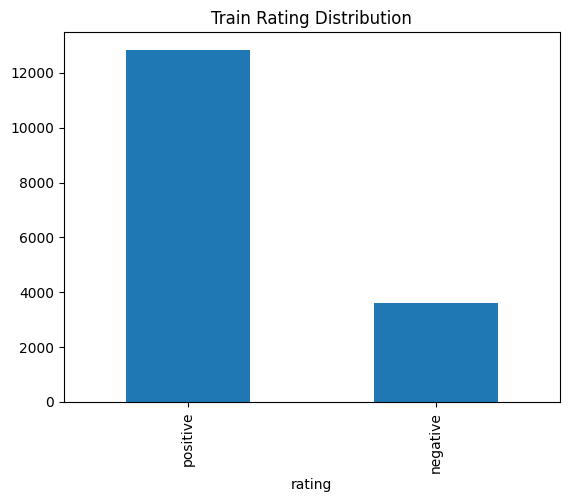

In [235]:
train['rating'].value_counts().plot(kind='bar', title='Train Rating Distribution')

<Axes: title={'center': 'Test Rating Distribution'}, xlabel='rating'>

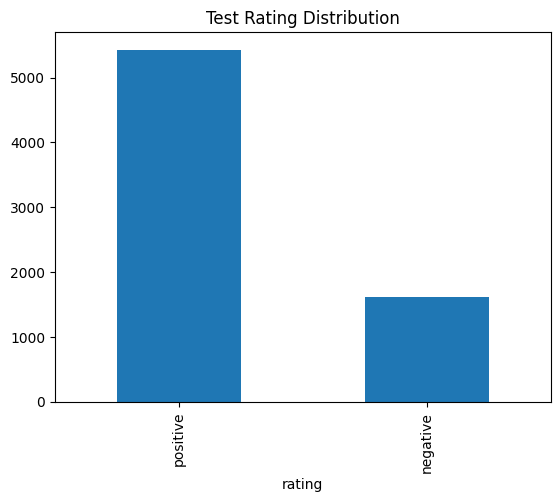

In [236]:
test['rating'].value_counts().plot(kind='bar', title='Test Rating Distribution')

### Feature Selection

In [237]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16442 entries, 22276 to 38303
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Price original                    16442 non-null  float64
 1   Windows                           16442 non-null  int32  
 2   Mac                               16442 non-null  int32  
 3   Linux                             16442 non-null  int32  
 4   Steam Deck                        16442 non-null  int32  
 5   Positive ratio                    16442 non-null  int64  
 6   Tags                              15198 non-null  object 
 7   Categories                        16442 non-null  object 
 8   Achievements                      16442 non-null  int64  
 9   Recommendations                   16442 non-null  int64  
 10  rating                            16442 non-null  object 
 11  Has full audio                    16442 non-null  int64  
 12  Has m

In [238]:
# Select relevant features
features = [
    'Price original', 
    'Has full audio', 'Has movie', 'Has DLC', 'Release Year',
    'languages_count', 'Developers_code', 'Publishers_code',
    'Language_english', 'Platform_count', 'Required age category_code',
    'Genre_Adventure', 'Genre_Casual', 'Genre_Indie', 
    'Category_Single-player', 'Category_Steam Achievements', 'Category_Steam Cloud'
]

X_train = train[features]
y_train = train['rating']
X_test = test[features]
y_test = test['rating']

In [239]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16442 entries, 22276 to 38303
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price original               16442 non-null  float64
 1   Has full audio               16442 non-null  int64  
 2   Has movie                    16442 non-null  int64  
 3   Has DLC                      16442 non-null  int32  
 4   Release Year                 16442 non-null  int32  
 5   languages_count              16442 non-null  int64  
 6   Developers_code              16442 non-null  int32  
 7   Publishers_code              16442 non-null  int32  
 8   Language_english             16442 non-null  int64  
 9   Platform_count               16442 non-null  int64  
 10  Required age category_code   16442 non-null  int32  
 11  Genre_Adventure              16442 non-null  int32  
 12  Genre_Casual                 16442 non-null  int32  
 13  Genre_Indie      

### SMOTE

In [240]:
# Use SMOTE for train 
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

<Axes: title={'center': 'Resampled Train Rating Distribution'}, xlabel='rating'>

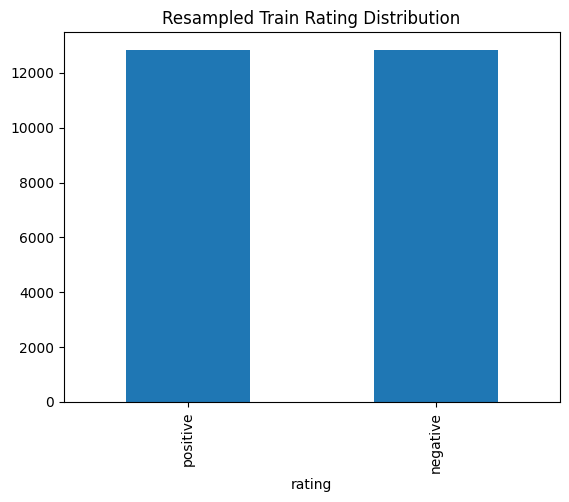

In [241]:
y_train_resampled.value_counts().plot(kind='bar', title='Resampled Train Rating Distribution')

## 7. MODELING

In [242]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

### LOGISTIC REGRESSION

----- Logistic Regression -----
              precision    recall  f1-score   support

    negative       0.28      0.42      0.34      1614
    positive       0.80      0.69      0.74      5428

    accuracy                           0.62      7042
   macro avg       0.54      0.55      0.54      7042
weighted avg       0.68      0.62      0.65      7042



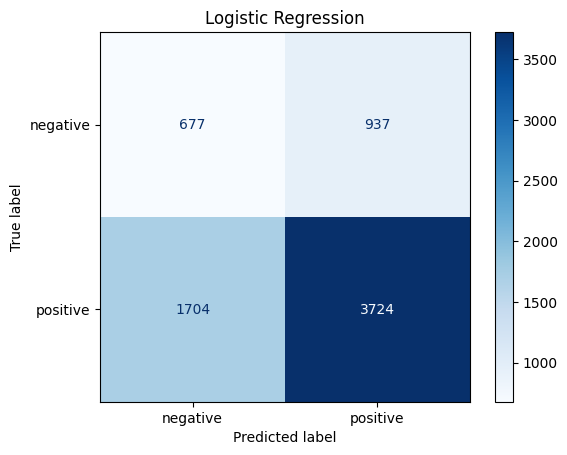

In [243]:
from sklearn.linear_model import LogisticRegression

model_logreg = LogisticRegression(max_iter=1000)
model_logreg.fit(X_train_resampled, y_train_resampled)

y_pred_logreg = model_logreg.predict(X_test)

print("----- Logistic Regression -----")
print(classification_report(y_test, y_pred_logreg, target_names=['negative', 'positive']))

cm = confusion_matrix(y_test, y_pred_logreg, labels=['negative', 'positive'])
ConfusionMatrixDisplay(cm, display_labels=['negative', 'positive']).plot(cmap="Blues")
plt.title("Logistic Regression")
plt.show()


=== Logistic Regression - TRAIN ===
              precision    recall  f1-score   support

    negative       0.68      0.70      0.69     12841
    positive       0.69      0.68      0.68     12841

    accuracy                           0.69     25682
   macro avg       0.69      0.69      0.69     25682
weighted avg       0.69      0.69      0.69     25682



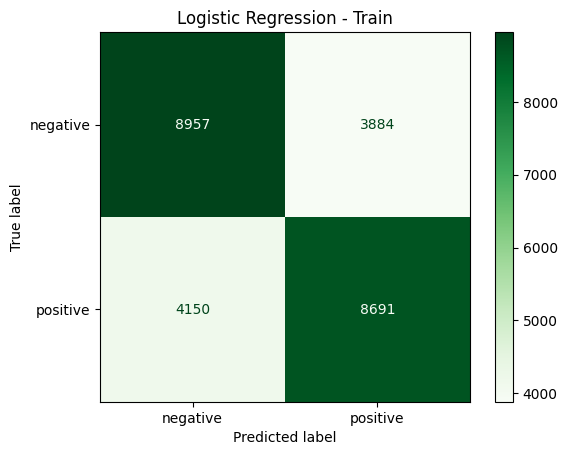

In [244]:
y_pred_train_log = model_logreg.predict(X_train_resampled)

print("=== Logistic Regression - TRAIN ===")
print(classification_report(y_train_resampled, y_pred_train_log, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_train_resampled, y_pred_train_log, display_labels=['negative', 'positive'], cmap="Greens")
plt.title("Logistic Regression - Train")
plt.show()

### DECISION TREE

=== Decision Tree - TRAIN ===
              precision    recall  f1-score   support

    negative       0.99      1.00      0.99     12841
    positive       1.00      0.99      0.99     12841

    accuracy                           0.99     25682
   macro avg       0.99      0.99      0.99     25682
weighted avg       0.99      0.99      0.99     25682



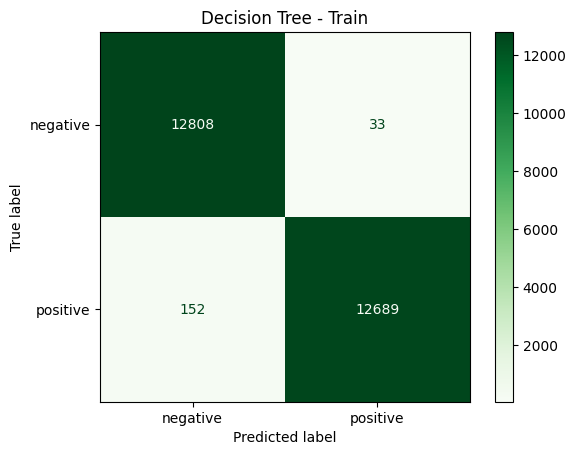

=== Decision Tree - TEST ===
              precision    recall  f1-score   support

    negative       0.35      0.43      0.39      1614
    positive       0.82      0.76      0.79      5428

    accuracy                           0.68      7042
   macro avg       0.58      0.60      0.59      7042
weighted avg       0.71      0.68      0.69      7042



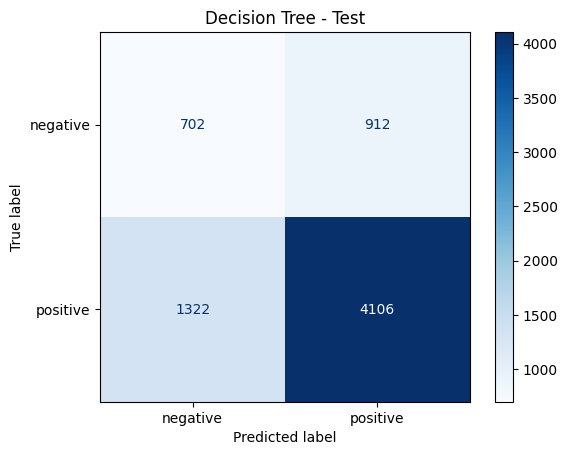

In [245]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(random_state=42)
model_tree.fit(X_train_resampled, y_train_resampled)

y_pred_train_tree = model_tree.predict(X_train_resampled)
y_pred_test_tree = model_tree.predict(X_test)

print("=== Decision Tree - TRAIN ===")
print(classification_report(y_train_resampled, y_pred_train_tree, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_train_resampled, y_pred_train_tree, display_labels=['negative', 'positive'], cmap="Greens")
plt.title("Decision Tree - Train")
plt.show()

print("=== Decision Tree - TEST ===")
print(classification_report(y_test, y_pred_test_tree, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_tree, display_labels=['negative', 'positive'], cmap="Blues")
plt.title("Decision Tree - Test")
plt.show()

### RANDOM FOREST

=== Random Forest - TRAIN ===
              precision    recall  f1-score   support

    negative       0.99      0.99      0.99     12841
    positive       0.99      0.99      0.99     12841

    accuracy                           0.99     25682
   macro avg       0.99      0.99      0.99     25682
weighted avg       0.99      0.99      0.99     25682



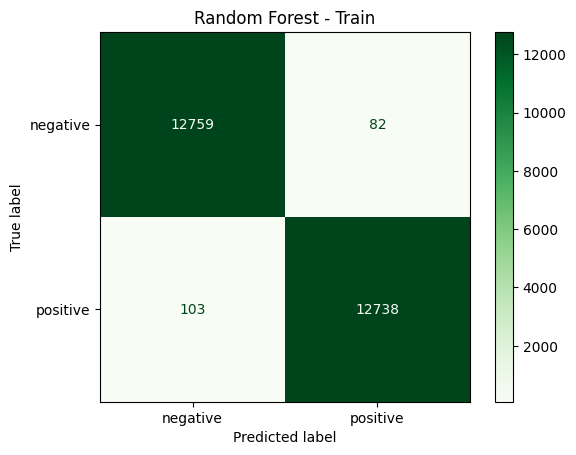

=== Random Forest - TEST ===
              precision    recall  f1-score   support

    negative       0.46      0.39      0.42      1614
    positive       0.83      0.86      0.85      5428

    accuracy                           0.76      7042
   macro avg       0.64      0.63      0.64      7042
weighted avg       0.74      0.76      0.75      7042



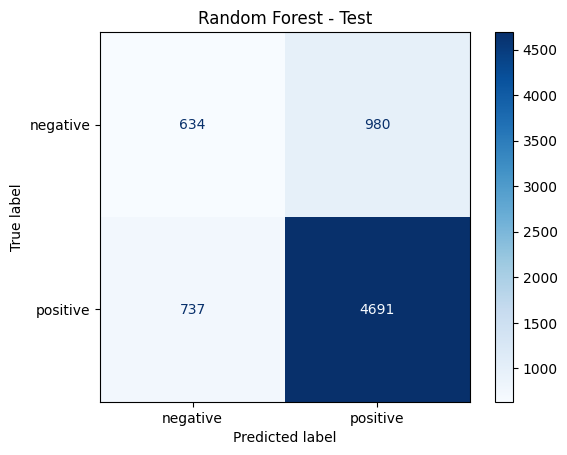

In [246]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_resampled, y_train_resampled)

y_pred_train_rf = model_rf.predict(X_train_resampled)
y_pred_test_rf = model_rf.predict(X_test)

print("=== Random Forest - TRAIN ===")
print(classification_report(y_train_resampled, y_pred_train_rf, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_train_resampled, y_pred_train_rf, display_labels=['negative', 'positive'], cmap="Greens")
plt.title("Random Forest - Train")
plt.show()

print("=== Random Forest - TEST ===")
print(classification_report(y_test, y_pred_test_rf, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_rf, display_labels=['negative', 'positive'], cmap="Blues")
plt.title("Random Forest - Test")
plt.show()


### KNN

=== KNN - TRAIN ===
              precision    recall  f1-score   support

    negative       0.81      0.92      0.86     12841
    positive       0.90      0.78      0.84     12841

    accuracy                           0.85     25682
   macro avg       0.85      0.85      0.85     25682
weighted avg       0.85      0.85      0.85     25682



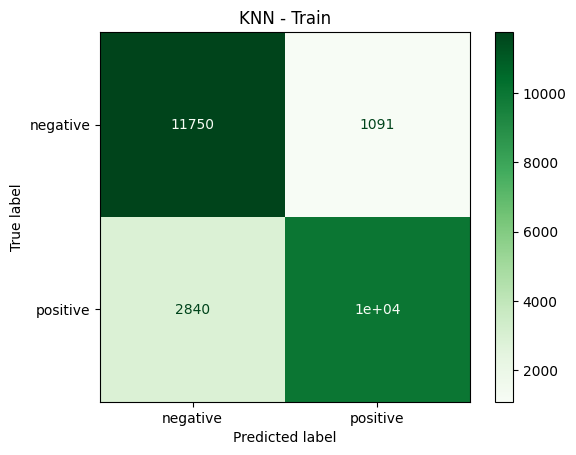

=== KNN - TEST ===
              precision    recall  f1-score   support

    negative       0.39      0.50      0.44      1614
    positive       0.84      0.77      0.80      5428

    accuracy                           0.71      7042
   macro avg       0.62      0.64      0.62      7042
weighted avg       0.74      0.71      0.72      7042



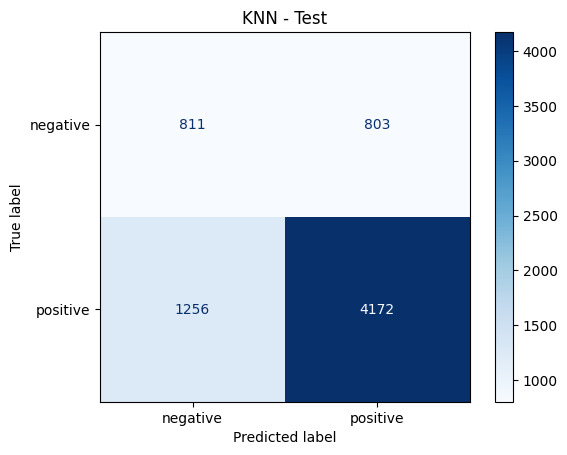

In [247]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train_resampled, y_train_resampled)

y_pred_train_knn = model_knn.predict(X_train_resampled)
y_pred_test_knn = model_knn.predict(X_test)

print("=== KNN - TRAIN ===")
print(classification_report(y_train_resampled, y_pred_train_knn, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_train_resampled, y_pred_train_knn, display_labels=['negative', 'positive'], cmap="Greens")
plt.title("KNN - Train")
plt.show()

print("=== KNN - TEST ===")
print(classification_report(y_test, y_pred_test_knn, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_knn, display_labels=['negative', 'positive'], cmap="Blues")
plt.title("KNN - Test")
plt.show()


### ADA BOOST

=== AdaBoost - TRAIN ===
              precision    recall  f1-score   support

    negative       0.75      0.77      0.76     12841
    positive       0.77      0.75      0.76     12841

    accuracy                           0.76     25682
   macro avg       0.76      0.76      0.76     25682
weighted avg       0.76      0.76      0.76     25682



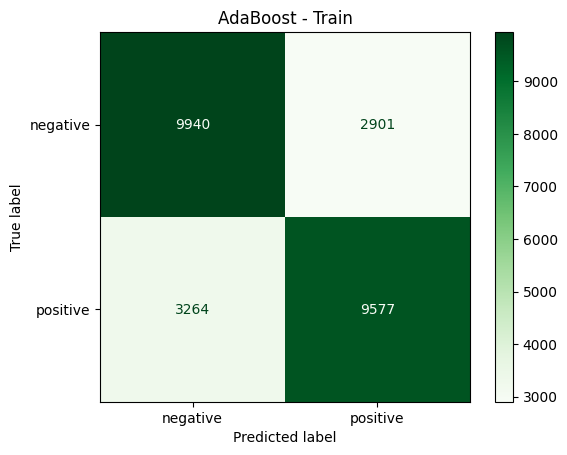

=== AdaBoost - TEST ===
              precision    recall  f1-score   support

    negative       0.37      0.49      0.42      1614
    positive       0.83      0.75      0.79      5428

    accuracy                           0.69      7042
   macro avg       0.60      0.62      0.60      7042
weighted avg       0.72      0.69      0.70      7042



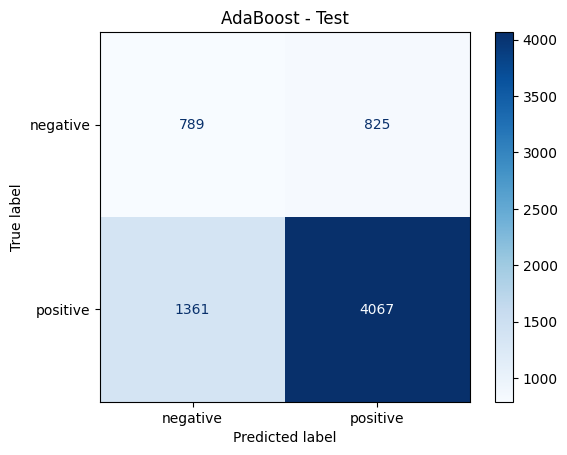

In [248]:
from sklearn.ensemble import AdaBoostClassifier

model_ada = AdaBoostClassifier(random_state=42)
model_ada.fit(X_train_resampled, y_train_resampled)

y_pred_train_ada = model_ada.predict(X_train_resampled)
y_pred_test_ada = model_ada.predict(X_test)

print("=== AdaBoost - TRAIN ===")
print(classification_report(y_train_resampled, y_pred_train_ada, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_train_resampled, y_pred_train_ada, display_labels=['negative', 'positive'], cmap="Greens")
plt.title("AdaBoost - Train")
plt.show()

print("=== AdaBoost - TEST ===")
print(classification_report(y_test, y_pred_test_ada, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_ada, display_labels=['negative', 'positive'], cmap="Blues")
plt.title("AdaBoost - Test")
plt.show()


### CATBOOST

=== CatBoost - TRAIN ===
              precision    recall  f1-score   support

    negative       0.91      0.83      0.87     12841
    positive       0.84      0.92      0.88     12841

    accuracy                           0.88     25682
   macro avg       0.88      0.88      0.87     25682
weighted avg       0.88      0.88      0.87     25682



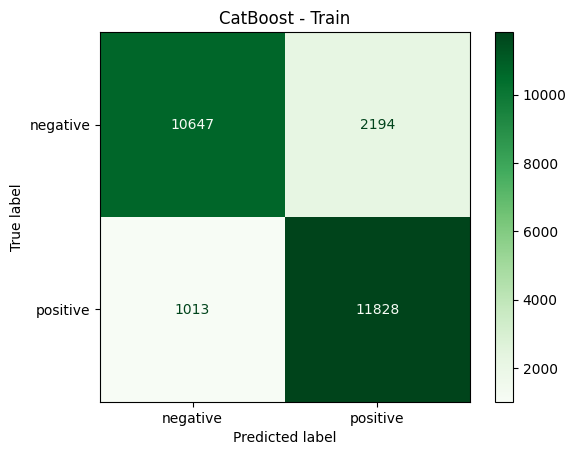

=== CatBoost - TEST ===
              precision    recall  f1-score   support

    negative       0.52      0.32      0.40      1614
    positive       0.82      0.91      0.86      5428

    accuracy                           0.78      7042
   macro avg       0.67      0.62      0.63      7042
weighted avg       0.75      0.78      0.76      7042



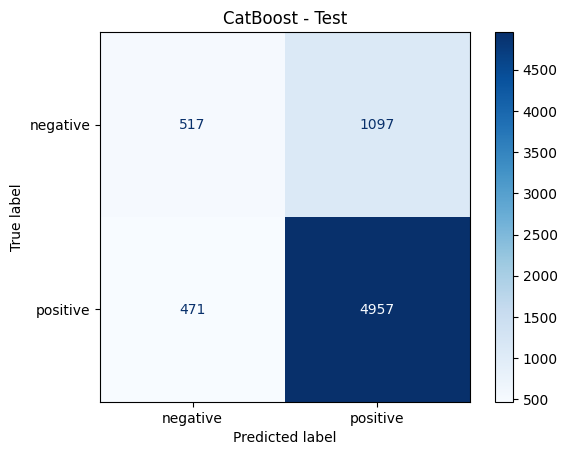

In [249]:
from catboost import CatBoostClassifier

model_cat = CatBoostClassifier(verbose=0, random_state=42)
model_cat.fit(X_train_resampled, y_train_resampled)

y_pred_train_cat = model_cat.predict(X_train_resampled)
y_pred_test_cat = model_cat.predict(X_test)

print("=== CatBoost - TRAIN ===")
print(classification_report(y_train_resampled, y_pred_train_cat, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_train_resampled, y_pred_train_cat, display_labels=['negative', 'positive'], cmap="Greens")
plt.title("CatBoost - Train")
plt.show()

print("=== CatBoost - TEST ===")
print(classification_report(y_test, y_pred_test_cat, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_cat, display_labels=['negative', 'positive'], cmap="Blues")
plt.title("CatBoost - Test")
plt.show()


# FINAL CLEANED CODE

## MANAGE DEPENDENCIES

In [250]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install sklearn
%pip install scikit-learn
%pip install seaborn
%pip install imblearn
%pip install catboost

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [251]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## EDA ON STEAM_1 AND STEAM_2

### EDA STEAM_1

In [252]:
# read converted big
df = pd.read_csv("data/converted_big.csv")
df.head(2)

,app_id,Name,Release date,Required age,Price,DLC count,Detailed description,About the game,Short description,Reviews,...,Positive,Negative,Estimated owners,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Peak CCU,Tags,discount
0,20200,Galactic Bowling,"Oct 21, 2008",0,19.99,0,Galactic Bowling is an exaggerated and stylize...,Galactic Bowling is an exaggerated and stylize...,Galactic Bowling is an exaggerated and stylize...,NaN,...,6,11,0 - 20000,0,0,0,0,0,"Indie,Casual,Sports,Bowling",NaN
1,655370,Train Bandit,"Oct 12, 2017",0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,THE LAW!! Looks to be a showdown atop a train....,THE LAW!! Looks to be a showdown atop a train....,NaN,...,53,5,0 - 20000,0,0,0,0,0,"Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",NaN


#### BASIC

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111452 entries, 0 to 111451
Data columns (total 43 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   app_id                      111452 non-null  int64  
 1   Name                        111446 non-null  object 
 2   Release date                111452 non-null  object 
 3   Required age                111452 non-null  int64  
 4   Price                       111452 non-null  float64
 5   DLC count                   111452 non-null  int64  
 6   Detailed description        104995 non-null  object 
 7   About the game              104969 non-null  object 
 8   Short description           105076 non-null  object 
 9   Reviews                     10624 non-null   object 
 10  Header image                111452 non-null  object 
 11  Website                     46458 non-null   object 
 12  Support url                 50759 non-null   object 
 13  Support email 

In [254]:
df.columns

Index(['app_id', 'Name', 'Release date', 'Required age', 'Price', 'DLC count',
       'Detailed description', 'About the game', 'Short description',
       'Reviews', 'Header image', 'Website', 'Support url', 'Support email',
       'Windows', 'Mac', 'Linux', 'Metacritic score', 'Metacritic url',
       'Achievements', 'Recommendations', 'Notes', 'Supported languages',
       'Full audio languages', 'Packages', 'Developers', 'Publishers',
       'Categories', 'Genres', 'Screenshots', 'Movies', 'User score',
       'Score rank', 'Positive', 'Negative', 'Estimated owners',
       'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Peak CCU',
       'Tags', 'discount'],
      dtype='object')

In [255]:
df.shape

(111452, 43)

#### MISSING VALUE IDENTIFICATION

In [256]:
missing_values = df.isna().sum()
missing_values = missing_values[missing_values > 0]
missing_values = pd.DataFrame(missing_values)
missing_values.columns = ['Missing Values']
missing_values['Percentage'] = (missing_values['Missing Values'] / df.shape[0]) * 100
missing_values = missing_values.sort_values(by='Missing Values', ascending=False)
missing_values

,Missing Values,Percentage
Score rank,111408,99.960521
Metacritic url,107447,96.406525
Reviews,100828,90.467645
discount,97410,87.400854
Notes,93003,83.446686
Full audio languages,65823,59.059505
Website,64994,58.315687
Support url,60693,54.456627
Tags,37423,33.577684
Support email,19025,17.070129


In [257]:
df['Website']

0              http://www.galacticbowling.net
1                      http://trainbandit.com
2                                         NaN
3                    https://henosisgame.com/
4         https://www.unusual-games.com/home/
                         ...                 
111447                                    NaN
111448         https://www.hentaipanda.games/
111449                                    NaN
111450                   https://accubow.com/
111451               https://www.ledxfun.com/
Name: Website, Length: 111452, dtype: object

In [258]:
df['Header image']

0         https://cdn.akamai.steamstatic.com/steam/apps/...
1         https://cdn.akamai.steamstatic.com/steam/apps/...
2         https://cdn.akamai.steamstatic.com/steam/apps/...
3         https://cdn.akamai.steamstatic.com/steam/apps/...
4         https://cdn.akamai.steamstatic.com/steam/apps/...
                                ...                        
111447    https://shared.akamai.steamstatic.com/store_it...
111448    https://shared.akamai.steamstatic.com/store_it...
111449    https://shared.akamai.steamstatic.com/store_it...
111450    https://shared.akamai.steamstatic.com/store_it...
111451    https://shared.akamai.steamstatic.com/store_it...
Name: Header image, Length: 111452, dtype: object

In [259]:
df.drop(columns=['Header image', 'Website', 'Support url', 'Support email', 'Metacritic url'], inplace=True)

df.columns

Index(['app_id', 'Name', 'Release date', 'Required age', 'Price', 'DLC count',
       'Detailed description', 'About the game', 'Short description',
       'Reviews', 'Windows', 'Mac', 'Linux', 'Metacritic score',
       'Achievements', 'Recommendations', 'Notes', 'Supported languages',
       'Full audio languages', 'Packages', 'Developers', 'Publishers',
       'Categories', 'Genres', 'Screenshots', 'Movies', 'User score',
       'Score rank', 'Positive', 'Negative', 'Estimated owners',
       'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Peak CCU',
       'Tags', 'discount'],
      dtype='object')

In [260]:
steam1 = df.copy()

### EDA STEAM_2

In [261]:
steam2 = pd.read_csv('data/games_small.csv')
steam2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50872 non-null  int64  
 1   title           50872 non-null  object 
 2   date_release    50872 non-null  object 
 3   win             50872 non-null  bool   
 4   mac             50872 non-null  bool   
 5   linux           50872 non-null  bool   
 6   rating          50872 non-null  object 
 7   positive_ratio  50872 non-null  int64  
 8   user_reviews    50872 non-null  int64  
 9   price_final     50872 non-null  float64
 10  price_original  50872 non-null  float64
 11  discount        50872 non-null  float64
 12  steam_deck      50872 non-null  bool   
dtypes: bool(4), float64(3), int64(3), object(3)
memory usage: 3.7+ MB


In [262]:
steam2.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True


In [263]:
steam1[steam1['app_id'] == 13500]

,app_id,Name,Release date,Required age,Price,DLC count,Detailed description,About the game,Short description,Reviews,...,Positive,Negative,Estimated owners,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Peak CCU,Tags,discount
31285,13500,Prince of Persia: Warrior Within™,"Nov 21, 2008",17,9.99,0,Enter the dark underworld of Prince of Persia ...,Enter the dark underworld of Prince of Persia ...,Enter the dark underworld of Prince of Persia ...,NaN,...,1807,307,200000 - 500000,61,10,77,10,18,"Action,Adventure,Parkour,Third Person,Great So...",NaN


In [264]:
steam2[steam2['app_id'] == 13500]

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True


## MERGE STEAM_1 AND STEAM_2

In [265]:
steam1.drop(columns=['Release date', 'Price', 'discount'], inplace=True)
steam1.columns

Index(['app_id', 'Name', 'Required age', 'DLC count', 'Detailed description',
       'About the game', 'Short description', 'Reviews', 'Windows', 'Mac',
       'Linux', 'Metacritic score', 'Achievements', 'Recommendations', 'Notes',
       'Supported languages', 'Full audio languages', 'Packages', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Screenshots', 'Movies',
       'User score', 'Score rank', 'Positive', 'Negative', 'Estimated owners',
       'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Peak CCU',
       'Tags'],
      dtype='object')

In [266]:
steam2.drop(columns=['title', 'win', 'mac', 'linux'], inplace=True)
steam2.columns

Index(['app_id', 'date_release', 'rating', 'positive_ratio', 'user_reviews',
       'price_final', 'price_original', 'discount', 'steam_deck'],
      dtype='object')

In [267]:
merged_df = pd.merge(steam1, steam2, on='app_id', how='inner')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41170 entries, 0 to 41169
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   app_id                      41170 non-null  int64  
 1   Name                        41170 non-null  object 
 2   Required age                41170 non-null  int64  
 3   DLC count                   41170 non-null  int64  
 4   Detailed description        41123 non-null  object 
 5   About the game              41113 non-null  object 
 6   Short description           41156 non-null  object 
 7   Reviews                     7920 non-null   object 
 8   Windows                     41170 non-null  bool   
 9   Mac                         41170 non-null  bool   
 10  Linux                       41170 non-null  bool   
 11  Metacritic score            41170 non-null  int64  
 12  Achievements                41170 non-null  int64  
 13  Recommendations             411

In [268]:
# Rename columns so it in same name format
merged_df.rename(columns={
    'app_id': 'App ID',
    'date_release': 'Release date',
    'positive_ratio': 'Positive ratio',
    'price_final': 'Price final',
    'price_original': 'Price original',
    'discount': 'Discount',
    'steam_deck': 'Steam Deck',
}, inplace=True)

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41170 entries, 0 to 41169
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   App ID                      41170 non-null  int64  
 1   Name                        41170 non-null  object 
 2   Required age                41170 non-null  int64  
 3   DLC count                   41170 non-null  int64  
 4   Detailed description        41123 non-null  object 
 5   About the game              41113 non-null  object 
 6   Short description           41156 non-null  object 
 7   Reviews                     7920 non-null   object 
 8   Windows                     41170 non-null  bool   
 9   Mac                         41170 non-null  bool   
 10  Linux                       41170 non-null  bool   
 11  Metacritic score            41170 non-null  int64  
 12  Achievements                41170 non-null  int64  
 13  Recommendations             411

In [269]:
merged_df.to_csv("data/merged_steam_data.csv", index=False)

## EDA MERGED DATA

In [270]:
df = pd.read_csv("data/merged_steam_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41170 entries, 0 to 41169
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   App ID                      41170 non-null  int64  
 1   Name                        41170 non-null  object 
 2   Required age                41170 non-null  int64  
 3   DLC count                   41170 non-null  int64  
 4   Detailed description        41123 non-null  object 
 5   About the game              41113 non-null  object 
 6   Short description           41156 non-null  object 
 7   Reviews                     7920 non-null   object 
 8   Windows                     41170 non-null  bool   
 9   Mac                         41170 non-null  bool   
 10  Linux                       41170 non-null  bool   
 11  Metacritic score            41170 non-null  int64  
 12  Achievements                41170 non-null  int64  
 13  Recommendations             411

In [271]:
print(df.duplicated().sum())

0


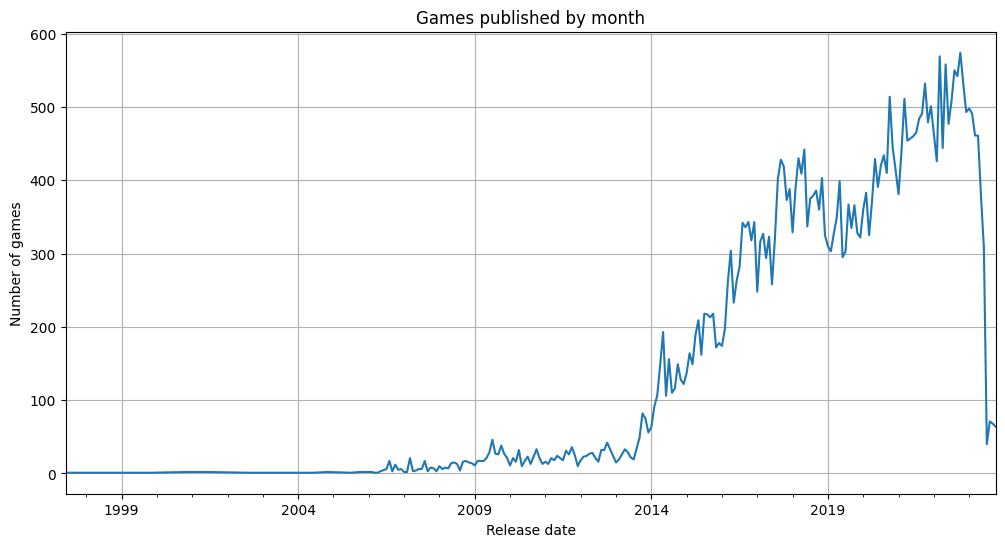

In [272]:
df['Release date'] = pd.to_datetime(df['Release date'], errors='coerce')

plt.figure(figsize=(12, 6))
df.groupby(df['Release date'].dt.to_period('M')).size().plot(kind='line')
plt.title('Games published by month')
plt.ylabel('Number of games')
plt.grid(True)
plt.show()

### PRICE

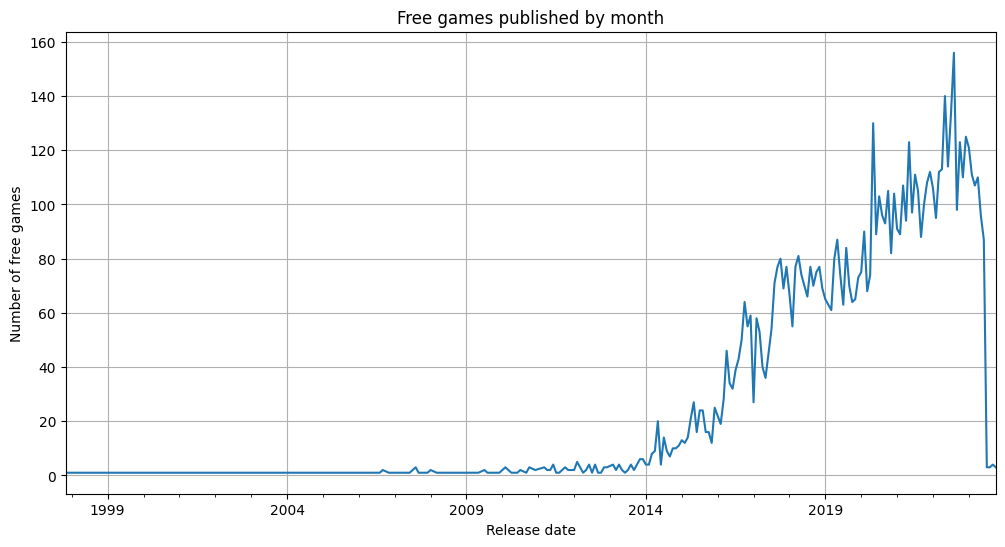

In [273]:
plt.figure(figsize=(12, 6))
df[df['Price final'] == 0].groupby(df['Release date'].dt.to_period('M')).size().plot(kind='line')
plt.title('Free games published by month')
plt.ylabel('Number of free games')
plt.grid(True)
plt.show()

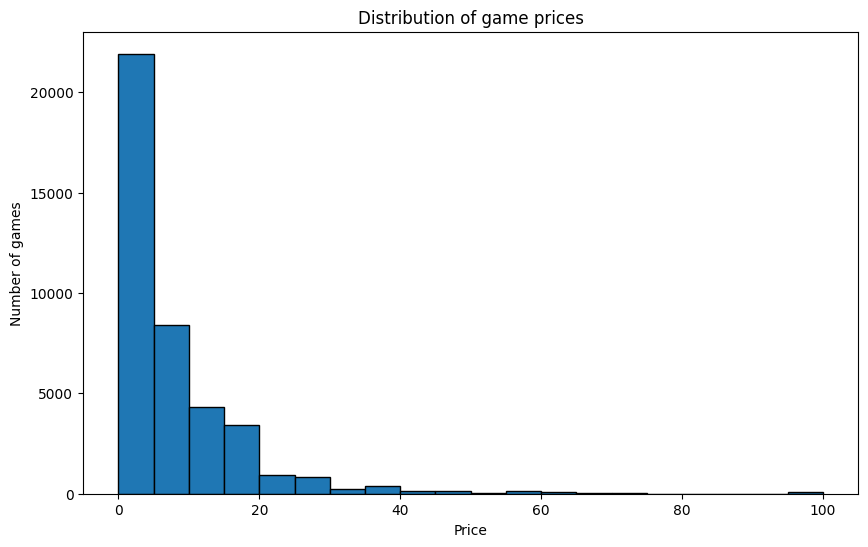

In [274]:
bins = range(0, 105, 5)
plt.figure(figsize=(10, 6))
plt.hist(df['Price final'], bins=bins, edgecolor='black')
plt.title('Distribution of game prices')
plt.xlabel('Price')
plt.ylabel('Number of games')
plt.show()

In [275]:
print("Free games: ", df[df['Price final'] == 0].shape[0])
print("Paid games: ", df[df['Price final'] > 0].shape[0])
print("Percentage of free games: ", round(df[df['Price final'] == 0].shape[0] / df.shape[0], 2) * 100)
print("Percentage of paid games: ", round(df[df['Price final'] > 0].shape[0] / df.shape[0], 2) * 100)

Free games:  7748
Paid games:  33422
Percentage of free games:  19.0
Percentage of paid games:  81.0


In [276]:
print("Free games: ", df[df['Price original'] == 0].shape[0])
print("Paid games: ", df[df['Price original'] > 0].shape[0])
print("Percentage of free games: ", round(df[df['Price original'] == 0].shape[0] / df.shape[0], 2) * 100)
print("Percentage of paid games: ", round(df[df['Price original'] > 0].shape[0] / df.shape[0], 2) * 100)

Free games:  8554
Paid games:  32616
Percentage of free games:  21.0
Percentage of paid games:  79.0


In [277]:
print(df['Price original'].max())
df[df['Price original'] == df['Price original'].max()]

299.9


,App ID,Name,Required age,DLC count,Detailed description,About the game,Short description,Reviews,Windows,Mac,...,Peak CCU,Tags,Release date,rating,Positive ratio,user_reviews,Price final,Price original,Discount,Steam Deck
33552,253670,Aartform Curvy 3D 3.0,0,0,Curvy 3D 4 Curvy 3D 4 is out now! \\\ Aartform...,Curvy 3D 3.0 is an innovative sculpting progra...,Curvy 3D 3.0 is an innovative sculpting progra...,NaN,True,False,...,0,Animation & Modeling,2013-11-12,Mixed,69,39,299.9,299.9,0.0,True


### DLC

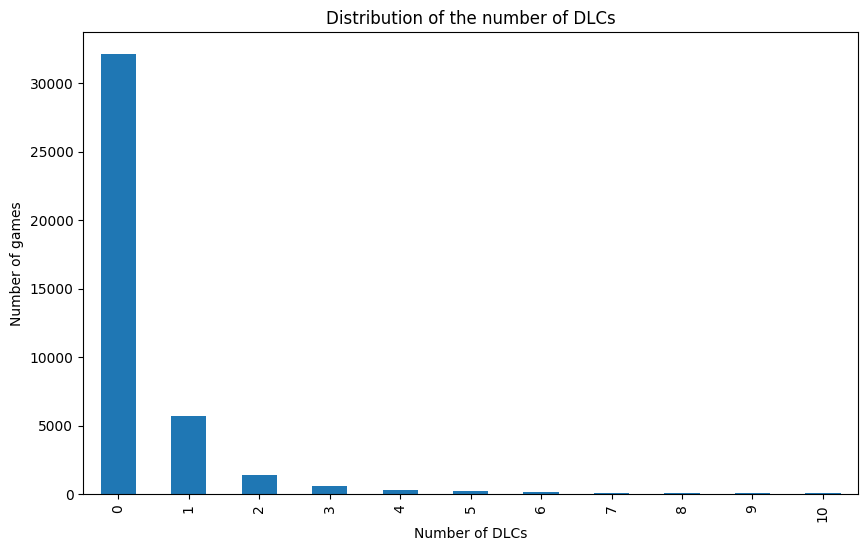

In [278]:
dlc_counts = df['DLC count'].value_counts().sort_index()
dlc_counts = dlc_counts[dlc_counts.index <= 10]
plt.figure(figsize=(10, 6))
dlc_counts.plot(kind='bar')
plt.title('Distribution of the number of DLCs')
plt.xlabel('Number of DLCs')
plt.ylabel('Number of games')
plt.show()

In [279]:
df[df['DLC count'] == df['DLC count'].max()].head()

,App ID,Name,Required age,DLC count,Detailed description,About the game,Short description,Reviews,Windows,Mac,...,Peak CCU,Tags,Release date,rating,Positive ratio,user_reviews,Price final,Price original,Discount,Steam Deck
19198,1196310,Fantasy Grounds Unity,0,2366,Featured DLC / D&amp;D Essentials D&amp;D Adve...,Prep Less. Play Better. Fantasy Grounds is kno...,Prep Less. Play Better. Exciting upgrades awai...,NaN,True,True,...,145,"RPG,Dungeons & Dragons,Strategy,Indie,Software...",2020-11-05,Very Positive,83,527,30.0,0.0,0.0,True


## PRE-PROCESSING

In [280]:
df = pd.read_csv('data/merged_steam_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41170 entries, 0 to 41169
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   App ID                      41170 non-null  int64  
 1   Name                        41170 non-null  object 
 2   Required age                41170 non-null  int64  
 3   DLC count                   41170 non-null  int64  
 4   Detailed description        41123 non-null  object 
 5   About the game              41113 non-null  object 
 6   Short description           41156 non-null  object 
 7   Reviews                     7920 non-null   object 
 8   Windows                     41170 non-null  bool   
 9   Mac                         41170 non-null  bool   
 10  Linux                       41170 non-null  bool   
 11  Metacritic score            41170 non-null  int64  
 12  Achievements                41170 non-null  int64  
 13  Recommendations             411

In [281]:
selected_columns = [
    'Release date', 'Price original', 'DLC count', 'Required age', 'Windows', 'Mac', 'Linux', 'Steam Deck',
    'Supported languages', 'Full audio languages', 'Developers', 'Publishers',
    'Movies', 'rating', 'Positive ratio', 'Genres', 'Tags', 'Categories', 'Achievements', 'Recommendations'
]

df_filtered = df[selected_columns]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41170 entries, 0 to 41169
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Release date          41170 non-null  object 
 1   Price original        41170 non-null  float64
 2   DLC count             41170 non-null  int64  
 3   Required age          41170 non-null  int64  
 4   Windows               41170 non-null  bool   
 5   Mac                   41170 non-null  bool   
 6   Linux                 41170 non-null  bool   
 7   Steam Deck            41170 non-null  bool   
 8   Supported languages   41157 non-null  object 
 9   Full audio languages  19288 non-null  object 
 10  Developers            41096 non-null  object 
 11  Publishers            40949 non-null  object 
 12  Movies                39366 non-null  object 
 13  rating                41170 non-null  object 
 14  Positive ratio        41170 non-null  int64  
 15  Genres             

In [282]:
dev_counts = df_filtered.groupby('Developers').agg(
    count=('Developers', 'count'),
    mean_positive_ratio=('Positive ratio', 'mean')
).reset_index()

dev_counts_sorted = dev_counts.sort_values(['count', 'mean_positive_ratio'], ascending=[False, False])
top_10k_developers = dev_counts_sorted.head(10000)['Developers'].tolist()

df_filtered = df_filtered[df_filtered['Developers'].isin(top_10k_developers)]

pub_counts = df_filtered.groupby('Publishers').agg(
    count=('Publishers', 'count'),
    mean_positive_ratio=('Positive ratio', 'mean')
).reset_index()

pub_counts_sorted = pub_counts.sort_values(['count', 'mean_positive_ratio'], ascending=[False, False])
top_10k_publishers = pub_counts_sorted.head(10000)['Publishers'].tolist()

df_filtered = df_filtered[df_filtered['Publishers'].isin(top_10k_publishers)]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25512 entries, 1 to 41168
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Release date          25512 non-null  object 
 1   Price original        25512 non-null  float64
 2   DLC count             25512 non-null  int64  
 3   Required age          25512 non-null  int64  
 4   Windows               25512 non-null  bool   
 5   Mac                   25512 non-null  bool   
 6   Linux                 25512 non-null  bool   
 7   Steam Deck            25512 non-null  bool   
 8   Supported languages   25511 non-null  object 
 9   Full audio languages  11616 non-null  object 
 10  Developers            25512 non-null  object 
 11  Publishers            25512 non-null  object 
 12  Movies                24251 non-null  object 
 13  rating                25512 non-null  object 
 14  Positive ratio        25512 non-null  int64  
 15  Genres                25

In [283]:
df_filtered.to_csv("data/top_10_k.csv", index=False)

In [284]:
from sklearn.model_selection import train_test_split

X = df_filtered.drop(columns=['rating'])
y = df_filtered['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [285]:
train = pd.concat([X_train, y_train], axis=1)
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17858 entries, 12993 to 38280
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Release date          17858 non-null  object 
 1   Price original        17858 non-null  float64
 2   DLC count             17858 non-null  int64  
 3   Required age          17858 non-null  int64  
 4   Windows               17858 non-null  bool   
 5   Mac                   17858 non-null  bool   
 6   Linux                 17858 non-null  bool   
 7   Steam Deck            17858 non-null  bool   
 8   Supported languages   17857 non-null  object 
 9   Full audio languages  8186 non-null   object 
 10  Developers            17858 non-null  object 
 11  Publishers            17858 non-null  object 
 12  Movies                16945 non-null  object 
 13  Positive ratio        17858 non-null  int64  
 14  Genres                17844 non-null  object 
 15  Tags                

In [286]:
test = pd.concat([X_test, y_test], axis=1)
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7654 entries, 19860 to 40177
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Release date          7654 non-null   object 
 1   Price original        7654 non-null   float64
 2   DLC count             7654 non-null   int64  
 3   Required age          7654 non-null   int64  
 4   Windows               7654 non-null   bool   
 5   Mac                   7654 non-null   bool   
 6   Linux                 7654 non-null   bool   
 7   Steam Deck            7654 non-null   bool   
 8   Supported languages   7654 non-null   object 
 9   Full audio languages  3430 non-null   object 
 10  Developers            7654 non-null   object 
 11  Publishers            7654 non-null   object 
 12  Movies                7306 non-null   object 
 13  Positive ratio        7654 non-null   int64  
 14  Genres                7643 non-null   object 
 15  Tags                 

In [287]:
missing_values = train.isna().sum()
missing_values = missing_values[missing_values > 0]
missing_values = pd.DataFrame(missing_values)
missing_values.columns = ['Missing Values']
missing_values['Percentage'] = (missing_values['Missing Values'] / train.shape[0]) * 100
missing_values = missing_values.sort_values(by='Missing Values', ascending=False)
missing_values

,Missing Values,Percentage
Full audio languages,9672,54.160600
Tags,1364,7.638033
Movies,913,5.112555
Categories,204,1.142345
Genres,14,0.078396
Supported languages,1,0.005600


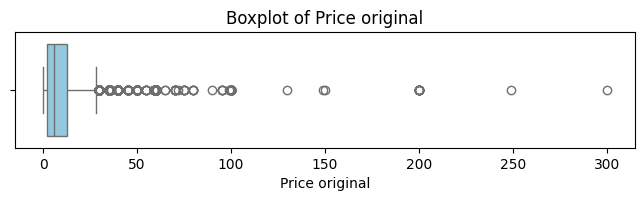

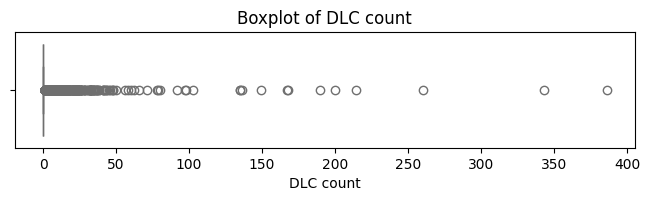

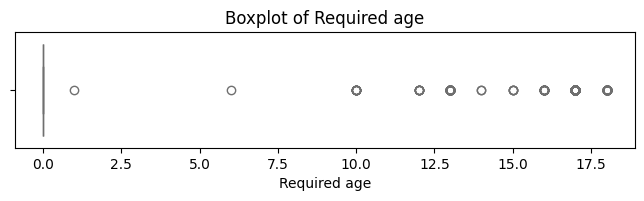

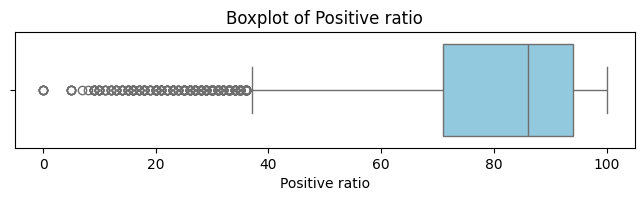

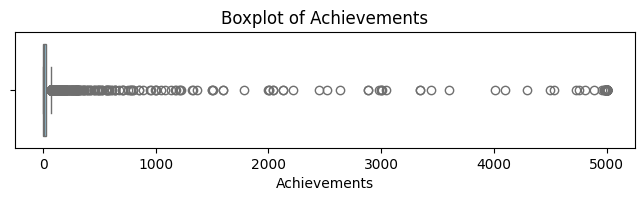

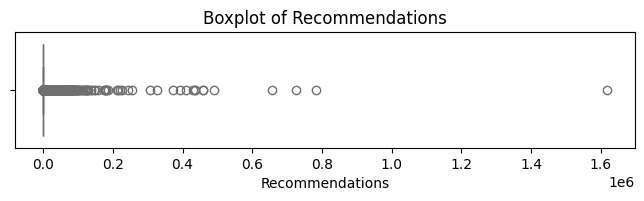

In [288]:
num_cols = train.select_dtypes(include=[np.number]).columns.tolist()
for col in num_cols:
    plt.figure(figsize=(8, 1.5))
    sns.boxplot(x=train[col], color="skyblue")
    plt.title(f"Boxplot of {col}")
    plt.show()

In [289]:
for col in num_cols:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = train[(train[col] < lower_bound) | (train[col] > upper_bound)][col]
    print(f"{col}: {outliers.count()} outliers ({100 * outliers.count() / train.shape[0]:.2f}%)")

Price original: 1046 outliers (5.86%)
DLC count: 4352 outliers (24.37%)
Required age: 542 outliers (3.04%)
Positive ratio: 436 outliers (2.44%)
Achievements: 970 outliers (5.43%)
Recommendations: 2824 outliers (15.81%)


In [290]:
train['Required age'].sort_values(ascending=True).unique()

array([ 0,  1,  6, 10, 12, 13, 14, 15, 16, 17, 18], dtype=int64)

In [291]:
train['Required age'].value_counts()

Required age
0     17316
17      365
13       67
18       62
16       23
10       10
12        7
15        4
14        2
6         1
1         1
Name: count, dtype: int64

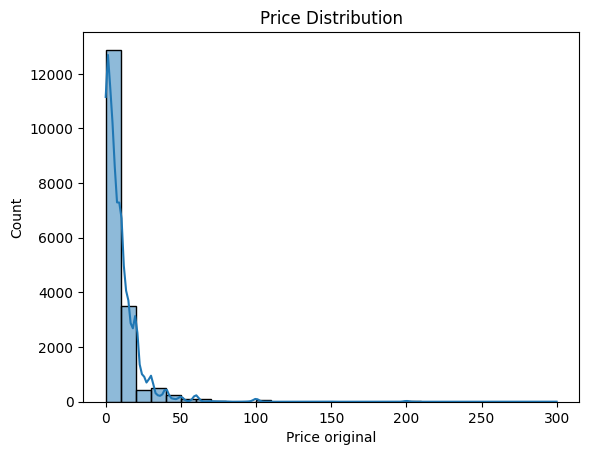

In [292]:
sns.histplot(train['Price original'].dropna(), kde=True, bins=30)
plt.title('Price Distribution')
plt.show()

In [293]:
print(train['Price original'].describe())

count    17858.000000
mean         9.397767
std         12.668765
min          0.000000
25%          1.990000
50%          5.990000
75%         12.990000
max        299.900000
Name: Price original, dtype: float64


In [294]:
Q1 = train['Price original'].quantile(0.25)
Q3 = train['Price original'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
train[(train['Price original'] < lower) | (train['Price original'] > upper)].sort_values(by='Price original', ascending=False).head(15)

,Release date,Price original,DLC count,Required age,Windows,Mac,Linux,Steam Deck,Supported languages,Full audio languages,Developers,Publishers,Movies,Positive ratio,Genres,Tags,Categories,Achievements,Recommendations,rating
33552,2013-11-12,299.90,0,0,True,False,False,True,English,NaN,Aartform,Aartform,http://cdn.akamai.steamstatic.com/steam/apps/2...,69,Animation & Modeling,Animation & Modeling,Single-player,0,0,Mixed
37546,2022-11-01,249.00,0,0,True,False,False,True,"English,French,German,Spanish - Spain",NaN,MAGIX Software GmbH,MAGIX Software GmbH,http://cdn.akamai.steamstatic.com/steam/apps/2...,66,Video Production,"Video Production,Software",NaN,0,0,Mixed
39674,2023-03-22,199.99,0,0,True,True,True,True,"English,French,Italian,German,Spanish - Spain,...",NaN,Aztech,"Azerbaijan Technology,Aztech",http://cdn.akamai.steamstatic.com/steam/apps/2...,100,"Action,Adventure,Casual,Indie,Racing,RPG,Simul...",NaN,"Single-player,Steam Achievements,Steam Leaderb...",6,0,Positive
33133,2016-02-02,199.99,0,0,True,False,False,True,"English,Italian,Japanese,Simplified Chinese,Ge...",NaN,3Dflow SRL,3Dflow SRL,http://cdn.akamai.steamstatic.com/steam/apps/2...,96,"Animation & Modeling,Design & Illustration,Vid...","Video Production,Animation & Modeling,Design &...",Steam Trading Cards,0,0,Very Positive
38224,2022-12-17,199.99,0,0,True,True,True,True,"English,French,Italian,German,Spanish - Spain,...",NaN,Top-Down Games,Hede,http://cdn.akamai.steamstatic.com/steam/apps/2...,75,"Action,Adventure,Casual,Indie,RPG,Simulation,S...",NaN,"Single-player,Steam Achievements,Steam Leaderb...",6,0,Mostly Positive
7116,2021-09-09,199.99,0,0,True,False,False,True,"English,French,German,Spanish - Spain",NaN,MAGIX Software GmbH,MAGIX Software GmbH,http://cdn.akamai.steamstatic.com/steam/apps/2...,75,Video Production,"Video Production,Psychological Horror",NaN,0,0,Mostly Positive
36855,2022-09-28,199.99,0,0,True,False,False,True,English,NaN,"Atomic Fabrik,Cristian Manolachi","Atomic Fabrik,Cristian Manolachi",http://cdn.akamai.steamstatic.com/steam/apps/2...,83,"Adventure,Casual,Indie,Simulation,Strategy","Strategy,Adventure,Casual,Simulation,Singlepla...","Single-player,Partial Controller Support,Remot...",0,0,Positive
39277,2023-02-21,199.99,0,0,True,True,True,True,"English,French,Italian,German,Spanish - Spain,...",NaN,Top-Down Games,Hede,http://cdn.akamai.steamstatic.com/steam/apps/2...,78,"Action,Adventure,Casual,Indie,Racing,RPG,Simul...",NaN,"Single-player,Steam Achievements,Steam Leaderb...",6,0,Mostly Positive
40478,2023-05-23,199.99,0,0,True,True,True,True,"English,French,Italian,German,Spanish - Spain,...",NaN,PUZZLE Games,Hede,http://cdn.akamai.steamstatic.com/steam/apps/2...,100,"Action,Adventure,Casual,Indie,Racing,RPG,Simul...",NaN,"Single-player,Steam Achievements,Steam Leaderb...",6,0,Positive
39621,2023-03-23,199.99,0,0,True,True,True,True,"English,French,Italian,German,Spanish - Spain,...",NaN,Top-Down Games,Hede,http://cdn.akamai.steamstatic.com/steam/apps/2...,90,"Action,Adventure,Casual,Indie,Massively Multip...",NaN,"Single-player,Steam Achievements,Steam Leaderb...",6,0,Positive


In [295]:
def parse_tags(tags):
    if pd.isna(tags):
        return []
    return [tag.strip() for tag in tags.split(',')]

unique_tags = set()
for tags in train['Tags'].dropna():
    parsed_tags = parse_tags(tags)
    unique_tags.update(parsed_tags)

unique_tags_list = sorted(unique_tags)
print("Unique Tags:")
for tag in unique_tags_list:
    print(tag)

Unique Tags:
1980s
1990's
2.5D
2D
2D Fighter
2D Platformer
360 Video
3D
3D Fighter
3D Platformer
3D Vision
4 Player Local
4X
6DOF
8-bit Music
ATV
Abstract
Action
Action RPG
Action RTS
Action Roguelike
Action-Adventure
Addictive
Adventure
Agriculture
Aliens
Alternate History
Ambient
America
Animation & Modeling
Anime
Arcade
Archery
Arena Shooter
Artificial Intelligence
Assassin
Asymmetric VR
Asynchronous Multiplayer
Atmospheric
Audio Production
Auto Battler
Automation
Automobile Sim
BMX
Base-Building
Baseball
Based On A Novel
Basketball
Battle Royale
Beat 'em up
Beautiful
Benchmark
Bikes
Blood
Board Game
Boss Rush
Bowling
Boxing
Building
Bullet Hell
Bullet Time
CRPG
Capitalism
Card Battler
Card Game
Cartoon
Cartoony
Casual
Cats
Character Action Game
Character Customization
Chess
Choices Matter
Choose Your Own Adventure
Cinematic
City Builder
Class-Based
Classic
Clicker
Co-op
Co-op Campaign
Cold War
Collectathon
Colony Sim
Colorful
Combat
Combat Racing
Comedy
Comic Book
Competitive
Consp

In [296]:
def parse_genres(genres):
    if pd.isna(genres):
        return []
    return [genre.strip() for genre in genres.split(',')]

unique_genres = set()
for genres in train['Genres'].dropna():
    parsed_genres = parse_genres(genres)
    unique_genres.update(parsed_genres)

unique_genres_list = sorted(unique_genres)
print("Unique Genres:")
for genre in unique_genres_list:
    print(genre)

Unique Genres:
Accounting
Action
Adventure
Animation & Modeling
Audio Production
Casual
Design & Illustration
Early Access
Education
Free to Play
Game Development
Gore
Indie
Massively Multiplayer
Nudity
Photo Editing
RPG
Racing
Sexual Content
Simulation
Software Training
Sports
Strategy
Utilities
Video Production
Violent
Web Publishing


In [297]:
def parse_categories(categories):
    if pd.isna(categories):
        return []
    return [category.strip() for category in categories.split(',')]

unique_categories = set()
for categories in train['Categories'].dropna():
    parsed_categories = parse_categories(categories)
    unique_categories.update(parsed_categories)
    
unique_categories_list = sorted(unique_categories)
print("Unique Categories:")
for category in unique_categories_list:
    print(category)

Unique Categories:
Captions available
Co-op
Commentary available
Cross-Platform Multiplayer
Full controller support
HDR available
In-App Purchases
Includes Source SDK
Includes level editor
LAN Co-op
LAN PvP
MMO
Multi-player
Online Co-op
Online PvP
Partial Controller Support
PvP
Remote Play Together
Remote Play on Phone
Remote Play on TV
Remote Play on Tablet
Shared/Split Screen
Shared/Split Screen Co-op
Shared/Split Screen PvP
Single-player
Stats
Steam Achievements
Steam Cloud
Steam Leaderboards
Steam Trading Cards
Steam Turn Notifications
Steam Workshop
SteamVR Collectibles
Tracked Controller Support
VR Only
VR Support
VR Supported
Valve Anti-Cheat enabled


In [298]:
col_to_clean = ['Supported languages', 'Genres', 'Developers', 'Publishers', 'Categories']
train.dropna(subset=col_to_clean, inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17643 entries, 12993 to 38280
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Release date          17643 non-null  object 
 1   Price original        17643 non-null  float64
 2   DLC count             17643 non-null  int64  
 3   Required age          17643 non-null  int64  
 4   Windows               17643 non-null  bool   
 5   Mac                   17643 non-null  bool   
 6   Linux                 17643 non-null  bool   
 7   Steam Deck            17643 non-null  bool   
 8   Supported languages   17643 non-null  object 
 9   Full audio languages  8136 non-null   object 
 10  Developers            17643 non-null  object 
 11  Publishers            17643 non-null  object 
 12  Movies                16741 non-null  object 
 13  Positive ratio        17643 non-null  int64  
 14  Genres                17643 non-null  object 
 15  Tags                

In [299]:
train['Has full audio'] = train['Full audio languages'].notnull().map({True: 1, False: 0})
train.drop(columns=['Full audio languages'], inplace=True)

train['Has movie'] = train['Movies'].notnull().map({True: 1, False: 0})
train.drop(columns=['Movies'], inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17643 entries, 12993 to 38280
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Release date         17643 non-null  object 
 1   Price original       17643 non-null  float64
 2   DLC count            17643 non-null  int64  
 3   Required age         17643 non-null  int64  
 4   Windows              17643 non-null  bool   
 5   Mac                  17643 non-null  bool   
 6   Linux                17643 non-null  bool   
 7   Steam Deck           17643 non-null  bool   
 8   Supported languages  17643 non-null  object 
 9   Developers           17643 non-null  object 
 10  Publishers           17643 non-null  object 
 11  Positive ratio       17643 non-null  int64  
 12  Genres               17643 non-null  object 
 13  Tags                 16297 non-null  object 
 14  Categories           17643 non-null  object 
 15  Achievements         17643 non-null  

In [300]:
def age_category(age):
    if age <= 12:
        return 'Everyone'
    elif 13 <= age <= 17:
        return 'Teen'
    else:
        return 'Adult'

train['Required age category'] = train['Required age'].apply(age_category)
train.drop(columns=['Required age'], inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17643 entries, 12993 to 38280
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Release date           17643 non-null  object 
 1   Price original         17643 non-null  float64
 2   DLC count              17643 non-null  int64  
 3   Windows                17643 non-null  bool   
 4   Mac                    17643 non-null  bool   
 5   Linux                  17643 non-null  bool   
 6   Steam Deck             17643 non-null  bool   
 7   Supported languages    17643 non-null  object 
 8   Developers             17643 non-null  object 
 9   Publishers             17643 non-null  object 
 10  Positive ratio         17643 non-null  int64  
 11  Genres                 17643 non-null  object 
 12  Tags                   16297 non-null  object 
 13  Categories             17643 non-null  object 
 14  Achievements           17643 non-null  int64  
 15  Rec

In [301]:
train['Required age category'].value_counts()

Required age category
Everyone    17120
Teen          461
Adult          62
Name: count, dtype: int64

In [302]:
software_keywords = ['Animation & Modeling', 'Design & Illustration', 'Video Production', 'Photo Editing', 'Audio Production', 'Utilities', 'Web Publishing', 'Accounting', 'Game Development', 'Software Training']
mask = train['Genres'].str.contains('|'.join(software_keywords), na=False) | train['Tags'].str.contains('|'.join(software_keywords), na=False)
train_games_only = train[~mask].copy()
train_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17402 entries, 12993 to 38280
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Release date           17402 non-null  object 
 1   Price original         17402 non-null  float64
 2   DLC count              17402 non-null  int64  
 3   Windows                17402 non-null  bool   
 4   Mac                    17402 non-null  bool   
 5   Linux                  17402 non-null  bool   
 6   Steam Deck             17402 non-null  bool   
 7   Supported languages    17402 non-null  object 
 8   Developers             17402 non-null  object 
 9   Publishers             17402 non-null  object 
 10  Positive ratio         17402 non-null  int64  
 11  Genres                 17402 non-null  object 
 12  Tags                   16061 non-null  object 
 13  Categories             17402 non-null  object 
 14  Achievements           17402 non-null  int64  
 15  Rec

In [303]:
Q1 = train_games_only['Price original'].quantile(0.25)
Q3 = train_games_only['Price original'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = train_games_only[(train_games_only['Price original'] < lower_bound) | (train_games_only['Price original'] > upper_bound)]
print(f"Outliers count: {outliers.shape[0]}")

train_games_only = train_games_only[~((train_games_only['Price original'] < lower_bound) | (train_games_only['Price original'] > upper_bound))]
train_games_only.info()

Outliers count: 973
<class 'pandas.core.frame.DataFrame'>
Index: 16429 entries, 12993 to 38280
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Release date           16429 non-null  object 
 1   Price original         16429 non-null  float64
 2   DLC count              16429 non-null  int64  
 3   Windows                16429 non-null  bool   
 4   Mac                    16429 non-null  bool   
 5   Linux                  16429 non-null  bool   
 6   Steam Deck             16429 non-null  bool   
 7   Supported languages    16429 non-null  object 
 8   Developers             16429 non-null  object 
 9   Publishers             16429 non-null  object 
 10  Positive ratio         16429 non-null  int64  
 11  Genres                 16429 non-null  object 
 12  Tags                   15176 non-null  object 
 13  Categories             16429 non-null  object 
 14  Achievements           16429 non-nu

In [304]:
train_games_only['Has DLC'] = np.where(train_games_only['DLC count'] > 0, 1, 0)
train_games_only.drop(columns=['DLC count'], inplace=True)
train_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16429 entries, 12993 to 38280
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Release date           16429 non-null  object 
 1   Price original         16429 non-null  float64
 2   Windows                16429 non-null  bool   
 3   Mac                    16429 non-null  bool   
 4   Linux                  16429 non-null  bool   
 5   Steam Deck             16429 non-null  bool   
 6   Supported languages    16429 non-null  object 
 7   Developers             16429 non-null  object 
 8   Publishers             16429 non-null  object 
 9   Positive ratio         16429 non-null  int64  
 10  Genres                 16429 non-null  object 
 11  Tags                   15176 non-null  object 
 12  Categories             16429 non-null  object 
 13  Achievements           16429 non-null  int64  
 14  Recommendations        16429 non-null  int64  
 15  rat

In [305]:
from datetime import datetime


train_games_only['Release date'] = pd.to_datetime(train_games_only['Release date'], errors='coerce')

train_games_only = train_games_only.dropna(subset=['Release date'])

train_games_only['Release Year'] = train_games_only['Release date'].dt.year
train_games_only['Game Age'] = datetime.now().year - train_games_only['Release Year']

train_games_only = train_games_only.drop(columns=['Release date'])

train_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16429 entries, 12993 to 38280
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Price original         16429 non-null  float64
 1   Windows                16429 non-null  bool   
 2   Mac                    16429 non-null  bool   
 3   Linux                  16429 non-null  bool   
 4   Steam Deck             16429 non-null  bool   
 5   Supported languages    16429 non-null  object 
 6   Developers             16429 non-null  object 
 7   Publishers             16429 non-null  object 
 8   Positive ratio         16429 non-null  int64  
 9   Genres                 16429 non-null  object 
 10  Tags                   15176 non-null  object 
 11  Categories             16429 non-null  object 
 12  Achievements           16429 non-null  int64  
 13  Recommendations        16429 non-null  int64  
 14  rating                 16429 non-null  object 
 15  Has

In [306]:
train_games_only['languages_count'] = train_games_only['Supported languages'].apply(lambda x: len(x.split(',')) if pd.notnull(x) else 0)

train_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16429 entries, 12993 to 38280
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Price original         16429 non-null  float64
 1   Windows                16429 non-null  bool   
 2   Mac                    16429 non-null  bool   
 3   Linux                  16429 non-null  bool   
 4   Steam Deck             16429 non-null  bool   
 5   Supported languages    16429 non-null  object 
 6   Developers             16429 non-null  object 
 7   Publishers             16429 non-null  object 
 8   Positive ratio         16429 non-null  int64  
 9   Genres                 16429 non-null  object 
 10  Tags                   15176 non-null  object 
 11  Categories             16429 non-null  object 
 12  Achievements           16429 non-null  int64  
 13  Recommendations        16429 non-null  int64  
 14  rating                 16429 non-null  object 
 15  Has

In [307]:
train_games_only['Language_english'] = train_games_only['Supported languages'].apply(lambda x: 1 if 'english' in x.lower() else 0)

train_games_only['Language_english'].value_counts()

Language_english
1    15863
0      566
Name: count, dtype: int64

In [308]:
train_games_only.drop(columns=['Supported languages'], inplace=True)

train_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16429 entries, 12993 to 38280
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Price original         16429 non-null  float64
 1   Windows                16429 non-null  bool   
 2   Mac                    16429 non-null  bool   
 3   Linux                  16429 non-null  bool   
 4   Steam Deck             16429 non-null  bool   
 5   Developers             16429 non-null  object 
 6   Publishers             16429 non-null  object 
 7   Positive ratio         16429 non-null  int64  
 8   Genres                 16429 non-null  object 
 9   Tags                   15176 non-null  object 
 10  Categories             16429 non-null  object 
 11  Achievements           16429 non-null  int64  
 12  Recommendations        16429 non-null  int64  
 13  rating                 16429 non-null  object 
 14  Has full audio         16429 non-null  int64  
 15  Has

In [309]:
train_games_only['Platform_count'] = train_games_only[['Windows', 'Mac', 'Linux']].sum(axis=1)

train_games_only['Platform_count'].value_counts()

Platform_count
1    11356
3     2627
2     2446
Name: count, dtype: int64

In [310]:
train_games_only['Mac'] = train_games_only['Mac'].astype(int)
train_games_only['Linux'] = train_games_only['Linux'].astype(int)
train_games_only['Windows'] = train_games_only['Windows'].astype(int)
train_games_only['Steam Deck'] = train_games_only['Steam Deck'].astype(int)

In [311]:
from sklearn.preprocessing import LabelEncoder

developer_encoder = LabelEncoder()
train_games_only['Developers_code'] = developer_encoder.fit_transform(train_games_only['Developers'])

publisher_encoder = LabelEncoder()
train_games_only['Publishers_code'] = publisher_encoder.fit_transform(train_games_only['Publishers'])

train_games_only.drop(columns=['Developers', 'Publishers'], inplace=True)
train_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16429 entries, 12993 to 38280
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Price original         16429 non-null  float64
 1   Windows                16429 non-null  int32  
 2   Mac                    16429 non-null  int32  
 3   Linux                  16429 non-null  int32  
 4   Steam Deck             16429 non-null  int32  
 5   Positive ratio         16429 non-null  int64  
 6   Genres                 16429 non-null  object 
 7   Tags                   15176 non-null  object 
 8   Categories             16429 non-null  object 
 9   Achievements           16429 non-null  int64  
 10  Recommendations        16429 non-null  int64  
 11  rating                 16429 non-null  object 
 12  Has full audio         16429 non-null  int64  
 13  Has movie              16429 non-null  int64  
 14  Required age category  16429 non-null  object 
 15  Has

In [312]:
required_age_encoder = LabelEncoder()
train_games_only['Required age category_code'] = required_age_encoder.fit_transform(train_games_only['Required age category'])

train_games_only.drop(columns=['Required age category'], inplace=True)
train_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16429 entries, 12993 to 38280
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Price original              16429 non-null  float64
 1   Windows                     16429 non-null  int32  
 2   Mac                         16429 non-null  int32  
 3   Linux                       16429 non-null  int32  
 4   Steam Deck                  16429 non-null  int32  
 5   Positive ratio              16429 non-null  int64  
 6   Genres                      16429 non-null  object 
 7   Tags                        15176 non-null  object 
 8   Categories                  16429 non-null  object 
 9   Achievements                16429 non-null  int64  
 10  Recommendations             16429 non-null  int64  
 11  rating                      16429 non-null  object 
 12  Has full audio              16429 non-null  int64  
 13  Has movie                   1642

In [313]:
top5_genres = train_games_only['Genres'].str.split(',').explode().value_counts()
top5_genres = top5_genres.head(5).index.tolist()

for genre in top5_genres:
    train_games_only[f'Genre_{genre}'] = train_games_only['Genres'].str.contains(genre, case=False, na=False).astype(int)

train_games_only.drop(columns=['Genres'], inplace=True)
train_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16429 entries, 12993 to 38280
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Price original              16429 non-null  float64
 1   Windows                     16429 non-null  int32  
 2   Mac                         16429 non-null  int32  
 3   Linux                       16429 non-null  int32  
 4   Steam Deck                  16429 non-null  int32  
 5   Positive ratio              16429 non-null  int64  
 6   Tags                        15176 non-null  object 
 7   Categories                  16429 non-null  object 
 8   Achievements                16429 non-null  int64  
 9   Recommendations             16429 non-null  int64  
 10  rating                      16429 non-null  object 
 11  Has full audio              16429 non-null  int64  
 12  Has movie                   16429 non-null  int64  
 13  Has DLC                     1642

In [314]:
top5_tags = train_games_only['Tags'].str.split(',').explode().value_counts()
top5_tags = top5_tags.head(5).index.tolist()

print(f"Top 5 Tags: {top5_tags}")

Top 5 Tags: ['Indie', 'Singleplayer', 'Adventure', 'Casual', 'Action']


In [315]:
top5_categories = train_games_only['Categories'].str.split(',').explode().value_counts()
top5_categories = top5_categories.head(5).index.tolist()

print(f"Top 5 Categories: {top5_categories}")

for category in top5_categories:
    train_games_only[f'Category_{category}'] = train_games_only['Categories'].str.contains(category, case=False, na=False).astype(int)

train_games_only.info()

Top 5 Categories: ['Single-player', 'Steam Achievements', 'Steam Cloud', 'Full controller support', 'Steam Trading Cards']
<class 'pandas.core.frame.DataFrame'>
Index: 16429 entries, 12993 to 38280
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Price original                    16429 non-null  float64
 1   Windows                           16429 non-null  int32  
 2   Mac                               16429 non-null  int32  
 3   Linux                             16429 non-null  int32  
 4   Steam Deck                        16429 non-null  int32  
 5   Positive ratio                    16429 non-null  int64  
 6   Tags                              15176 non-null  object 
 7   Categories                        16429 non-null  object 
 8   Achievements                      16429 non-null  int64  
 9   Recommendations                   16429 non-null  int64  
 10  rating  

In [316]:
col_to_clean = ['Supported languages', 'Genres', 'Developers', 'Publishers', 'Categories']
test.dropna(subset=col_to_clean, inplace=True)

test['Has full audio'] = test['Full audio languages'].notnull().map({True: 1, False: 0})
test.drop(columns=['Full audio languages'], inplace=True)

test['Has movie'] = test['Movies'].notnull().map({True: 1, False: 0})
test.drop(columns=['Movies'], inplace=True)

test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7571 entries, 19860 to 40177
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Release date         7571 non-null   object 
 1   Price original       7571 non-null   float64
 2   DLC count            7571 non-null   int64  
 3   Required age         7571 non-null   int64  
 4   Windows              7571 non-null   bool   
 5   Mac                  7571 non-null   bool   
 6   Linux                7571 non-null   bool   
 7   Steam Deck           7571 non-null   bool   
 8   Supported languages  7571 non-null   object 
 9   Developers           7571 non-null   object 
 10  Publishers           7571 non-null   object 
 11  Positive ratio       7571 non-null   int64  
 12  Genres               7571 non-null   object 
 13  Tags                 7026 non-null   object 
 14  Categories           7571 non-null   object 
 15  Achievements         7571 non-null   i

In [317]:
software_keywords = [
    'Animation & Modeling', 'Design & Illustration', 'Video Production', 'Photo Editing',
    'Audio Production', 'Utilities', 'Web Publishing', 'Accounting', 'Game Development', 'Software Training'
]
mask = test['Genres'].str.contains('|'.join(software_keywords), na=False) | test['Tags'].str.contains('|'.join(software_keywords), na=False)
test_games_only = test[~mask].copy()

Q1 = test_games_only['Price original'].quantile(0.25)
Q3 = test_games_only['Price original'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
test_games_only = test_games_only[(test_games_only['Price original'] >= lower_bound) & (test_games_only['Price original'] <= upper_bound)]

In [318]:
from datetime import datetime

test_games_only['Has DLC'] = np.where(test_games_only['DLC count'] > 0, 1, 0)
test_games_only.drop(columns=['DLC count'], inplace=True)

def age_category(age):
    if age <= 12:
        return 'Everyone'
    elif 13 <= age <= 17:
        return 'Teen'
    else:
        return 'Adult'

test_games_only['Required age category'] = test_games_only['Required age'].apply(age_category)
test_games_only.drop(columns=['Required age'], inplace=True)

test_games_only['Release date'] = pd.to_datetime(test_games_only['Release date'], errors='coerce')
test_games_only = test_games_only.dropna(subset=['Release date'])
test_games_only['Release Year'] = test_games_only['Release date'].dt.year
test_games_only['Game Age'] = datetime.now().year - test_games_only['Release Year']
test_games_only = test_games_only.drop(columns=['Release date'])

test_games_only['languages_count'] = test_games_only['Supported languages'].apply(lambda x: len(x.split(',')) if pd.notnull(x) else 0)

test_games_only['Language_english'] = test_games_only['Supported languages'].apply(lambda x: 1 if 'english' in x.lower() else 0)
test_games_only['Language_english'].value_counts()

test_games_only.drop(columns=['Supported languages'], inplace=True)

In [319]:
test_games_only['Mac'] = test_games_only['Mac'].astype(int)
test_games_only['Linux'] = test_games_only['Linux'].astype(int)
test_games_only['Windows'] = test_games_only['Windows'].astype(int)
test_games_only['Steam Deck'] = test_games_only['Steam Deck'].astype(int)

test_games_only['Platform_count'] = test_games_only[['Windows', 'Mac', 'Linux']].sum(axis=1)
test_games_only['Platform_count'].value_counts()

Platform_count
1    4866
3    1148
2    1040
Name: count, dtype: int64

In [320]:
if 'Others' not in developer_encoder.classes_:
    developer_encoder.classes_ = np.append(developer_encoder.classes_, 'Others')
if 'Others' not in publisher_encoder.classes_:
    publisher_encoder.classes_ = np.append(publisher_encoder.classes_, 'Others')

test_games_only['Developers'] = test_games_only['Developers'].apply(lambda x: x if x in developer_encoder.classes_ else 'Others')
test_games_only['Publishers'] = test_games_only['Publishers'].apply(lambda x: x if x in publisher_encoder.classes_ else 'Others')

test_games_only['Developers_code'] = developer_encoder.transform(test_games_only['Developers'])
test_games_only['Publishers_code'] = publisher_encoder.transform(test_games_only['Publishers'])

test_games_only.drop(columns=['Developers', 'Publishers'], inplace=True)
test_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7054 entries, 21378 to 40177
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Price original         7054 non-null   float64
 1   Windows                7054 non-null   int32  
 2   Mac                    7054 non-null   int32  
 3   Linux                  7054 non-null   int32  
 4   Steam Deck             7054 non-null   int32  
 5   Positive ratio         7054 non-null   int64  
 6   Genres                 7054 non-null   object 
 7   Tags                   6542 non-null   object 
 8   Categories             7054 non-null   object 
 9   Achievements           7054 non-null   int64  
 10  Recommendations        7054 non-null   int64  
 11  rating                 7054 non-null   object 
 12  Has full audio         7054 non-null   int64  
 13  Has movie              7054 non-null   int64  
 14  Has DLC                7054 non-null   int32  
 15  Requ

In [321]:
test_games_only['Required age category_code'] = required_age_encoder.transform(test_games_only['Required age category'])

test_games_only.drop(columns=['Required age category'], inplace=True)
test_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7054 entries, 21378 to 40177
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Price original              7054 non-null   float64
 1   Windows                     7054 non-null   int32  
 2   Mac                         7054 non-null   int32  
 3   Linux                       7054 non-null   int32  
 4   Steam Deck                  7054 non-null   int32  
 5   Positive ratio              7054 non-null   int64  
 6   Genres                      7054 non-null   object 
 7   Tags                        6542 non-null   object 
 8   Categories                  7054 non-null   object 
 9   Achievements                7054 non-null   int64  
 10  Recommendations             7054 non-null   int64  
 11  rating                      7054 non-null   object 
 12  Has full audio              7054 non-null   int64  
 13  Has movie                   7054 

In [322]:
for genre in top5_genres:
    test_games_only[f'Genre_{genre}'] = test_games_only['Genres'].str.contains(genre, case=False, na=False).astype(int)

test_games_only.drop(columns=['Genres'], inplace=True)

for category in top5_categories:
    test_games_only[f'Category_{category}'] = test_games_only['Categories'].str.contains(category, case=False, na=False).astype(int)

test_games_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7054 entries, 21378 to 40177
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Price original                    7054 non-null   float64
 1   Windows                           7054 non-null   int32  
 2   Mac                               7054 non-null   int32  
 3   Linux                             7054 non-null   int32  
 4   Steam Deck                        7054 non-null   int32  
 5   Positive ratio                    7054 non-null   int64  
 6   Tags                              6542 non-null   object 
 7   Categories                        7054 non-null   object 
 8   Achievements                      7054 non-null   int64  
 9   Recommendations                   7054 non-null   int64  
 10  rating                            7054 non-null   object 
 11  Has full audio                    7054 non-null   int64  
 12  Has mo

In [323]:
train = train_games_only.copy()
test = test_games_only.copy() 

In [324]:
print(train['rating'].value_counts())

rating
Very Positive              5107
Positive                   4589
Mixed                      3168
Mostly Positive            2395
Overwhelmingly Positive     679
Mostly Negative             407
Negative                     68
Very Negative                13
Overwhelmingly Negative       3
Name: count, dtype: int64


In [325]:
print(test['rating'].value_counts())

rating
Very Positive              2159
Positive                   1995
Mixed                      1326
Mostly Positive            1064
Overwhelmingly Positive     280
Mostly Negative             189
Negative                     34
Very Negative                 5
Overwhelmingly Negative       2
Name: count, dtype: int64


In [326]:
def classify_rating(rating):
    if rating in ['Mostly Positive', 'Overwhelmingly Positive', 'Very Positive', 'Positive']:
        return 'positive'
    elif rating == 'Mixed':
        return 'negative'
    else:
        return 'negative'
    
train['rating'] = train['rating'].apply(classify_rating)
test['rating'] = test['rating'].apply(classify_rating)

<Axes: title={'center': 'Train Rating Distribution'}, xlabel='rating'>

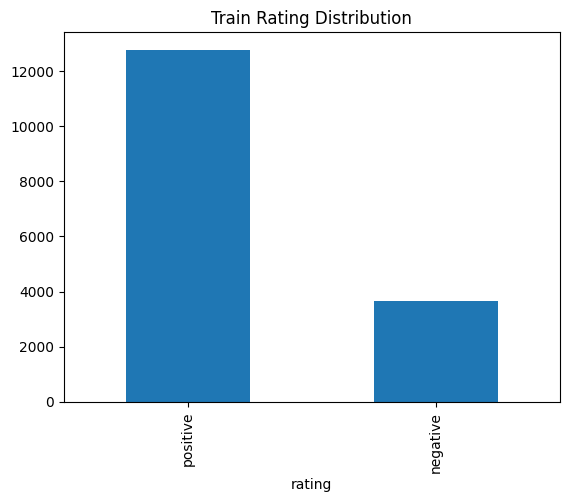

In [327]:
train['rating'].value_counts().plot(kind='bar', title='Train Rating Distribution')

<Axes: title={'center': 'Test Rating Distribution'}, xlabel='rating'>

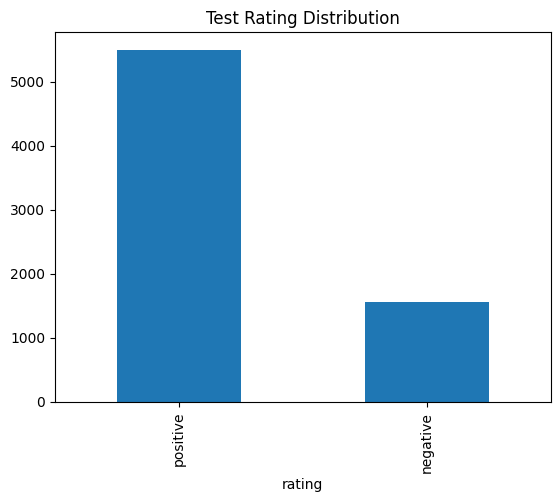

In [328]:
test['rating'].value_counts().plot(kind='bar', title='Test Rating Distribution')

In [329]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16429 entries, 12993 to 38280
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Price original                    16429 non-null  float64
 1   Windows                           16429 non-null  int32  
 2   Mac                               16429 non-null  int32  
 3   Linux                             16429 non-null  int32  
 4   Steam Deck                        16429 non-null  int32  
 5   Positive ratio                    16429 non-null  int64  
 6   Tags                              15176 non-null  object 
 7   Categories                        16429 non-null  object 
 8   Achievements                      16429 non-null  int64  
 9   Recommendations                   16429 non-null  int64  
 10  rating                            16429 non-null  object 
 11  Has full audio                    16429 non-null  int64  
 12  Has m

In [330]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7054 entries, 21378 to 40177
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Price original                    7054 non-null   float64
 1   Windows                           7054 non-null   int32  
 2   Mac                               7054 non-null   int32  
 3   Linux                             7054 non-null   int32  
 4   Steam Deck                        7054 non-null   int32  
 5   Positive ratio                    7054 non-null   int64  
 6   Tags                              6542 non-null   object 
 7   Categories                        7054 non-null   object 
 8   Achievements                      7054 non-null   int64  
 9   Recommendations                   7054 non-null   int64  
 10  rating                            7054 non-null   object 
 11  Has full audio                    7054 non-null   int64  
 12  Has mo

In [331]:
train.to_csv("data/modelling/train_processed.csv", index=False)
test.to_csv("data/modelling/test_processed.csv", index=False)

## MODELLING

### PREPARATION

In [332]:
train = pd.read_csv("data/modelling/train_processed.csv")
test = pd.read_csv("data/modelling/test_processed.csv")

In [333]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16429 entries, 0 to 16428
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Price original                    16429 non-null  float64
 1   Windows                           16429 non-null  int64  
 2   Mac                               16429 non-null  int64  
 3   Linux                             16429 non-null  int64  
 4   Steam Deck                        16429 non-null  int64  
 5   Positive ratio                    16429 non-null  int64  
 6   Tags                              15176 non-null  object 
 7   Categories                        16429 non-null  object 
 8   Achievements                      16429 non-null  int64  
 9   Recommendations                   16429 non-null  int64  
 10  rating                            16429 non-null  object 
 11  Has full audio                    16429 non-null  int64  
 12  Has 

In [334]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7054 entries, 0 to 7053
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Price original                    7054 non-null   float64
 1   Windows                           7054 non-null   int64  
 2   Mac                               7054 non-null   int64  
 3   Linux                             7054 non-null   int64  
 4   Steam Deck                        7054 non-null   int64  
 5   Positive ratio                    7054 non-null   int64  
 6   Tags                              6542 non-null   object 
 7   Categories                        7054 non-null   object 
 8   Achievements                      7054 non-null   int64  
 9   Recommendations                   7054 non-null   int64  
 10  rating                            7054 non-null   object 
 11  Has full audio                    7054 non-null   int64  
 12  Has mo

In [335]:
features = [
    'Price original', 
    'Has full audio', 'Has movie', 'Has DLC', 'Release Year',
    'languages_count', 'Developers_code', 'Publishers_code',
    'Language_english', 'Platform_count', 'Required age category_code',
    'Genre_Adventure', 'Genre_Casual', 'Genre_Indie', 
    'Category_Single-player', 'Category_Steam Achievements', 'Category_Steam Cloud'
]

X_train = train[features]
y_train = train['rating']
X_test = test[features]
y_test = test['rating']

<Axes: title={'center': 'Resampled Train Rating Distribution'}, xlabel='rating'>

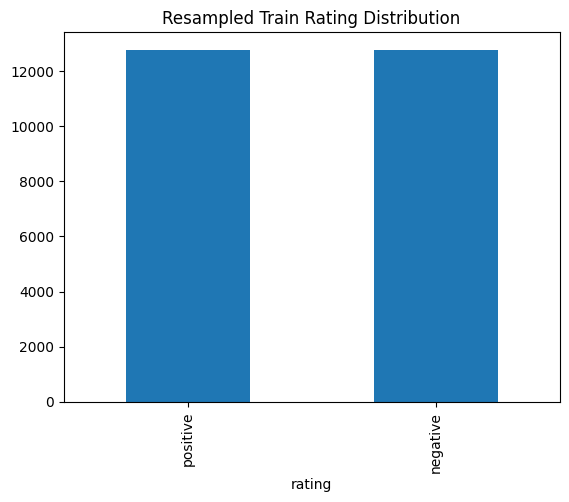

In [336]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

y_train_resampled.value_counts().plot(kind='bar', title='Resampled Train Rating Distribution')

In [337]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16429 entries, 0 to 16428
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price original               16429 non-null  float64
 1   Has full audio               16429 non-null  int64  
 2   Has movie                    16429 non-null  int64  
 3   Has DLC                      16429 non-null  int64  
 4   Release Year                 16429 non-null  int64  
 5   languages_count              16429 non-null  int64  
 6   Developers_code              16429 non-null  int64  
 7   Publishers_code              16429 non-null  int64  
 8   Language_english             16429 non-null  int64  
 9   Platform_count               16429 non-null  int64  
 10  Required age category_code   16429 non-null  int64  
 11  Genre_Adventure              16429 non-null  int64  
 12  Genre_Casual                 16429 non-null  int64  
 13  Genre_Indie     

In [338]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

### MODEL 1 - LOGISTIC REGRESSION

=============== LOGISTIC REGRESSION - TRAIN ===============
              precision    recall  f1-score   support

    negative       0.68      0.70      0.69     12770
    positive       0.69      0.67      0.68     12770

    accuracy                           0.68     25540
   macro avg       0.68      0.68      0.68     25540
weighted avg       0.68      0.68      0.68     25540



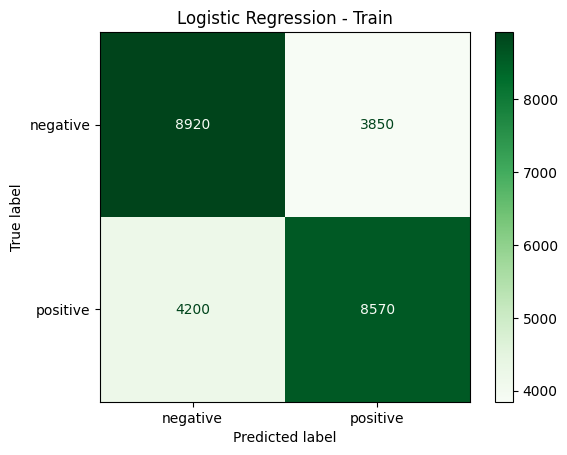

=============== LOGISTIC REGRESSION - TEST ===============
              precision    recall  f1-score   support

    negative       0.29      0.44      0.35      1556
    positive       0.81      0.69      0.75      5498

    accuracy                           0.64      7054
   macro avg       0.55      0.57      0.55      7054
weighted avg       0.70      0.64      0.66      7054



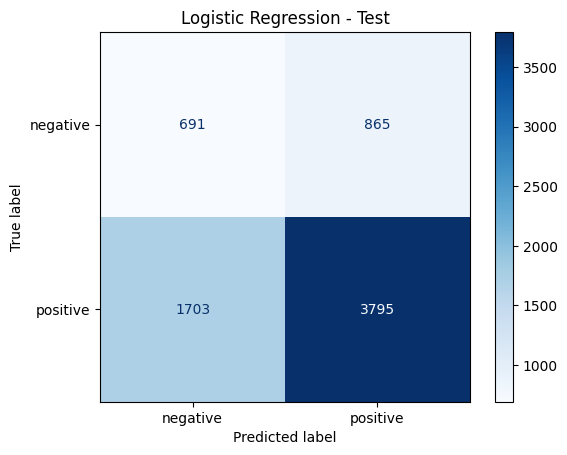

In [339]:
from sklearn.linear_model import LogisticRegression

model_logreg = LogisticRegression(max_iter=1000)
model_logreg.fit(X_train_resampled, y_train_resampled)

y_pred_train_logreg = model_logreg.predict(X_train_resampled)
y_pred_test_logreg = model_logreg.predict(X_test)

print("=============== LOGISTIC REGRESSION - TRAIN ===============")
print(classification_report(y_train_resampled, y_pred_train_logreg, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_train_resampled, y_pred_train_logreg, display_labels=['negative', 'positive'], cmap="Greens")
plt.title("Logistic Regression - Train")
plt.show()

print("=============== LOGISTIC REGRESSION - TEST ===============")
print(classification_report(y_test, y_pred_test_logreg, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_logreg, display_labels=['negative', 'positive'], cmap="Blues")
plt.title("Logistic Regression - Test")
plt.show()


In [340]:
print("Highest iteration:", model_logreg.n_iter_)

Highest iteration: [109]


### MODEL 2 - DECISION TREE

=============== DECISION TREE - TRAIN ===============
              precision    recall  f1-score   support

    negative       0.99      1.00      0.99     12770
    positive       1.00      0.99      0.99     12770

    accuracy                           0.99     25540
   macro avg       0.99      0.99      0.99     25540
weighted avg       0.99      0.99      0.99     25540



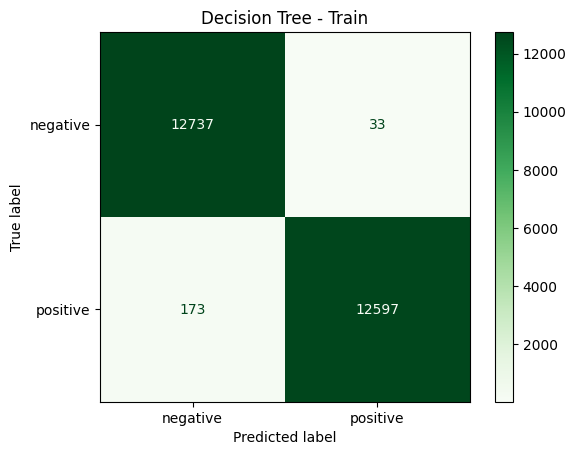

=============== DECISION TREE - TEST ===============
              precision    recall  f1-score   support

    negative       0.34      0.48      0.40      1556
    positive       0.83      0.74      0.78      5498

    accuracy                           0.68      7054
   macro avg       0.59      0.61      0.59      7054
weighted avg       0.72      0.68      0.70      7054



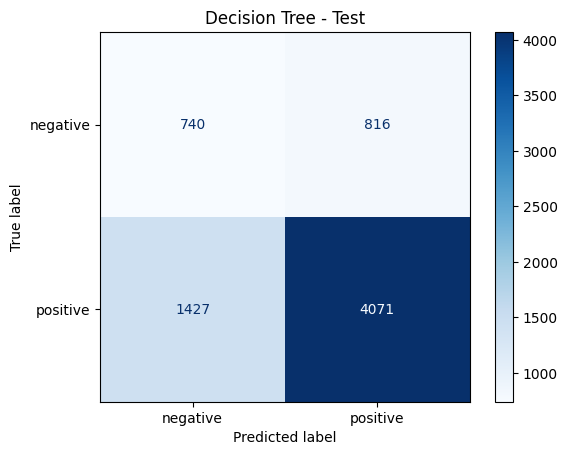

In [341]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(random_state=42)
model_tree.fit(X_train_resampled, y_train_resampled)

y_pred_train_tree = model_tree.predict(X_train_resampled)
y_pred_test_tree = model_tree.predict(X_test)

print("=============== DECISION TREE - TRAIN ===============")
print(classification_report(y_train_resampled, y_pred_train_tree, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_train_resampled, y_pred_train_tree, display_labels=['negative', 'positive'], cmap="Greens")
plt.title("Decision Tree - Train")
plt.show()

print("=============== DECISION TREE - TEST ===============")
print(classification_report(y_test, y_pred_test_tree, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_tree, display_labels=['negative', 'positive'], cmap="Blues")
plt.title("Decision Tree - Test")
plt.show()

### MODEL 3 - RANDOM FOREST

=============== RANDOM FOREST - TRAIN ===============
              precision    recall  f1-score   support

    negative       0.99      0.99      0.99     12770
    positive       0.99      0.99      0.99     12770

    accuracy                           0.99     25540
   macro avg       0.99      0.99      0.99     25540
weighted avg       0.99      0.99      0.99     25540



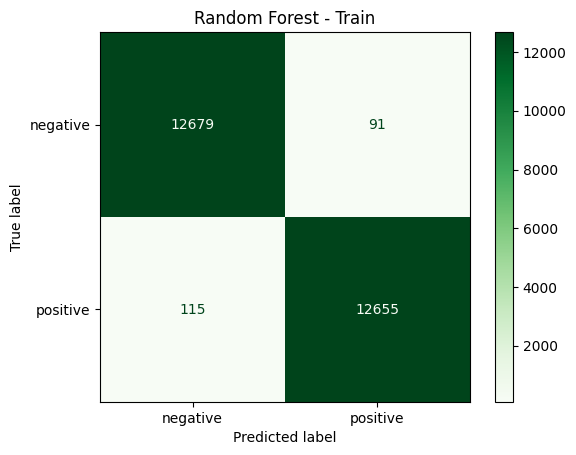

=============== RANDOM FOREST - TEST ===============
              precision    recall  f1-score   support

    negative       0.44      0.41      0.43      1556
    positive       0.84      0.85      0.84      5498

    accuracy                           0.76      7054
   macro avg       0.64      0.63      0.64      7054
weighted avg       0.75      0.76      0.75      7054



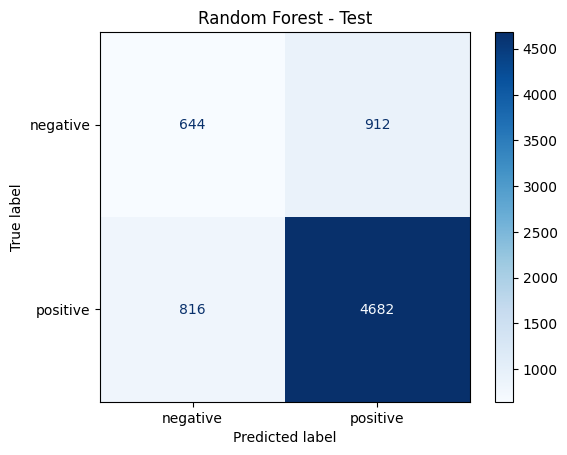

In [342]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_resampled, y_train_resampled)

y_pred_train_rf = model_rf.predict(X_train_resampled)
y_pred_test_rf = model_rf.predict(X_test)

print("=============== RANDOM FOREST - TRAIN ===============")
print(classification_report(y_train_resampled, y_pred_train_rf, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_train_resampled, y_pred_train_rf, display_labels=['negative', 'positive'], cmap="Greens")
plt.title("Random Forest - Train")
plt.show()

print("=============== RANDOM FOREST - TEST ===============")
print(classification_report(y_test, y_pred_test_rf, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_rf, display_labels=['negative', 'positive'], cmap="Blues")
plt.title("Random Forest - Test")
plt.show()


Fitting 5 folds for each of 72 candidates, totalling 360 fits


d:\.STUDY\Cawu5\DM\CODE_FINAL\steam_games_analysis\.venv\lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best parameters found:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

=============== RANDOM FOREST (TUNED) - TEST ===============
              precision    recall  f1-score   support

    negative       0.40      0.50      0.45      1556
    positive       0.85      0.79      0.82      5498

    accuracy                           0.73      7054
   macro avg       0.63      0.64      0.63      7054
weighted avg       0.75      0.73      0.74      7054



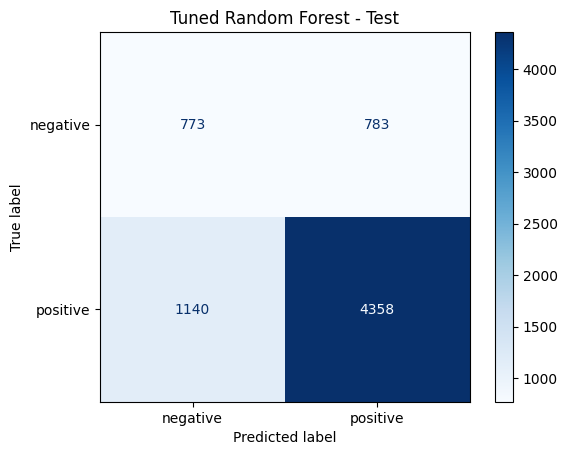

In [343]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    verbose=2,
    n_jobs=-1,
    scoring='precision'
)

grid_search.fit(X_train_resampled, y_train_resampled)

print("Best parameters found: ", grid_search.best_params_)

best_rf_model = grid_search.best_estimator_

y_pred_test_best_rf = best_rf_model.predict(X_test)

print("\n=============== RANDOM FOREST (TUNED) - TEST ===============")
print(classification_report(y_test, y_pred_test_best_rf, target_names=['negative', 'positive']))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_best_rf, display_labels=['negative', 'positive'], cmap="Blues")
plt.title("Tuned Random Forest - Test")
plt.show()

### MODEL 4 - KNN

=============== KNN - TRAIN ===============
              precision    recall  f1-score   support

    negative       0.81      0.91      0.85     12770
    positive       0.90      0.78      0.83     12770

    accuracy                           0.84     25540
   macro avg       0.85      0.84      0.84     25540
weighted avg       0.85      0.84      0.84     25540



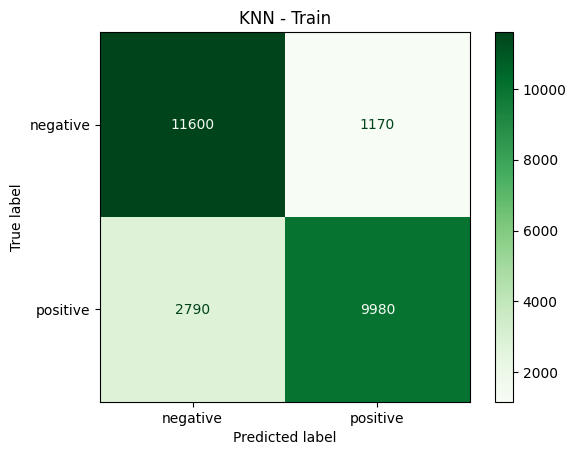

=============== KNN - TEST ===============
              precision    recall  f1-score   support

    negative       0.40      0.51      0.45      1556
    positive       0.85      0.78      0.81      5498

    accuracy                           0.72      7054
   macro avg       0.62      0.64      0.63      7054
weighted avg       0.75      0.72      0.73      7054



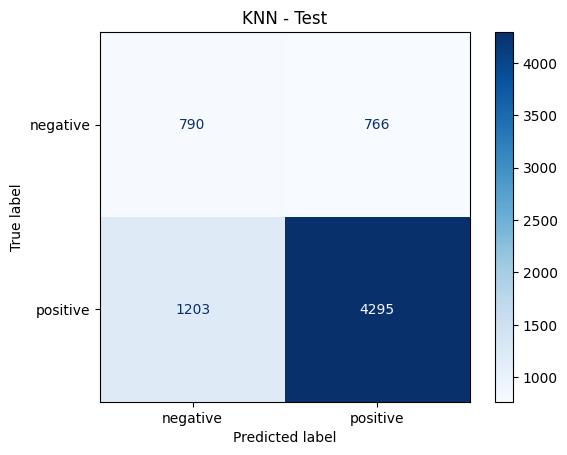

In [344]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train_resampled, y_train_resampled)

y_pred_train_knn = model_knn.predict(X_train_resampled)
y_pred_test_knn = model_knn.predict(X_test)

print("=============== KNN - TRAIN ===============")
print(classification_report(y_train_resampled, y_pred_train_knn, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_train_resampled, y_pred_train_knn, display_labels=['negative', 'positive'], cmap="Greens")
plt.title("KNN - Train")
plt.show()

print("=============== KNN - TEST ===============")
print(classification_report(y_test, y_pred_test_knn, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_knn, display_labels=['negative', 'positive'], cmap="Blues")
plt.title("KNN - Test")
plt.show()


Fitting 5 folds for each of 40 candidates, totalling 200 fits


d:\.STUDY\Cawu5\DM\CODE_FINAL\steam_games_analysis\.venv\lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan]
  warnings.warn(


Best parameters found:  {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}

=============== KNN (GRID SEARCH TUNED) - TEST ===============
              precision    recall  f1-score   support

    negative       0.42      0.45      0.43      1556
    positive       0.84      0.82      0.83      5498

    accuracy                           0.74      7054
   macro avg       0.63      0.63      0.63      7054
weighted avg       0.75      0.74      0.74      7054



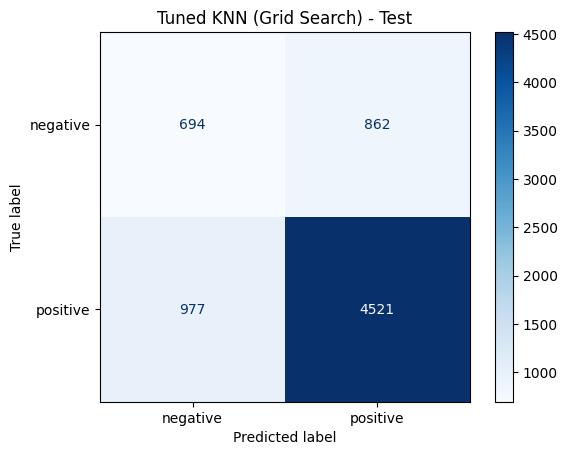

In [345]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define the hyperparameter grid for KNN
param_grid_knn = {
    'n_neighbors': list(range(1, 21, 2)), 
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()

grid_search_knn = GridSearchCV(
    estimator=knn,
    param_grid=param_grid_knn,
    cv=5,
    verbose=2,
    n_jobs=-1,
    scoring='precision'
)

grid_search_knn.fit(X_train_resampled, y_train_resampled)

print("Best parameters found: ", grid_search_knn.best_params_)

best_knn_model = grid_search_knn.best_estimator_

y_pred_test_best_knn = best_knn_model.predict(X_test)

print("\n=============== KNN (GRID SEARCH TUNED) - TEST ===============")
print(classification_report(y_test, y_pred_test_best_knn, target_names=['negative', 'positive']))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_best_knn, display_labels=['negative', 'positive'], cmap="Blues")
plt.title("Tuned KNN (Grid Search) - Test")
plt.show()

### MODEL 5 - ADA BOOST

=============== ADA BOOST - TRAIN ===============
              precision    recall  f1-score   support

    negative       0.75      0.77      0.76     12770
    positive       0.76      0.74      0.75     12770

    accuracy                           0.76     25540
   macro avg       0.76      0.76      0.76     25540
weighted avg       0.76      0.76      0.76     25540



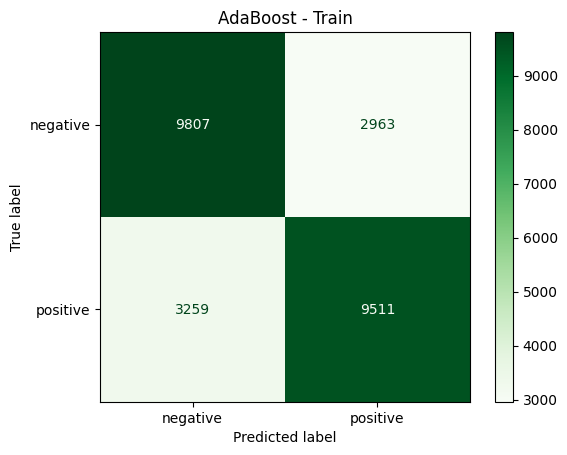

=============== ADA BOOST - TEST ===============
              precision    recall  f1-score   support

    negative       0.37      0.50      0.42      1556
    positive       0.84      0.76      0.80      5498

    accuracy                           0.70      7054
   macro avg       0.60      0.63      0.61      7054
weighted avg       0.74      0.70      0.71      7054



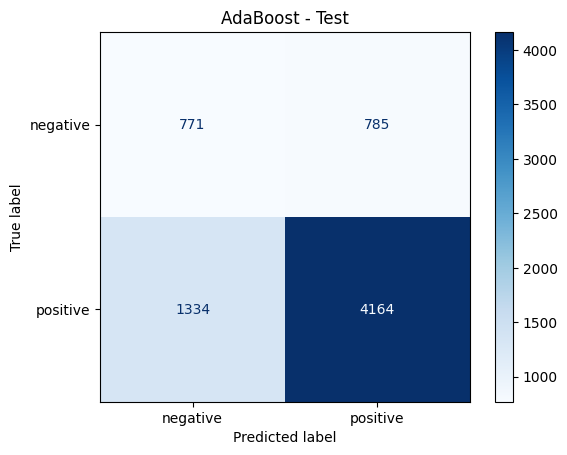

In [346]:
from sklearn.ensemble import AdaBoostClassifier

model_ada = AdaBoostClassifier(random_state=42)
model_ada.fit(X_train_resampled, y_train_resampled)

y_pred_train_ada = model_ada.predict(X_train_resampled)
y_pred_test_ada = model_ada.predict(X_test)

print("=============== ADA BOOST - TRAIN ===============")
print(classification_report(y_train_resampled, y_pred_train_ada, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_train_resampled, y_pred_train_ada, display_labels=['negative', 'positive'], cmap="Greens")
plt.title("AdaBoost - Train")
plt.show()

print("=============== ADA BOOST - TEST ===============")
print(classification_report(y_test, y_pred_test_ada, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_ada, display_labels=['negative', 'positive'], cmap="Blues")
plt.title("AdaBoost - Test")
plt.show()


### MODEL 6 - CAT BOOST

=============== CAT BOOST - TRAIN ===============
              precision    recall  f1-score   support

    negative       0.91      0.83      0.87     12770
    positive       0.84      0.92      0.88     12770

    accuracy                           0.87     25540
   macro avg       0.88      0.87      0.87     25540
weighted avg       0.88      0.87      0.87     25540



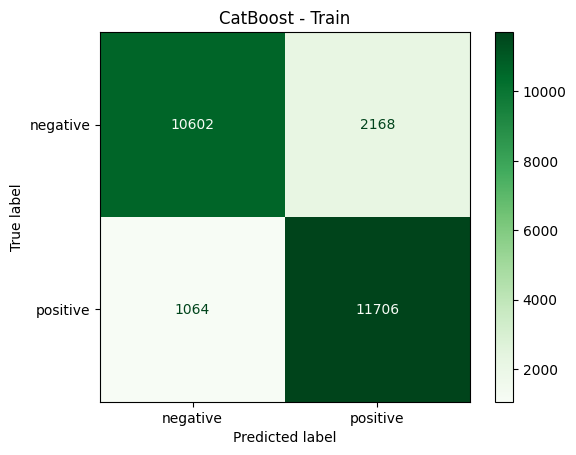

=============== CAT BOOST - TEST ===============
              precision    recall  f1-score   support

    negative       0.51      0.35      0.41      1556
    positive       0.83      0.91      0.87      5498

    accuracy                           0.78      7054
   macro avg       0.67      0.63      0.64      7054
weighted avg       0.76      0.78      0.77      7054



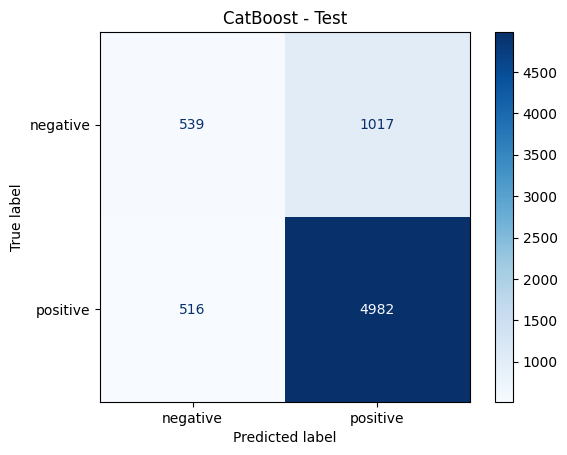

In [347]:
from catboost import CatBoostClassifier

model_cat = CatBoostClassifier(verbose=0, random_state=42)
model_cat.fit(X_train_resampled, y_train_resampled)

y_pred_train_cat = model_cat.predict(X_train_resampled)
y_pred_test_cat = model_cat.predict(X_test)

print("=============== CAT BOOST - TRAIN ===============")
print(classification_report(y_train_resampled, y_pred_train_cat, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_train_resampled, y_pred_train_cat, display_labels=['negative', 'positive'], cmap="Greens")
plt.title("CatBoost - Train")
plt.show()

print("=============== CAT BOOST - TEST ===============")
print(classification_report(y_test, y_pred_test_cat, target_names=['negative', 'positive']))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_cat, display_labels=['negative', 'positive'], cmap="Blues")
plt.title("CatBoost - Test")
plt.show()

Fitting 3 folds for each of 81 candidates, totalling 243 fits


d:\.STUDY\Cawu5\DM\CODE_FINAL\steam_games_analysis\.venv\lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best parameters found:  {'depth': 4, 'iterations': 200, 'l2_leaf_reg': 1, 'learning_rate': 0.05}

=============== CATBOOST (GRID SEARCH TUNED) - TEST ===============
              precision    recall  f1-score   support

    negative       0.39      0.46      0.42      1556
    positive       0.84      0.80      0.82      5498

    accuracy                           0.73      7054
   macro avg       0.62      0.63      0.62      7054
weighted avg       0.74      0.73      0.73      7054



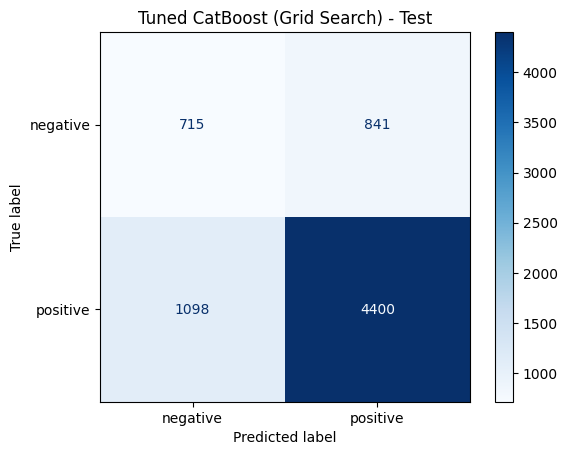

In [348]:
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

param_grid_cat = {
    'iterations': [200, 300, 500],
    'depth': [4, 6, 8],
    'learning_rate': [0.05, 0.1, 0.2],
    'l2_leaf_reg': [1, 3, 5]
}

cat = CatBoostClassifier(verbose=0, random_state=42)

grid_search_cat = GridSearchCV(
    estimator=cat,
    param_grid=param_grid_cat,
    cv=3,
    verbose=2,
    n_jobs=-1,
    scoring='precision'
)

grid_search_cat.fit(X_train_resampled, y_train_resampled)

print("Best parameters found: ", grid_search_cat.best_params_)

best_cat_model = grid_search_cat.best_estimator_

y_pred_test_best_cat = best_cat_model.predict(X_test)

print("\n=============== CATBOOST (GRID SEARCH TUNED) - TEST ===============")
print(classification_report(y_test, y_pred_test_best_cat, target_names=['negative', 'positive']))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_best_cat, display_labels=['negative', 'positive'], cmap="Blues")
plt.title("Tuned CatBoost (Grid Search) - Test")
plt.show()

### SAVE WINNER

In [349]:
import joblib

joblib.dump(best_rf_model, 'models/precise_rf.pkl')
joblib.dump(model_cat, 'models/aggressive_catboost.pkl')

['models/aggressive_catboost.pkl']

## INTERPRETATION

In [350]:
model_precise = joblib.load('models/precise_rf.pkl')
model_aggressive = joblib.load('models/aggressive_catboost.pkl')

### FEATURE IMPORTANCE

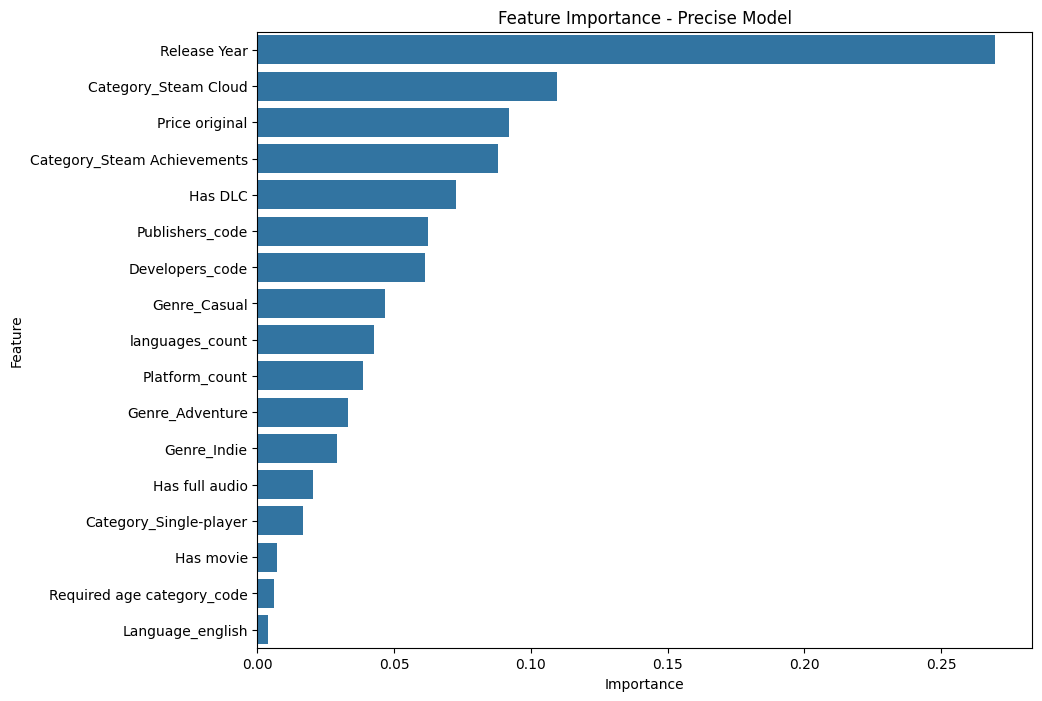

                        Feature  Importance
4                  Release Year    0.269899
16         Category_Steam Cloud    0.109428
0                Price original    0.092127
15  Category_Steam Achievements    0.087818
3                       Has DLC    0.072622
7               Publishers_code    0.062391
6               Developers_code    0.061409
12                 Genre_Casual    0.046655
5               languages_count    0.042474
9                Platform_count    0.038667
11              Genre_Adventure    0.032985
13                  Genre_Indie    0.029179
1                Has full audio    0.020446
14       Category_Single-player    0.016687
2                     Has movie    0.007193
10   Required age category_code    0.006120
8              Language_english    0.003900


In [351]:
feature_importances = model_precise.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance - Precise Model')
plt.show()

print(importance_df)

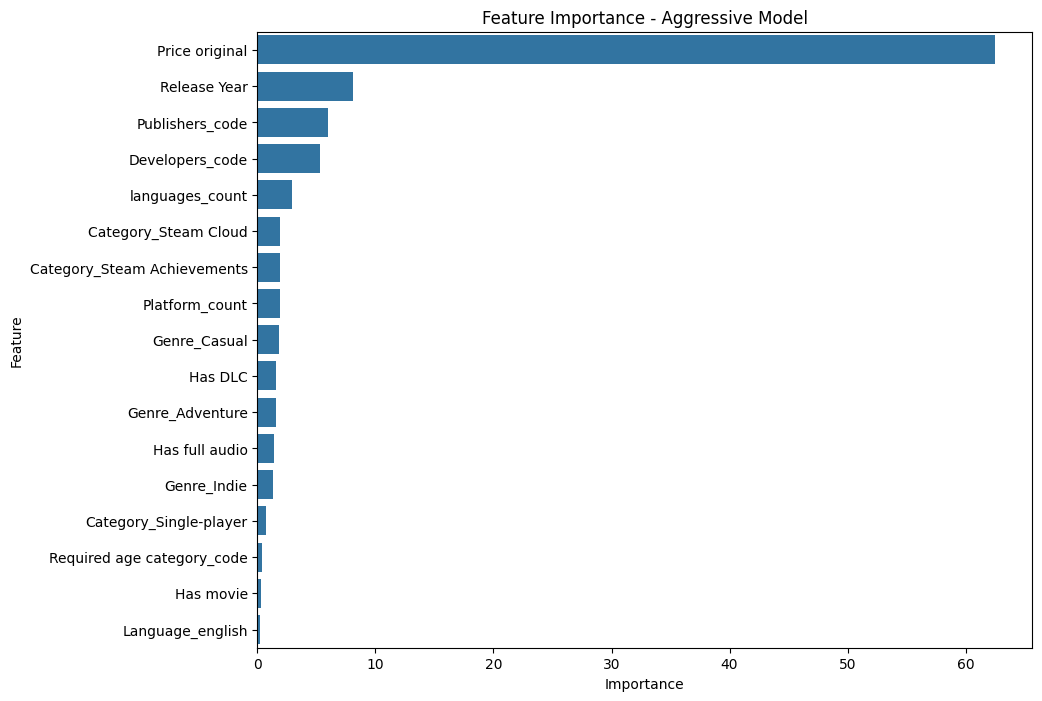

                        Feature  Importance
0                Price original   62.531421
4                  Release Year    8.099913
7               Publishers_code    5.939453
6               Developers_code    5.334811
5               languages_count    2.963065
16         Category_Steam Cloud    1.930907
15  Category_Steam Achievements    1.904457
9                Platform_count    1.885950
12                 Genre_Casual    1.848187
3                       Has DLC    1.585800
11              Genre_Adventure    1.562428
1                Has full audio    1.393851
13                  Genre_Indie    1.325013
14       Category_Single-player    0.769372
10   Required age category_code    0.382045
2                     Has movie    0.326255
8              Language_english    0.217071


In [352]:
feature_importances = model_aggressive.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance - Aggressive Model')
plt.show()

print(importance_df)

### PARTIAL DEPENDENCE

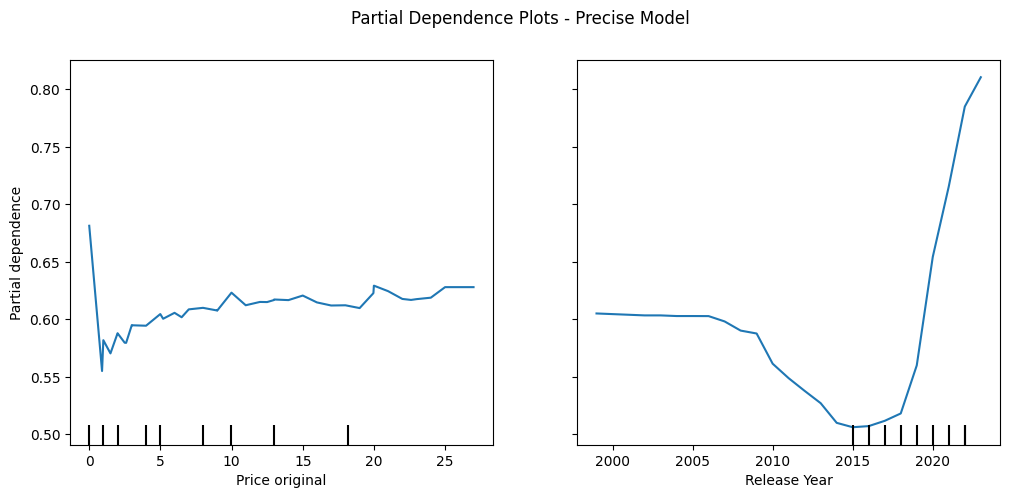

In [353]:
from sklearn.inspection import PartialDependenceDisplay

top_features = importance_df['Feature'].head(2).tolist()

fig, ax = plt.subplots(figsize=(12, 5))
display = PartialDependenceDisplay.from_estimator(
    model_precise,
    X_test,
    features=top_features,
    ax=ax
)
plt.suptitle('Partial Dependence Plots - Precise Model')
plt.show()

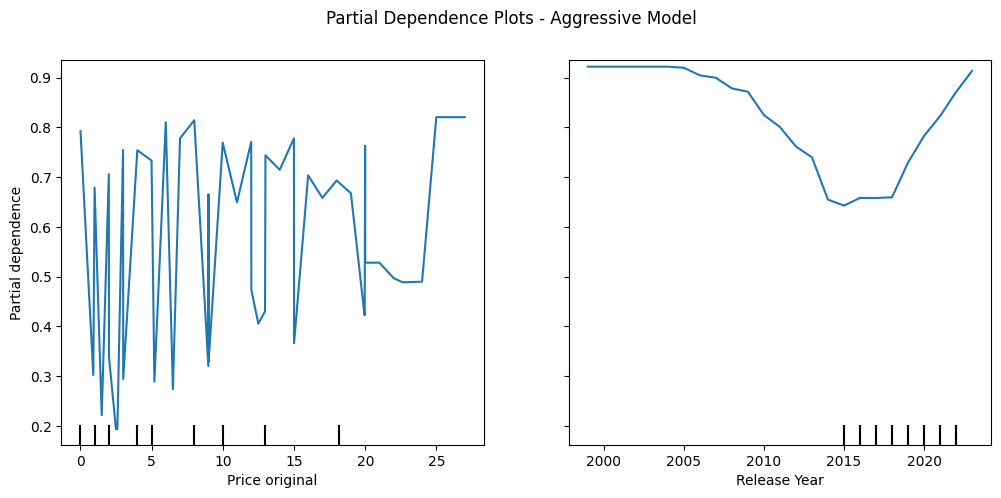

In [354]:
from sklearn.inspection import PartialDependenceDisplay

top_features = importance_df['Feature'].head(2).tolist()

fig, ax = plt.subplots(figsize=(12, 5))
display = PartialDependenceDisplay.from_estimator(
    model_aggressive,
    X_test,
    features=top_features,
    ax=ax
)
plt.suptitle('Partial Dependence Plots - Aggressive Model')
plt.show()

### ANALYZE DEVS AND PUBS - MODEL_PRECISE

In [355]:
print(X_test.columns)

Index(['Price original', 'Has full audio', 'Has movie', 'Has DLC',
       'Release Year', 'languages_count', 'Developers_code', 'Publishers_code',
       'Language_english', 'Platform_count', 'Required age category_code',
       'Genre_Adventure', 'Genre_Casual', 'Genre_Indie',
       'Category_Single-player', 'Category_Steam Achievements',
       'Category_Steam Cloud'],
      dtype='object')


In [356]:
predictions = model_precise.predict(X_test)

results_df = X_test.copy()
results_df['predicted_success'] = predictions

successful_predictions_df = results_df[results_df['predicted_success'] == 'positive']

In [357]:
successful_devs = successful_predictions_df['Developers_code'].value_counts().reset_index()
successful_devs.columns = ['Developers_code', 'Predicted Success Count']

successful_pubs = successful_predictions_df['Publishers_code'].value_counts().reset_index()
successful_pubs.columns = ['Publishers_code', 'Predicted Success Count']

successful_devs['Developer_Name'] = developer_encoder.inverse_transform(successful_devs['Developers_code'])
successful_pubs['Publisher_Name'] = publisher_encoder.inverse_transform(successful_pubs['Publishers_code'])

In [358]:
print("--- Developers Predicted to be Successful Most Often ---")
successful_devs[['Developers_code', 'Developer_Name', 'Predicted Success Count']]

--- Developers Predicted to be Successful Most Often ---


,Developers_code,Developer_Name,Predicted Success Count
0,8083,Others,1601
1,1239,Choice of Games,40
2,1850,Dnovel,18
3,556,"Atomic Fabrik,Cristian Manolachi",17
4,3765,Laush Dmitriy Sergeevich,17
...,...,...,...
2309,1840,Dischan Media,1
2310,3959,Luna Apps,1
2311,5043,"Pilgrim Adventures,GrabTheGames Studios",1
2312,8047,莉莉恩工作室,1


In [359]:
print("\n--- Publishers Predicted to be Successful Most Often ---")
successful_pubs[['Publishers_code', 'Publisher_Name', 'Predicted Success Count']]


--- Publishers Predicted to be Successful Most Often ---


,Publishers_code,Publisher_Name,Predicted Success Count
0,7125,Others,1530
1,686,Big Fish Games,46
2,1073,Choice of Games,40
3,4456,Piece Of Voxel,21
4,3320,Laush Studio,20
...,...,...,...
1938,6710,"familyplay,Markt+Technik",1
1939,2809,ImaginationOverflow,1
1940,6448,Wolfire Games,1
1941,6431,WinterSpring Games,1


### ANALYZE "Choice of Games"

In [360]:
DEV_CODE = 1239
PUB_CODE = 1073

success_probs = model_precise.predict_proba(X_test)[:, 1]

results_df = X_test.copy()
results_df['predicted_success'] = predictions
results_df['success_probability'] = success_probs

company_games_df = results_df[
    (results_df['Developers_code'] == DEV_CODE) |
    (results_df['Publishers_code'] == PUB_CODE)
]

print(f"Found {len(company_games_df)} games associated with this company.")
company_games_df.head()

Found 43 games associated with this company.


,Price original,Has full audio,Has movie,Has DLC,Release Year,languages_count,Developers_code,Publishers_code,Language_english,Platform_count,Required age category_code,Genre_Adventure,Genre_Casual,Genre_Indie,Category_Single-player,Category_Steam Achievements,Category_Steam Cloud,predicted_success,success_probability
140,6.99,0,1,0,2018,1,1239,1073,1,3,1,1,0,1,1,1,1,positive,0.545050
372,4.99,0,1,0,2018,1,1239,1073,1,3,1,1,0,1,1,1,1,positive,0.522402
396,6.99,0,1,0,2017,1,1239,1073,1,3,1,1,0,1,1,1,1,positive,0.543286
408,5.99,0,1,0,2019,1,1239,1073,1,3,1,1,1,1,1,1,1,positive,0.594085
588,5.99,0,1,1,2016,1,1239,1073,1,3,1,1,0,1,1,1,1,positive,0.588204


In [361]:
prediction_counts = company_games_df['predicted_success'].value_counts()

print("\nPrediction counts for the company's games:")
print(prediction_counts)


Prediction counts for the company's games:
predicted_success
positive    40
negative     3
Name: count, dtype: int64



Their most successful 'Release Year' based on the model is: 2015


C:\Users\Wesley\AppData\Local\Temp\ipykernel_20688\1182529290.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Success Probability', loc='upper right')


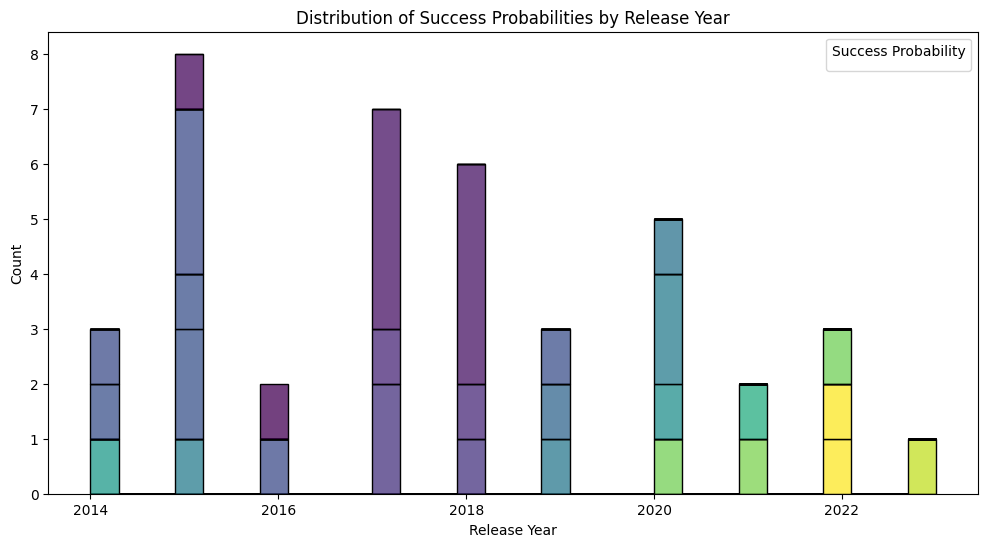

In [362]:
successful_company_games = company_games_df[company_games_df['predicted_success'] == 'positive']

most_successful_year = successful_company_games['Release Year'].mode()[0]

print(f"\nTheir most successful 'Release Year' based on the model is: {most_successful_year}")

plt.figure(figsize=(12, 6))
sns.histplot(
    data=successful_company_games,
	x='Release Year',
	hue='success_probability',
	multiple='stack',
	bins=30,
	palette='viridis'
)
plt.title('Distribution of Success Probabilities by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.legend(title='Success Probability', loc='upper right')
plt.show()

In [363]:
feature_columns = [
    'Genre_Adventure', 'Genre_Casual', 'Genre_Indie',
    'Category_Single-player', 'Category_Steam Achievements', 'Category_Steam Cloud'
]

print("\n--- Impact Analysis ---")
for column in feature_columns:
    mean_probs = results_df.groupby(column)['success_probability'].mean()
    print(f"\n--- {column} ---")
    print(mean_probs)

    if 1 in mean_probs.index and 0 in mean_probs.index:
        lift = (mean_probs[1] - mean_probs[0]) * 100
        print(f"Impact: Having this feature increases success probability by {lift:.2f} percentage points on average.")


--- Impact Analysis ---

--- Genre_Adventure ---
Genre_Adventure
0    0.591826
1    0.664480
Name: success_probability, dtype: float64
Impact: Having this feature increases success probability by 7.27 percentage points on average.

--- Genre_Casual ---
Genre_Casual
0    0.597922
1    0.657006
Name: success_probability, dtype: float64
Impact: Having this feature increases success probability by 5.91 percentage points on average.

--- Genre_Indie ---
Genre_Indie
0    0.556391
1    0.648247
Name: success_probability, dtype: float64
Impact: Having this feature increases success probability by 9.19 percentage points on average.

--- Category_Single-player ---
Category_Single-player
0    0.500048
1    0.626525
Name: success_probability, dtype: float64
Impact: Having this feature increases success probability by 12.65 percentage points on average.

--- Category_Steam Achievements ---
Category_Steam Achievements
0    0.514630
1    0.694991
Name: success_probability, dtype: float64
Impact: Hav

In [364]:
import itertools

genre_cols = ['Genre_Adventure', 'Genre_Casual', 'Genre_Indie']
category_cols = ['Category_Single-player', 'Category_Steam Achievements', 'Category_Steam Cloud']

print("\n--- Synergy Analysis ---")
for genre, category in itertools.product(genre_cols, category_cols):
    print(f"\n--- {genre} + {category} ---")
    
    interaction_effect = results_df.groupby([genre, category])['success_probability'].mean().unstack()
    print(interaction_effect)


--- Synergy Analysis ---

--- Genre_Adventure + Category_Single-player ---
Category_Single-player         0         1
Genre_Adventure                           
0                       0.481213  0.597245
1                       0.619334  0.664938

--- Genre_Adventure + Category_Steam Achievements ---
Category_Steam Achievements         0         1
Genre_Adventure                                
0                            0.481032  0.667584
1                            0.561666  0.731656

--- Genre_Adventure + Category_Steam Cloud ---
Category_Steam Cloud         0         1
Genre_Adventure                         
0                     0.524774  0.726973
1                     0.611679  0.759720

--- Genre_Casual + Category_Single-player ---
Category_Single-player         0         1
Genre_Casual                              
0                       0.449963  0.603487
1                       0.605157  0.658288

--- Genre_Casual + Category_Steam Achievements ---
Category_Steam Achieve

In [365]:
print("\n--- Key Factors FOR THIS COMPANY ---")
for column in feature_columns:
    mean_probs_company = company_games_df.groupby(column)['success_probability'].mean()
    
    if len(mean_probs_company) > 1:
        print(f"\n--- {column} ---")
        print(mean_probs_company)


--- Key Factors FOR THIS COMPANY ---

--- Genre_Adventure ---
Genre_Adventure
0    0.666836
1    0.563473
Name: success_probability, dtype: float64

--- Genre_Casual ---
Genre_Casual
0    0.573053
1    0.715368
Name: success_probability, dtype: float64

--- Genre_Indie ---
Genre_Indie
0    0.800729
1    0.594739
Name: success_probability, dtype: float64

--- Category_Single-player ---
Category_Single-player
0    0.591200
1    0.599728
Name: success_probability, dtype: float64

--- Category_Steam Achievements ---
Category_Steam Achievements
0    0.553809
1    0.601760
Name: success_probability, dtype: float64


### ANALYZE DEVS AND PUBS - MODEL_AGGRESSIVE

In [366]:
print(X_test.columns)

Index(['Price original', 'Has full audio', 'Has movie', 'Has DLC',
       'Release Year', 'languages_count', 'Developers_code', 'Publishers_code',
       'Language_english', 'Platform_count', 'Required age category_code',
       'Genre_Adventure', 'Genre_Casual', 'Genre_Indie',
       'Category_Single-player', 'Category_Steam Achievements',
       'Category_Steam Cloud'],
      dtype='object')


In [367]:
predictions = model_aggressive.predict(X_test)

results_df = X_test.copy()
results_df['predicted_success'] = predictions

successful_predictions_df = results_df[results_df['predicted_success'] == 'positive']

In [368]:
successful_devs = successful_predictions_df['Developers_code'].value_counts().reset_index()
successful_devs.columns = ['Developers_code', 'Predicted Success Count']

successful_pubs = successful_predictions_df['Publishers_code'].value_counts().reset_index()
successful_pubs.columns = ['Publishers_code', 'Predicted Success Count']

successful_devs['Developer_Name'] = developer_encoder.inverse_transform(successful_devs['Developers_code'])
successful_pubs['Publisher_Name'] = publisher_encoder.inverse_transform(successful_pubs['Publishers_code'])

In [369]:
print("--- Developers Predicted to be Successful Most Often ---")
successful_devs[['Developers_code', 'Developer_Name', 'Predicted Success Count']]

--- Developers Predicted to be Successful Most Often ---


,Developers_code,Developer_Name,Predicted Success Count
0,8083,Others,1830
1,1239,Choice of Games,33
2,3765,Laush Dmitriy Sergeevich,22
3,1850,Dnovel,20
4,556,"Atomic Fabrik,Cristian Manolachi",19
...,...,...,...
2641,5043,"Pilgrim Adventures,GrabTheGames Studios",1
2642,8047,莉莉恩工作室,1
2643,28,1CC Games,1
2644,1979,DyingCat,1


In [370]:
print("\n--- Publishers Predicted to be Successful Most Often ---")
successful_pubs[['Publishers_code', 'Publisher_Name', 'Predicted Success Count']]


--- Publishers Predicted to be Successful Most Often ---


,Publishers_code,Publisher_Name,Predicted Success Count
0,7125,Others,1736
1,686,Big Fish Games,53
2,1073,Choice of Games,33
3,3320,Laush Studio,25
4,5169,Sekai Project,24
...,...,...,...
2174,5560,Strongshell Software,1
2175,3212,KomodoBit Games,1
2176,790,BluePrinting,1
2177,2273,Gameloft,1


### ANALYZE "Choice of Games"

In [371]:
DEV_CODE = 1239
PUB_CODE = 1073

success_probs = model_precise.predict_proba(X_test)[:, 1]

results_df = X_test.copy()
results_df['predicted_success'] = predictions
results_df['success_probability'] = success_probs

company_games_df = results_df[
    (results_df['Developers_code'] == DEV_CODE) |
    (results_df['Publishers_code'] == PUB_CODE)
]

print(f"Found {len(company_games_df)} games associated with this company.")
company_games_df.head()

Found 43 games associated with this company.


,Price original,Has full audio,Has movie,Has DLC,Release Year,languages_count,Developers_code,Publishers_code,Language_english,Platform_count,Required age category_code,Genre_Adventure,Genre_Casual,Genre_Indie,Category_Single-player,Category_Steam Achievements,Category_Steam Cloud,predicted_success,success_probability
140,6.99,0,1,0,2018,1,1239,1073,1,3,1,1,0,1,1,1,1,positive,0.545050
372,4.99,0,1,0,2018,1,1239,1073,1,3,1,1,0,1,1,1,1,negative,0.522402
396,6.99,0,1,0,2017,1,1239,1073,1,3,1,1,0,1,1,1,1,positive,0.543286
408,5.99,0,1,0,2019,1,1239,1073,1,3,1,1,1,1,1,1,1,positive,0.594085
588,5.99,0,1,1,2016,1,1239,1073,1,3,1,1,0,1,1,1,1,positive,0.588204


In [372]:
prediction_counts = company_games_df['predicted_success'].value_counts()

print("\nPrediction counts for the company's games:")
print(prediction_counts)


Prediction counts for the company's games:
predicted_success
positive    33
negative    10
Name: count, dtype: int64



Their most successful 'Release Year' based on the model is: 2015


C:\Users\Wesley\AppData\Local\Temp\ipykernel_20688\1182529290.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Success Probability', loc='upper right')


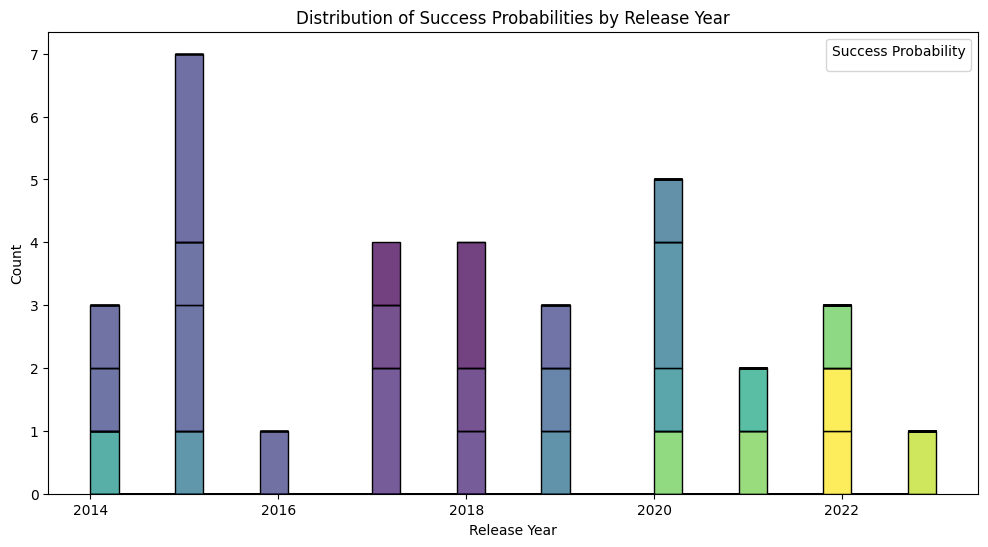

In [373]:
successful_company_games = company_games_df[company_games_df['predicted_success'] == 'positive']

most_successful_year = successful_company_games['Release Year'].mode()[0]

print(f"\nTheir most successful 'Release Year' based on the model is: {most_successful_year}")

plt.figure(figsize=(12, 6))
sns.histplot(
    data=successful_company_games,
	x='Release Year',
	hue='success_probability',
	multiple='stack',
	bins=30,
	palette='viridis'
)
plt.title('Distribution of Success Probabilities by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.legend(title='Success Probability', loc='upper right')
plt.show()

In [374]:
feature_columns = [
    'Genre_Adventure', 'Genre_Casual', 'Genre_Indie',
    'Category_Single-player', 'Category_Steam Achievements', 'Category_Steam Cloud'
]

print("\n--- Impact Analysis ---")
for column in feature_columns:
    mean_probs = results_df.groupby(column)['success_probability'].mean()
    print(f"\n--- {column} ---")
    print(mean_probs)

    if 1 in mean_probs.index and 0 in mean_probs.index:
        lift = (mean_probs[1] - mean_probs[0]) * 100
        print(f"Impact: Having this feature increases success probability by {lift:.2f} percentage points on average.")


--- Impact Analysis ---

--- Genre_Adventure ---
Genre_Adventure
0    0.591826
1    0.664480
Name: success_probability, dtype: float64
Impact: Having this feature increases success probability by 7.27 percentage points on average.

--- Genre_Casual ---
Genre_Casual
0    0.597922
1    0.657006
Name: success_probability, dtype: float64
Impact: Having this feature increases success probability by 5.91 percentage points on average.

--- Genre_Indie ---
Genre_Indie
0    0.556391
1    0.648247
Name: success_probability, dtype: float64
Impact: Having this feature increases success probability by 9.19 percentage points on average.

--- Category_Single-player ---
Category_Single-player
0    0.500048
1    0.626525
Name: success_probability, dtype: float64
Impact: Having this feature increases success probability by 12.65 percentage points on average.

--- Category_Steam Achievements ---
Category_Steam Achievements
0    0.514630
1    0.694991
Name: success_probability, dtype: float64
Impact: Hav

In [375]:
import itertools

genre_cols = ['Genre_Adventure', 'Genre_Casual', 'Genre_Indie']
category_cols = ['Category_Single-player', 'Category_Steam Achievements', 'Category_Steam Cloud']

print("\n--- Synergy Analysis ---")
for genre, category in itertools.product(genre_cols, category_cols):
    print(f"\n--- {genre} + {category} ---")
    
    interaction_effect = results_df.groupby([genre, category])['success_probability'].mean().unstack()
    print(interaction_effect)


--- Synergy Analysis ---

--- Genre_Adventure + Category_Single-player ---
Category_Single-player         0         1
Genre_Adventure                           
0                       0.481213  0.597245
1                       0.619334  0.664938

--- Genre_Adventure + Category_Steam Achievements ---
Category_Steam Achievements         0         1
Genre_Adventure                                
0                            0.481032  0.667584
1                            0.561666  0.731656

--- Genre_Adventure + Category_Steam Cloud ---
Category_Steam Cloud         0         1
Genre_Adventure                         
0                     0.524774  0.726973
1                     0.611679  0.759720

--- Genre_Casual + Category_Single-player ---
Category_Single-player         0         1
Genre_Casual                              
0                       0.449963  0.603487
1                       0.605157  0.658288

--- Genre_Casual + Category_Steam Achievements ---
Category_Steam Achieve

In [376]:
print("\n--- Key Factors FOR THIS COMPANY ---")
for column in feature_columns:
    mean_probs_company = company_games_df.groupby(column)['success_probability'].mean()
    
    if len(mean_probs_company) > 1:
        print(f"\n--- {column} ---")
        print(mean_probs_company)


--- Key Factors FOR THIS COMPANY ---

--- Genre_Adventure ---
Genre_Adventure
0    0.666836
1    0.563473
Name: success_probability, dtype: float64

--- Genre_Casual ---
Genre_Casual
0    0.573053
1    0.715368
Name: success_probability, dtype: float64

--- Genre_Indie ---
Genre_Indie
0    0.800729
1    0.594739
Name: success_probability, dtype: float64

--- Category_Single-player ---
Category_Single-player
0    0.591200
1    0.599728
Name: success_probability, dtype: float64

--- Category_Steam Achievements ---
Category_Steam Achievements
0    0.553809
1    0.601760
Name: success_probability, dtype: float64
